This notebook aims to 

* (1) analysis the corner plots and posterior predictive distributions (PPDs) of the hierarchical Bayesian analysis of the GRB LIV parameter, see our Table 2; as well as produce the Bayes factors (BFs) between the two models.

* (2) make the corner plots (Figure 2) and posterior predictive distributions (PPDs, Figure 3) of the hierarchical Bayesian analysis of the GRB LIV parameters.


and 

* (3) make the Plots in Appendix A of our paper, see Figures 4-5 in our paper.

# cornerplot

In [27]:
import os
import re  
import corner
import numpy as np
import matplotlib.lines as mlines
import bilby
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d

from matplotlib import rcParams
from matplotlib.pyplot import MultipleLocator

%matplotlib inline

In [ ]:
# defining plotting defaults
# plt.tick_params(top='on',right='on')

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times'],
    'mathtext.fontset': 'stix', 
    'axes.linewidth': 1.2,
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'axes.titlesize': 15,
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 15,
    'figure.dpi': 300,
    'figure.figsize': (8, 5),
    'savefig.dpi': 300,
    'savefig.format': 'tiff',
    'savefig.bbox': 'tight',
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

plot_AB_EQG1,plot_CD_EQG1,plot_AB_EQG2,plot_CD_EQG2 = True, True, True, True

labels_AB =[r'$A$',r'$B$']
labels_CD = [r'$C$',r'$D$']

folder_name = "Figures"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder created successfully: '{folder_name}'")
else:
    print(f"Folder '{folder_name}' already exists")

In [ ]:
fn = ['gauss', 'log'] 

gauss_dir_n1 = './results_main/outdir_{}_EQG1_Liu/hyperLIV_{}_result.json'.format(fn[0], fn[0])
log_dir_n1 = './results_main/outdir_{}_EQG1_Liu/hyperLIV_{}_result.json'.format(fn[1], fn[1])
gauss_dir_cubicspline_subLn1 = './results_main/outdir_{}_cubicspline_subLn1/{}_cubicspline_result.json'.format(fn[0], fn[0])
log_dir_cubicspline_subLn1 = './results_main/outdir_{}_cubicspline_subLn1/{}_cubicspline_result.json'.format(fn[1], fn[1])
gauss_dir_n2 = './results_main/outdir_{}_EQG2_Liu/hyperLIV_{}_result.json'.format(fn[0], fn[0])
log_dir_n2 = './results_main/outdir_{}_EQG2_Liu/hyperLIV_{}_result.json'.format(fn[1], fn[1])
gauss_dir_cubicspline_subLn2 = './results_main/outdir_{}_cubicspline_subLn2/{}_cubicspline_result.json'.format(fn[0], fn[0])
log_dir_cubicspline_subLn2 = './results_main/outdir_{}_cubicspline_subLn2/{}_cubicspline_result.json'.format(fn[1], fn[1])


Folder 'Figures' already exists


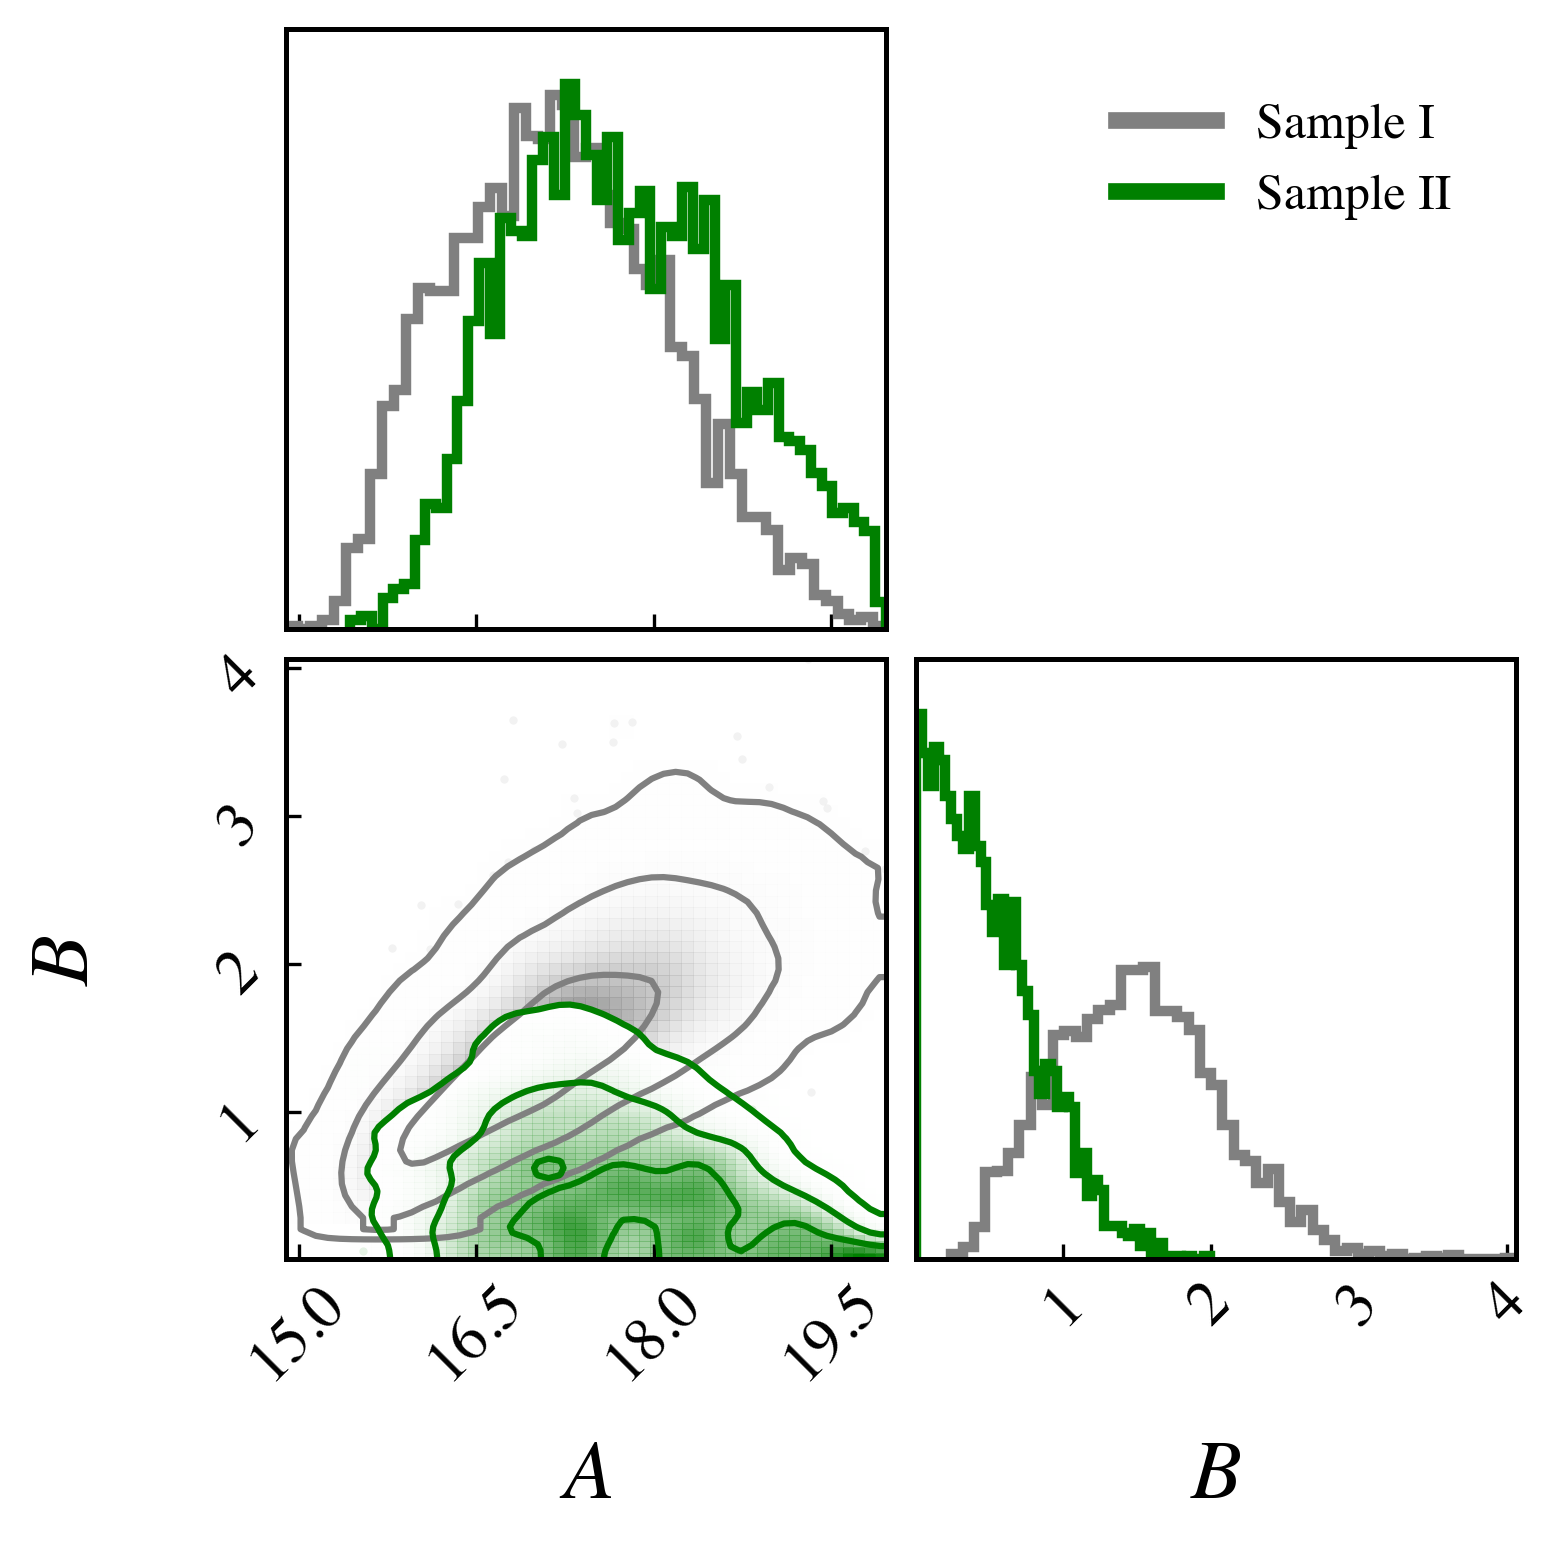

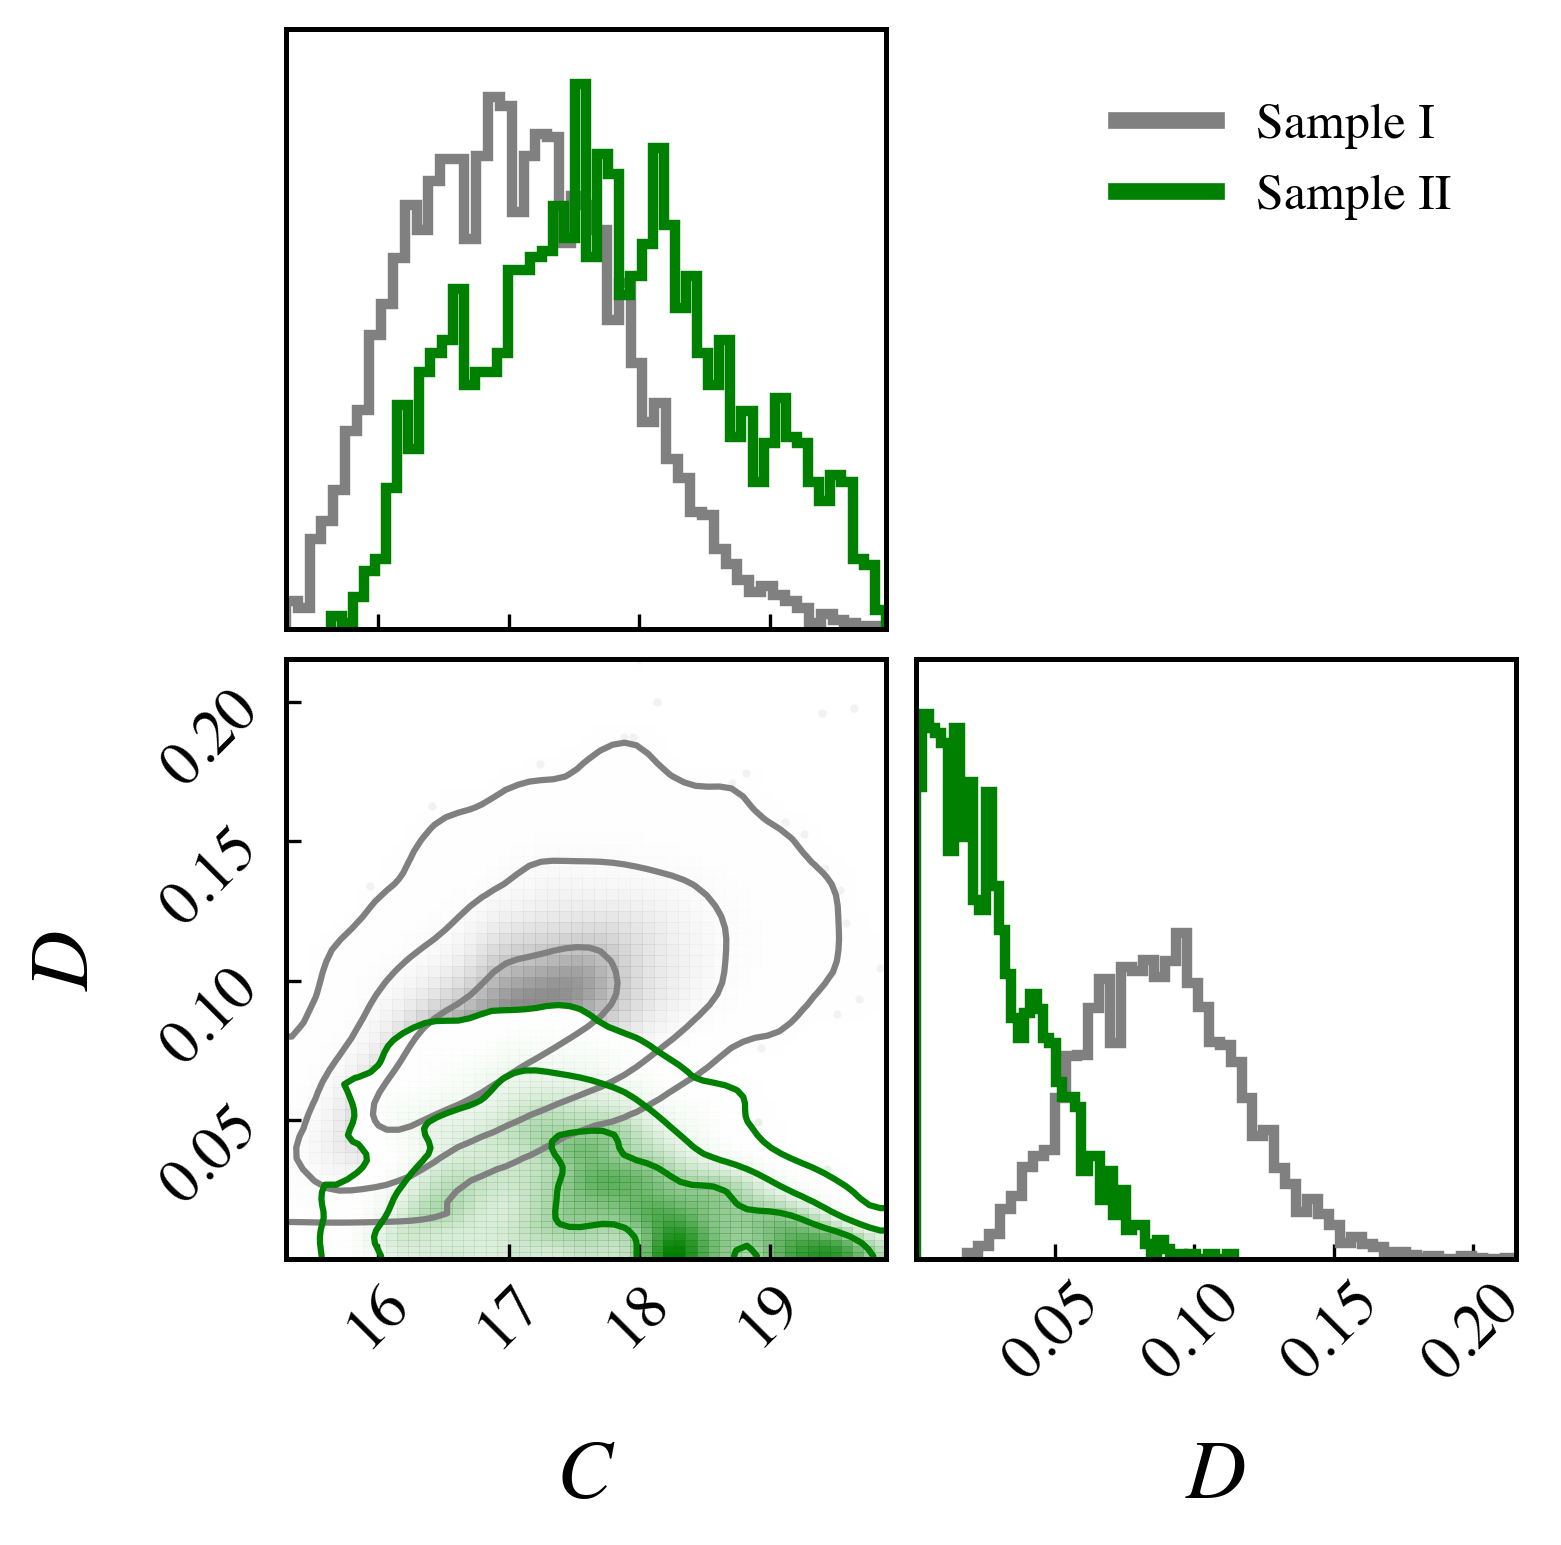

In [ ]:
filename = [gauss_dir_n1, log_dir_n1, gauss_dir_cubicspline_subLn1, log_dir_cubicspline_subLn1]

gauss_read = bilby.result.read_in_result(filename[0])
gauss_read_pos = gauss_read.posterior
gauss_postsamp = gauss_read_pos.iloc[:,0:2]

log_read = bilby.result.read_in_result(filename[1])
log_read_pos = log_read.posterior
log_postsamp = log_read_pos.iloc[:,0:2]

gauss_read_cubicspline_subLn1 = bilby.result.read_in_result(filename[2])
gauss_read_pos_cubicspline_subLn1 = gauss_read_cubicspline_subLn1.posterior
gauss_postsamp_cubicspline_subLn1 = gauss_read_pos_cubicspline_subLn1.iloc[:,0:2]

log_read_cubicspline_subLn1 = bilby.result.read_in_result(filename[3])
log_read_pos_cubicspline_subLn1 = log_read_cubicspline_subLn1.posterior
log_postsamp_cubicspline_subLn1 = log_read_pos_cubicspline_subLn1.iloc[:,0:2]

log_mu_samples = log_read_pos['mu'].values
log_sigma_samples = log_read_pos['sigma'].values

log_mu_samples_cubicspline_subLn1 = log_read_pos_cubicspline_subLn1['mu'].values
log_sigma_samples_cubicspline_subLn1 = log_read_pos_cubicspline_subLn1['sigma'].values

if plot_AB_EQG1: 
    labels= labels_AB
    fig = corner.corner(gauss_postsamp, 
                        bins=50, smooth=2, color='gray',
                        labels=labels,
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0,
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0)

    fig = corner.corner(gauss_postsamp_cubicspline_subLn1, 
                        bins=50, smooth=2, color='g',
                        labels=labels,
                        # range=[[14.2, 20.5],[-0.02,4]],
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0, 
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0, fig=fig)

    line1 = mlines.Line2D([], [], color='gray', lw=4, label='Sample I')
    line2 = mlines.Line2D([], [], color='g', lw=4, label='Sample II')

    plt.legend(handles=[line1, line2], loc=[0.3, 1.7], fontsize=12, frameon=False)
    plt.show()

    fig.savefig('./Figures/fig_corner_EQG1_AB.png')
    plt.close()

if plot_CD_EQG1: 
    labels= labels_CD
    fig = corner.corner(log_postsamp, 
                        bins=50, smooth=2, color='gray',
                        labels=labels,
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0,
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0)

    fig = corner.corner(log_postsamp_cubicspline_subLn1, 
                        bins=50, smooth=2, color='g',
                        labels=labels,
                        # range=[[13.8, 21],[0.0,0.8]],
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0, 
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0, fig=fig)

    line1 = mlines.Line2D([], [], color='gray', lw=4, label='Sample I')
    line2 = mlines.Line2D([], [], color='g', lw=4, label='Sample II')

    plt.legend(handles=[line1, line2], loc=[0.3, 1.7], fontsize=12, frameon=False)
    plt.show()

    fig.savefig('./Figures/fig_corner_EQG1_CD.png')
    plt.close()


Folder 'Figures' already exists


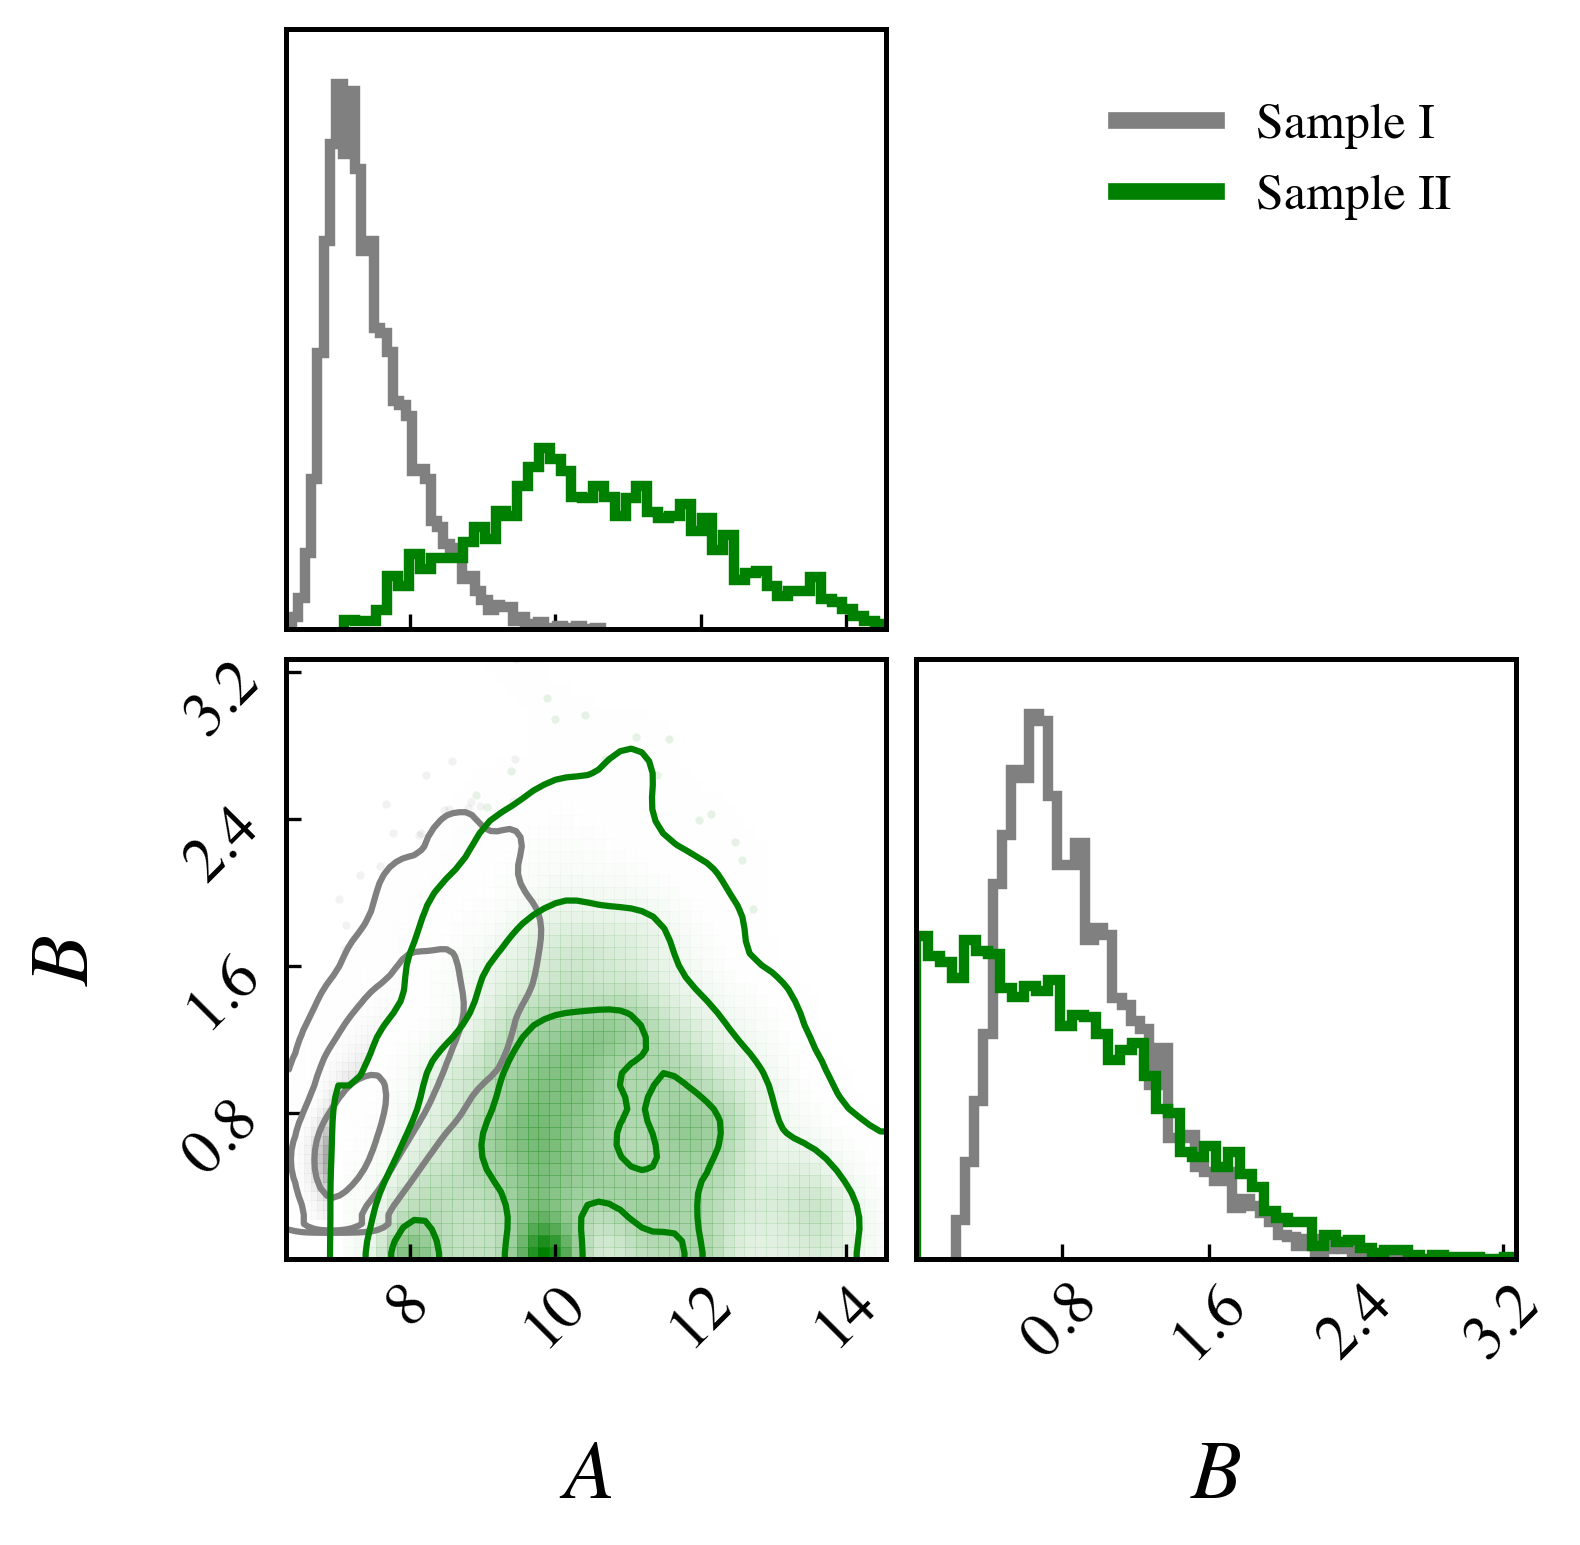

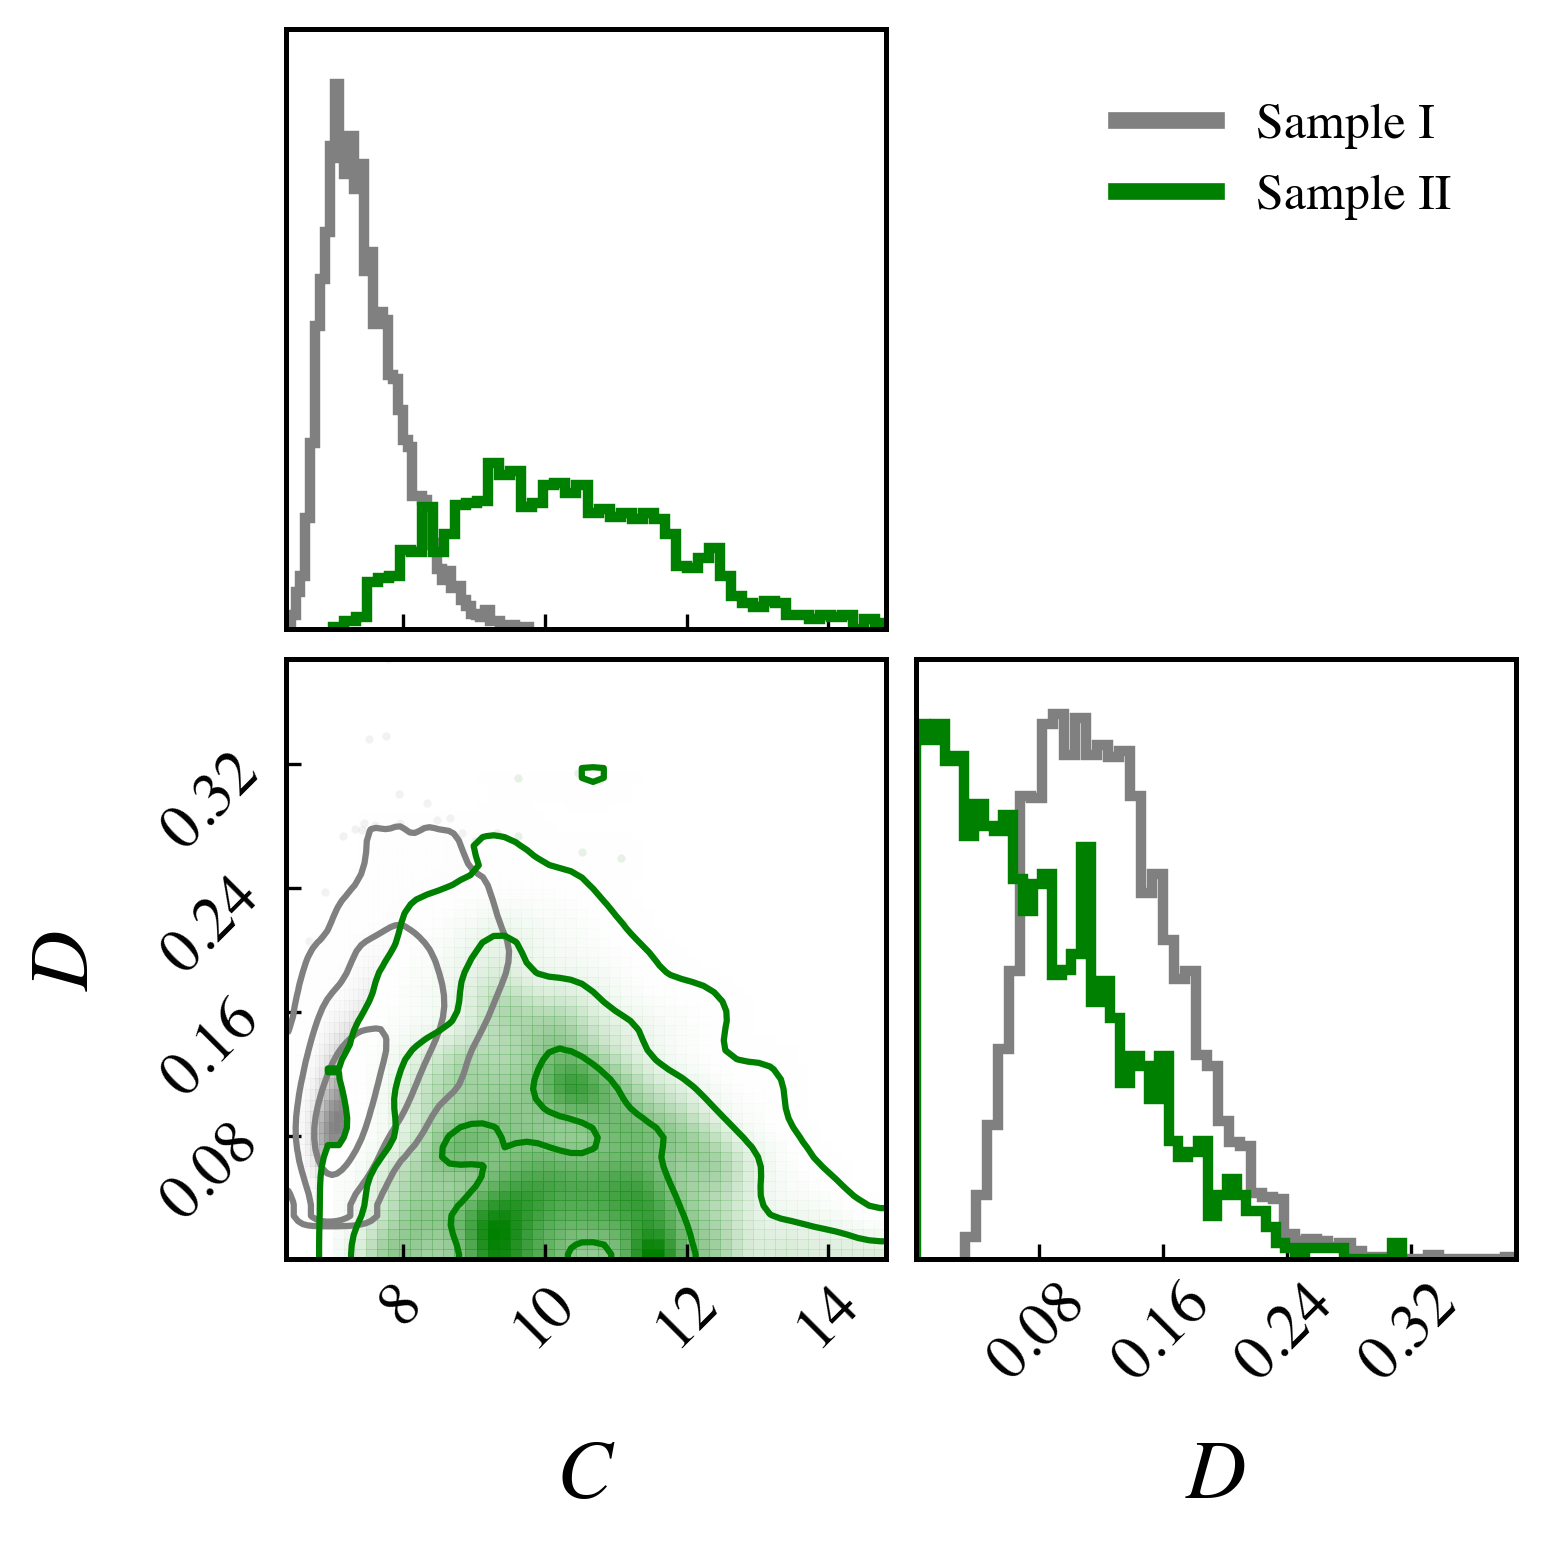

In [ ]:
filename = [gauss_dir_n2, log_dir_n2, gauss_dir_cubicspline_subLn2, log_dir_cubicspline_subLn2]

gauss_read = bilby.result.read_in_result(filename[0])
gauss_read_pos = gauss_read.posterior
gauss_postsamp = gauss_read_pos.iloc[:,0:2]

log_read = bilby.result.read_in_result(filename[1])
log_read_pos = log_read.posterior
log_postsamp = log_read_pos.iloc[:,0:2]

gauss_read_cubicspline_subLn2 = bilby.result.read_in_result(filename[2])
gauss_read_pos_cubicspline_subLn2 = gauss_read_cubicspline_subLn2.posterior
gauss_postsamp_cubicspline_subLn2 = gauss_read_pos_cubicspline_subLn2.iloc[:,0:2]

log_read_cubicspline_subLn2 = bilby.result.read_in_result(filename[3])
log_read_pos_cubicspline_subLn2 = log_read_cubicspline_subLn2.posterior
log_postsamp_cubicspline_subLn2 = log_read_pos_cubicspline_subLn2.iloc[:,0:2]

plot_AB_EQG1,plot_CD_EQG1,plot_AB_EQG2,plot_CD_EQG2 = True, True, True, True

log_mu_samples = log_read_pos['mu'].values
log_sigma_samples = log_read_pos['sigma'].values

log_mu_samples_cubicspline_subLn2 = log_read_pos_cubicspline_subLn2['mu'].values
log_sigma_samples_cubicspline_subLn2 = log_read_pos_cubicspline_subLn2['sigma'].values

labels_AB =[r'$A$',r'$B$']
labels_CD = [r'$C$',r'$D$']

if plot_AB_EQG2: 
    labels= labels_AB
    fig = corner.corner(gauss_postsamp, 
                        bins=50, smooth=2, color='gray',
                        labels=labels,
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0,
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0)

    fig = corner.corner(gauss_postsamp_cubicspline_subLn2, 
                        bins=50, smooth=2, color='g',
                        labels=labels,
                        # range=[[14.2, 20.5],[-0.02,4]],
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0, 
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0, fig=fig)

    line1 = mlines.Line2D([], [], color='gray', lw=4, label='Sample I')
    line2 = mlines.Line2D([], [], color='g', lw=4, label='Sample II')

    plt.legend(handles=[line1, line2], loc=[0.3, 1.7], fontsize=12, frameon=False)
    plt.show()

    fig.savefig('./Figures/fig_corner_EQG2_AB.png')
    plt.close()

if plot_CD_EQG2: 
    labels= labels_CD
    fig = corner.corner(log_postsamp, 
                        bins=50, smooth=2, color='gray',
                        labels=labels,
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0,
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0)

    fig = corner.corner(log_postsamp_cubicspline_subLn2, 
                        bins=50, smooth=2, color='g',
                        labels=labels,
                        # range=[[13.8, 21],[0.0,0.8]],
                        levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                        plot_density=1, plot_datapoints=1, fill_contours=0, 
                        hist_kwargs=dict(density=1, histtype='step', linewidth=2.5),
                        label_kwargs=dict(fontsize=20),
                        show_titles=0, fig=fig)

    line1 = mlines.Line2D([], [], color='gray', lw=4, label='Sample I')
    line2 = mlines.Line2D([], [], color='g', lw=4, label='Sample II')
    # line3 = mlines.Line2D([], [], color='r', lw=4, label='Gaussian')
    # line4 = mlines.Line2D([], [], color='b', lw=4, label='Log-normal')

    plt.legend(handles=[line1, line2], loc=[0.3, 1.7], fontsize=12, frameon=False)
    plt.show()

    fig.savefig('./Figures/fig_corner_EQG2_CD.png')
    plt.close()


# Comparing the posterior distributions of $\mu_{log_{10}E_{QG}}$ and $\sigma_{\log_{10}E_QG}$ derived from Gaussian and Log-normal distributions

* In the log-normal distribution, $\ln(\log_{10}E_{QG})$ follows a Gaussian distribution with mean $\ln C$ and standard deviation $D$; $\bm C$ provides mean value (standard deviation) of $\bm{\log_{10} E_{\rm QG}}$ as $\bm{C\cdot \exp(D^2/2)}$ ($\bm{C\cdot \exp(D^2/2)\cdot \sqrt{\exp(D^2)-1}}$)}. 

* So, we make above transformations to obtain 

In [4]:
def transform_lognormal_params(mu_samples, sigma_samples):
    """
    Convert parameters mu and sigma of log-normal distribution to E[X] and Std[X]
    
    Parameters:
    mu_samples: Posterior samples of mu
    sigma_samples: Posterior samples of sigma
    
    Returns:
    E_X: Posterior samples of expected value of X
    Std_X: Posterior samples of standard deviation of X
    """
    # According to derived formulas:
    # E[X] = mu · exp(sigma²/2)
    # Std[X] = mu · exp(sigma²/2) · √[exp(sigma²) - 1]
    
    E_X = mu_samples * np.exp(sigma_samples**2 / 2)
    Std_X = mu_samples * np.exp(sigma_samples**2 / 2) * np.sqrt(np.exp(sigma_samples**2) - 1)
    
    return E_X, Std_X

In [5]:
folder_name = "Figures"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder created successfully: '{folder_name}'")
else:
    print(f"Folder '{folder_name}' already exists")

Folder '../Figures' already exists


Folder 'Figures' already exists


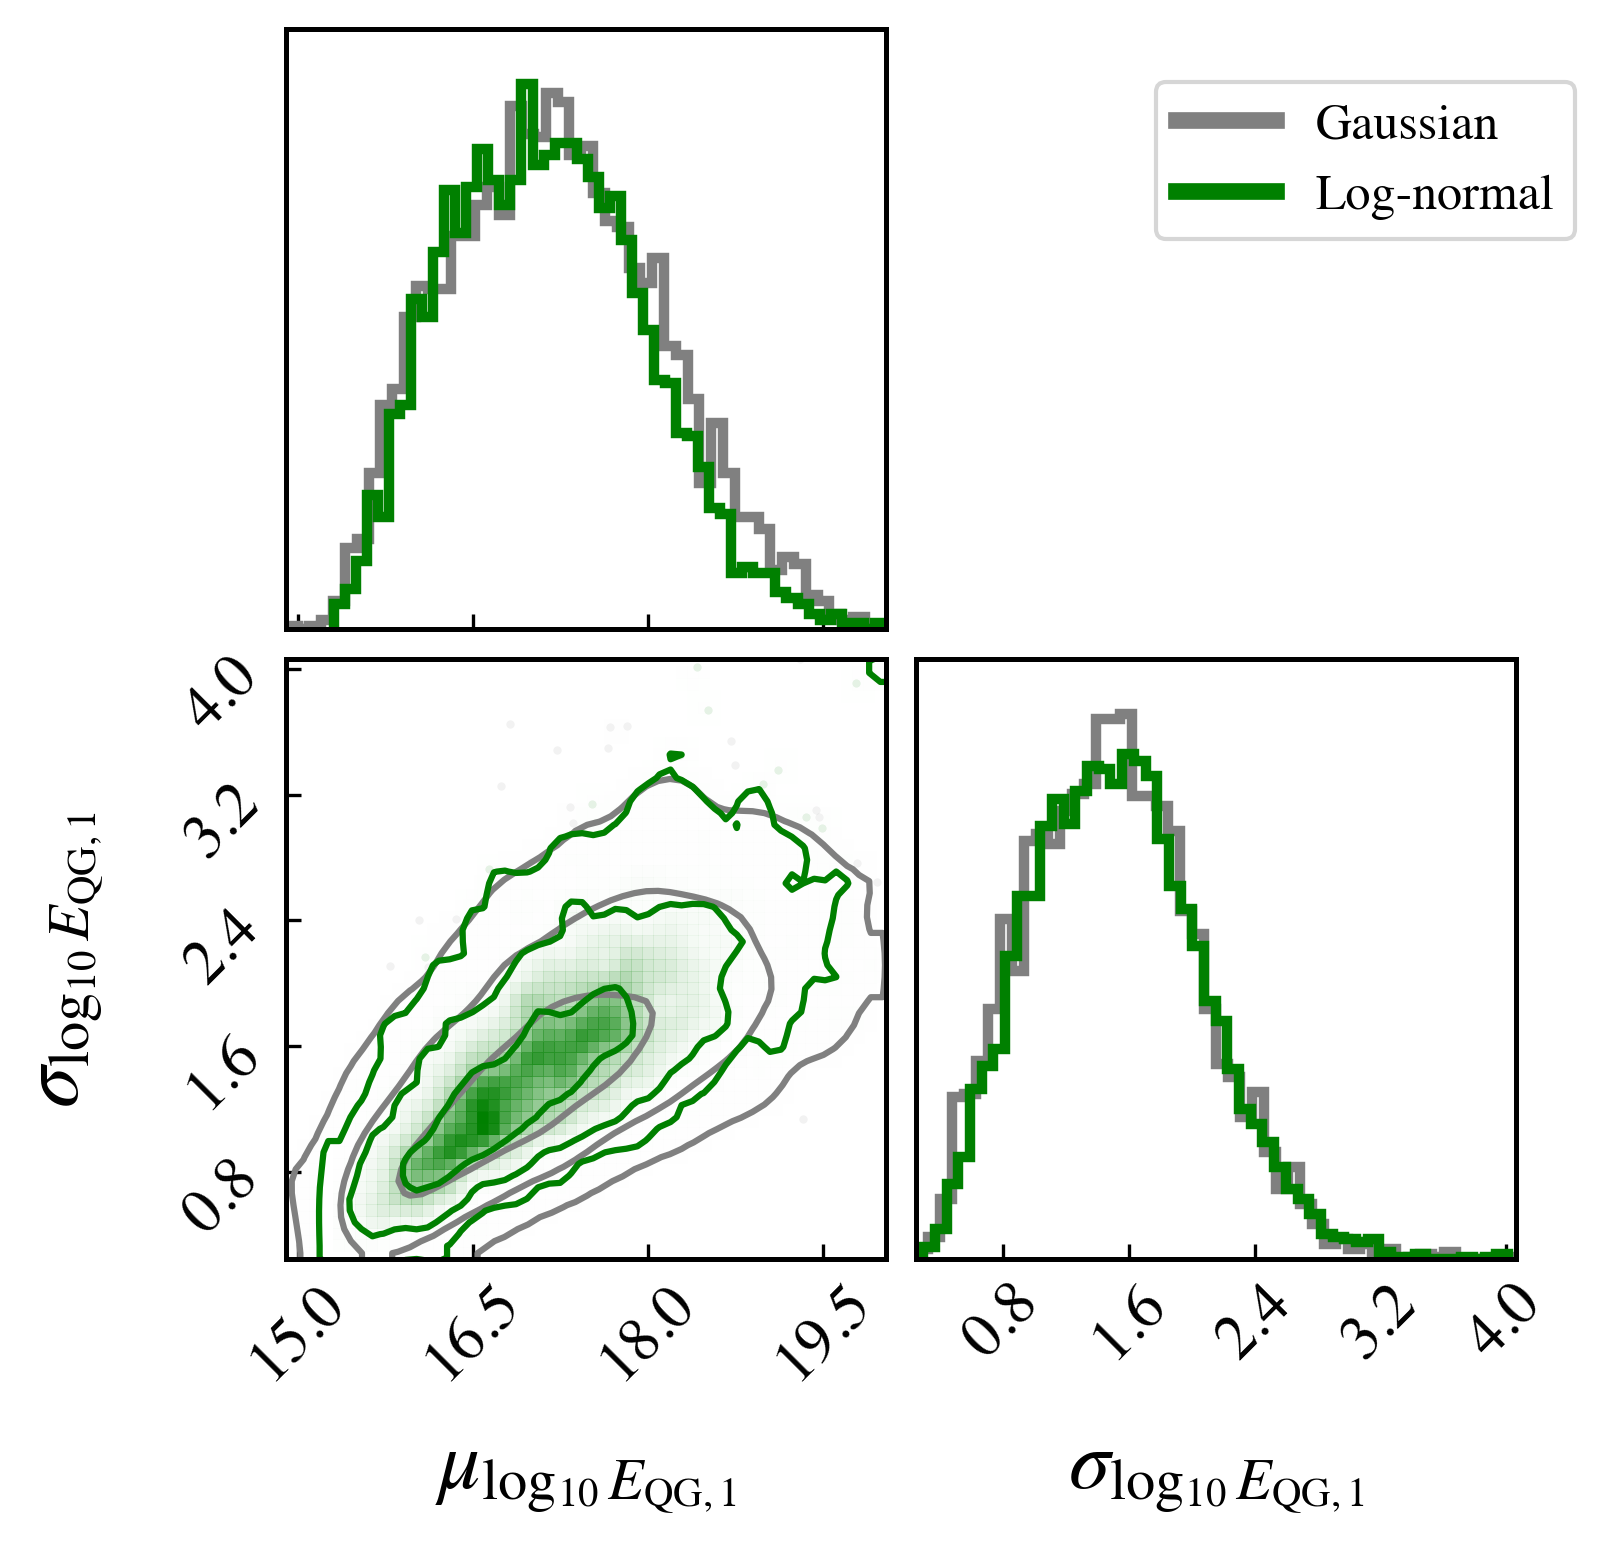

In [ ]:
gauss_dir = './results_main/outdir_{}_EQG1_Liu/hyperLIV_{}_result.json'.format(fn[0], fn[0])
log_dir = './results_main/outdir_{}_EQG1_Liu/hyperLIV_{}_result.json'.format(fn[1], fn[1])

filename = [gauss_dir, log_dir]

gauss_read = bilby.result.read_in_result(filename[0])
gauss_read_pos = gauss_read.posterior
gauss_postsamp = gauss_read_pos.iloc[:,0:2]

log_read = bilby.result.read_in_result(filename[1])
log_read_pos = log_read.posterior
log_postsamp = log_read_pos.iloc[:,0:2]

log_mu_samples = log_read_pos['mu'].values
log_sigma_samples = log_read_pos['sigma'].values

log_E_X, log_Std_X = transform_lognormal_params(log_mu_samples, log_sigma_samples)

log_postsamp_transformed = pd.DataFrame({
    'E_X': log_E_X,
    'Std_X': log_Std_X
})

gauss_postsamp_transformed = pd.DataFrame({
    'E_X': gauss_read_pos['mu'].values,
    'Std_X': gauss_read_pos['sigma'].values
})

labels_transformed =[r'$\mu_{\log_{10} E_{\rm QG,1}}$',r'$\sigma_{\log_{10} E_{\rm QG,1}}$']

fig_transformed = corner.corner(gauss_postsamp_transformed, 
                       bins=50, smooth=2, color='gray',
                       labels=labels_transformed,
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=True, fill_contours=0,
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0)

fig_transformed = corner.corner(log_postsamp_transformed, 
                       bins=50, smooth=1, color='g',
                       labels=labels_transformed,
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=True, fill_contours=0, 
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0, fig=fig_transformed)

blue_line = mlines.Line2D([], [], color='gray', lw=4, label='Gaussian')
orange_line = mlines.Line2D([], [], color='g', lw=4, label='Log-normal')

plt.legend(handles=[blue_line, orange_line], loc=[0.4, 1.7], fontsize=12)
plt.show()

fig_transformed.savefig('./Figures/fig_corner_EQG1_Liu_transform_and_compare.png')


Folder 'Figures' already exists


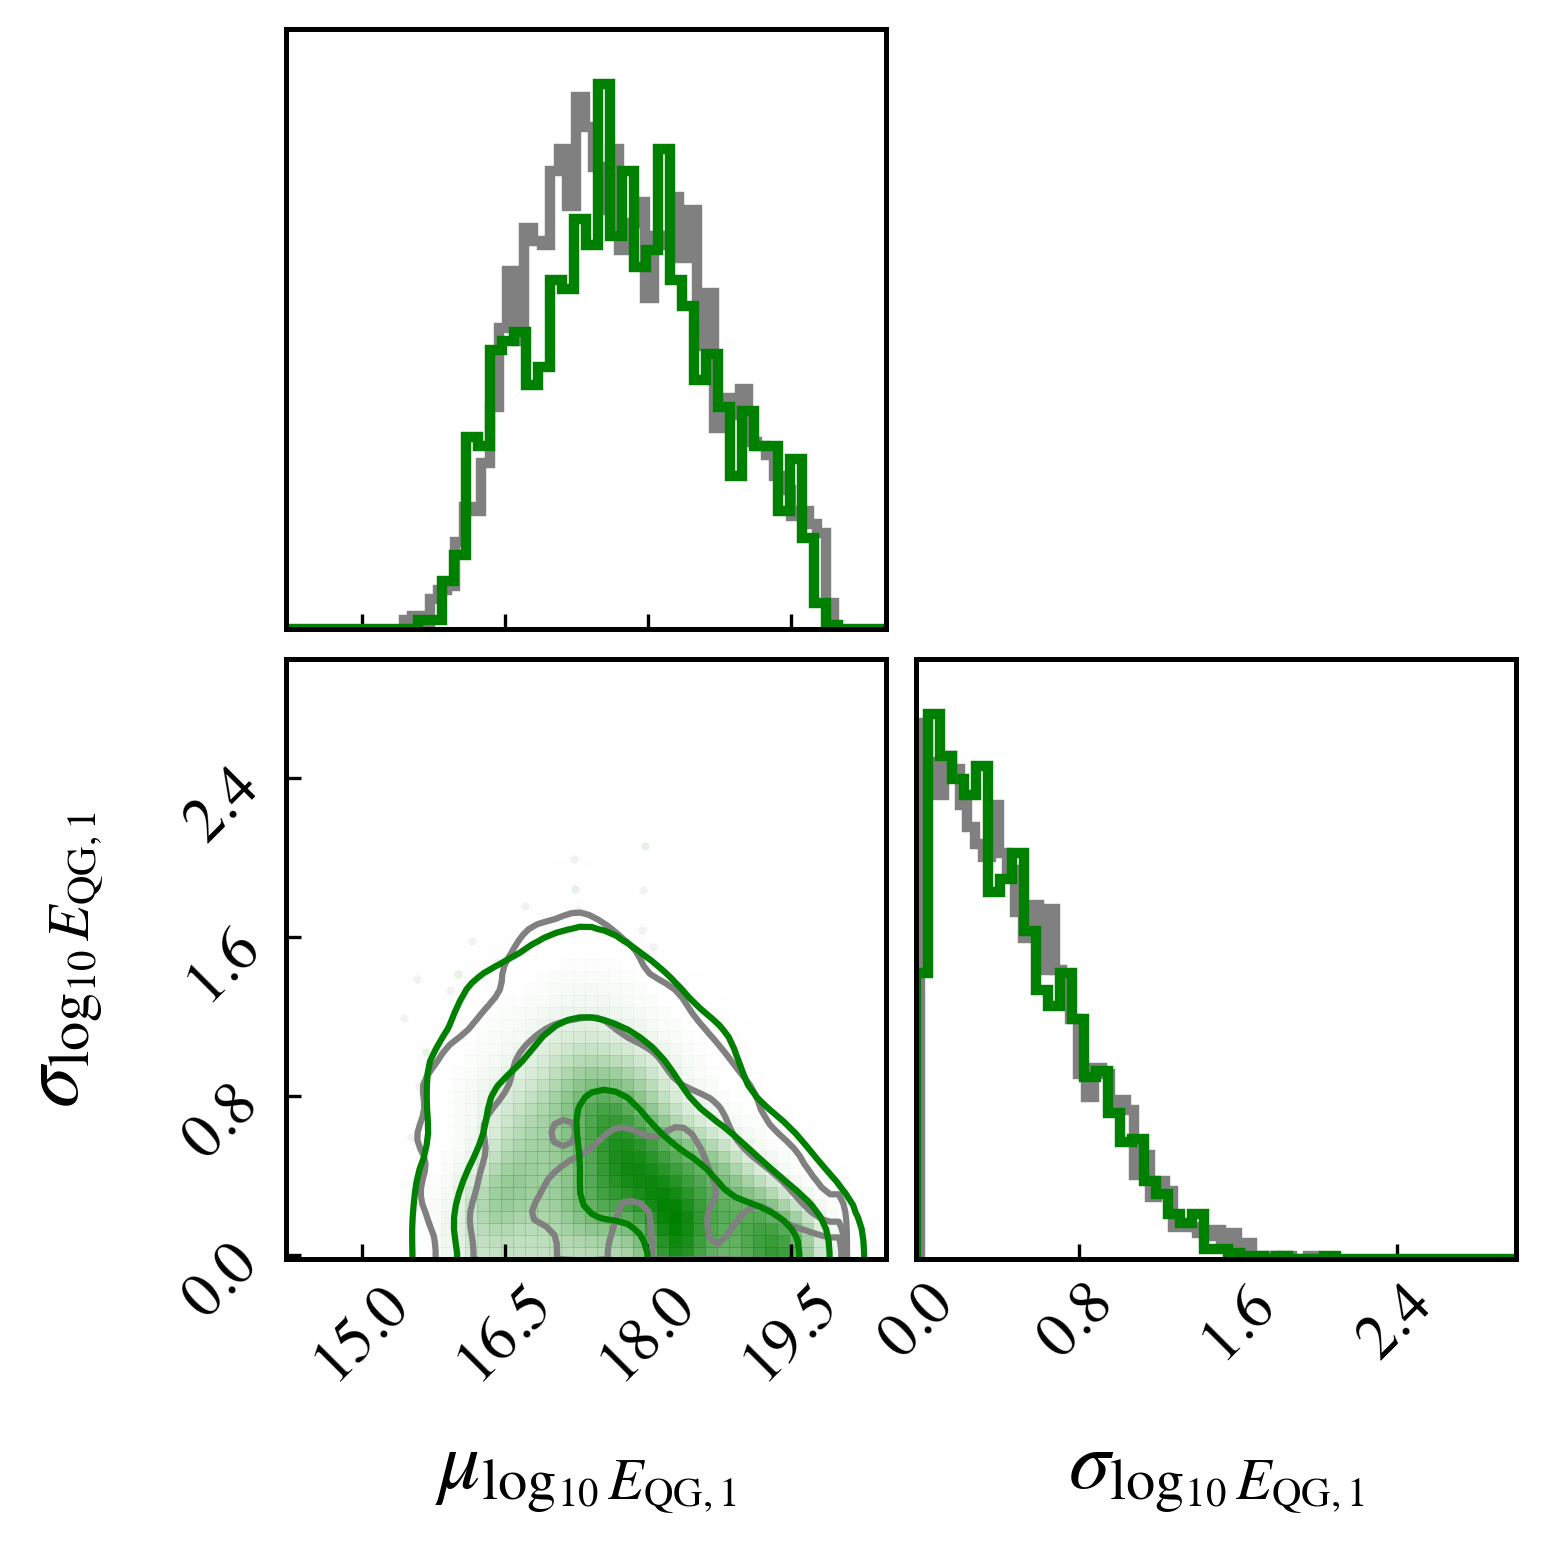

In [ ]:
gauss_dir = './results_main/outdir_{}_EQG1_Liu/hyperLIV_{}_result.json'.format(fn[0], fn[0])
log_dir = './results_main/outdir_{}_EQG1_Liu/hyperLIV_{}_result.json'.format(fn[1], fn[1])
gauss_dir_cubicspline_subLn1 = './results_main/outdir_{}_cubicspline_subLn1/{}_cubicspline_result.json'.format(fn[0], fn[0])
log_dir_cubicspline_subLn1 = './results_main/outdir_{}_cubicspline_subLn1/{}_cubicspline_result.json'.format(fn[1], fn[1])

filename = [gauss_dir, log_dir, gauss_dir_cubicspline_subLn1, log_dir_cubicspline_subLn1]

gauss_read = bilby.result.read_in_result(filename[0])
gauss_read_pos = gauss_read.posterior
gauss_postsamp = gauss_read_pos.iloc[:,0:2]

log_read = bilby.result.read_in_result(filename[1])
log_read_pos = log_read.posterior
log_postsamp = log_read_pos.iloc[:,0:2]

gauss_read_cubicspline_subLn1 = bilby.result.read_in_result(filename[2])
gauss_read_pos_cubicspline_subLn1 = gauss_read_cubicspline_subLn1.posterior
gauss_postsamp_cubicspline_subLn1 = gauss_read_pos_cubicspline_subLn1.iloc[:,0:2]

log_read_cubicspline_subLn1 = bilby.result.read_in_result(filename[3])
log_read_pos_cubicspline_subLn1 = log_read_cubicspline_subLn1.posterior
log_postsamp_cubicspline_subLn1 = log_read_pos_cubicspline_subLn1.iloc[:,0:2]

log_mu_samples = log_read_pos['mu'].values
log_sigma_samples = log_read_pos['sigma'].values

log_mu_samples_cubicspline_subLn1 = log_read_pos_cubicspline_subLn1['mu'].values
log_sigma_samples_cubicspline_subLn1 = log_read_pos_cubicspline_subLn1['sigma'].values

log_E_X, log_Std_X = transform_lognormal_params(log_mu_samples, log_sigma_samples)

log_E_X_cubicspline_subLn1, log_Std_X_cubicspline_subLn1 = transform_lognormal_params(log_mu_samples_cubicspline_subLn1, log_sigma_samples_cubicspline_subLn1)

# Create transformed DataFrame
log_postsamp_transformed = pd.DataFrame({
    'E_X': log_E_X,
    'Std_X': log_Std_X
})

log_postsamp_transformed_cubicspline_subLn1 = pd.DataFrame({
    'E_X': log_E_X_cubicspline_subLn1,
    'Std_X': log_Std_X_cubicspline_subLn1
})

labels =[r'$\mu_{\log_{10} E_{\rm QG,1}}$',r'$\sigma_{\log_{10} E_{\rm QG,1}}$']

fig_transformed = corner.corner(gauss_postsamp_cubicspline_subLn1, 
                       bins=50, smooth=2, color='gray',
                       labels=labels,
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=1, fill_contours=0,
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0)

fig_transformed = corner.corner(log_postsamp_transformed_cubicspline_subLn1, 
                       bins=50, smooth=2, color='g',
                       labels=labels,
                       range=[[14.2, 20.5],[-0.02,3]],
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=1, fill_contours=0, 
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0, fig=fig_transformed)

line1 = mlines.Line2D([], [], color='gray', lw=4, label='Gaussian')
line2 = mlines.Line2D([], [], color='g', lw=4, label='Log-normal')
# plt.legend(handles=[line1, line2], loc=[0.4, 1.7], fontsize=12, frameon=True)
plt.show()

fig_transformed.savefig('./Figures/fig_corner_EQG1_cubicspline_transform_and_compare.png')


Folder 'Figures' already exists


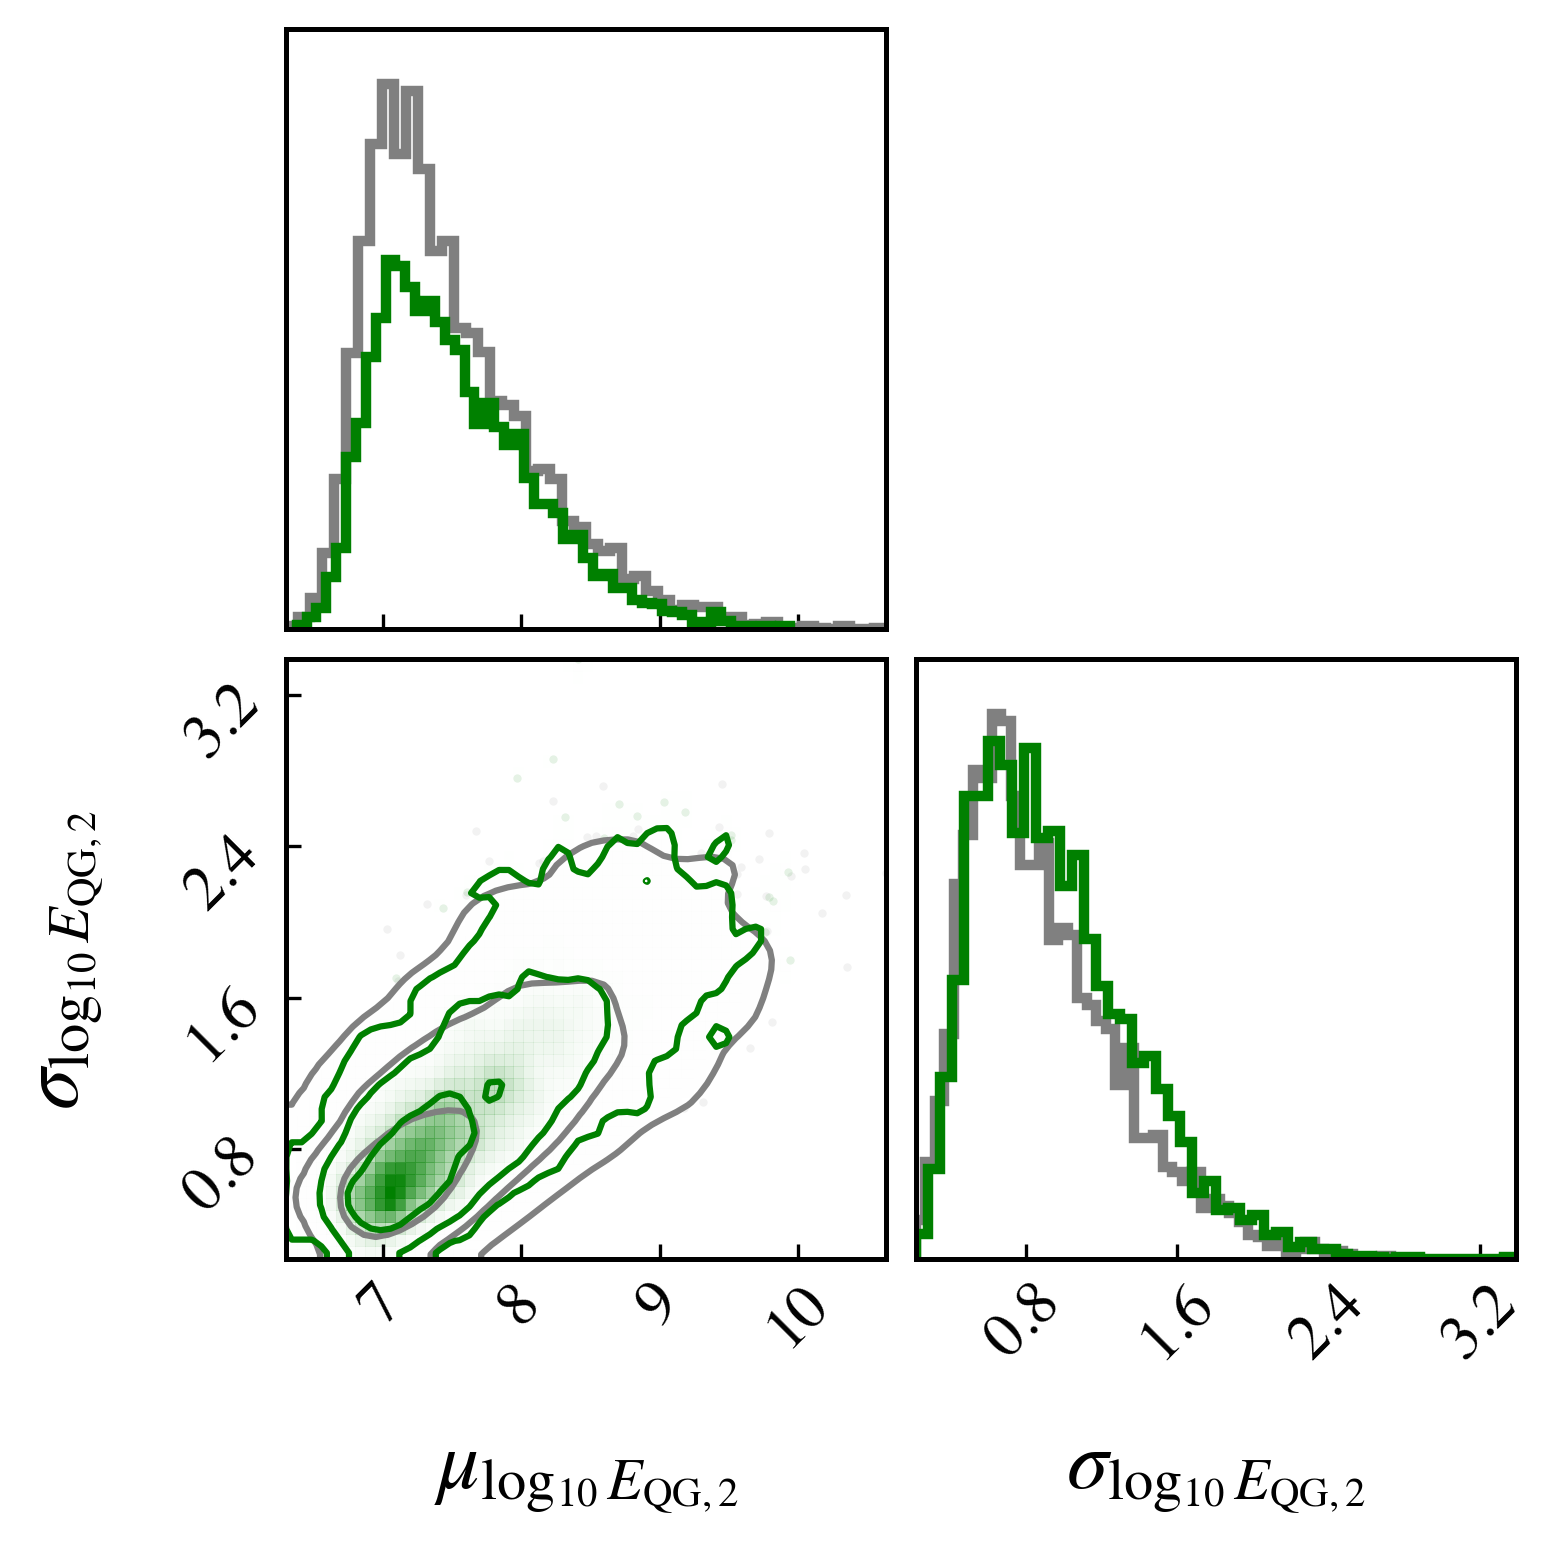

In [ ]:

gauss_dir = './results_main/outdir_{}_EQG2_Liu/hyperLIV_{}_result.json'.format(fn[0], fn[0])
log_dir = './results_main/outdir_{}_EQG2_Liu/hyperLIV_{}_result.json'.format(fn[1], fn[1])

filename = [gauss_dir, log_dir]

gauss_read = bilby.result.read_in_result(filename[0])
gauss_read_pos = gauss_read.posterior
gauss_postsamp = gauss_read_pos.iloc[:,0:2]

log_read = bilby.result.read_in_result(filename[1])
log_read_pos = log_read.posterior
log_postsamp = log_read_pos.iloc[:,0:2]

log_mu_samples = log_read_pos['mu'].values
log_sigma_samples = log_read_pos['sigma'].values

log_E_X, log_Std_X = transform_lognormal_params(log_mu_samples, log_sigma_samples)

log_postsamp_transformed = pd.DataFrame({
    'E_X': log_E_X,
    'Std_X': log_Std_X
})

gauss_postsamp_transformed = pd.DataFrame({
    'E_X': gauss_read_pos['mu'].values,
    'Std_X': gauss_read_pos['sigma'].values
})


labels_transformed =[r'$\mu_{\log_{10} E_{\rm QG,2}}$',r'$\sigma_{\log_{10} E_{\rm QG,2}}$']

fig_transformed = corner.corner(gauss_postsamp_transformed, 
                       bins=50, smooth=2, color='gray',
                       labels=labels_transformed,
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=True, fill_contours=0,
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0)

fig_transformed = corner.corner(log_postsamp_transformed, 
                       bins=50, smooth=1, color='g',
                       labels=labels_transformed,
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=True, fill_contours=0, 
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0, fig=fig_transformed)

blue_line = mlines.Line2D([], [], color='gray', lw=4, label='Gaussian')
orange_line = mlines.Line2D([], [], color='g', lw=4, label='Log-normal')

plt.show()
fig_transformed.savefig('./Figures/fig_corner_EQG2_Liu_transform_and_compare.png')


Folder 'Figures' already exists


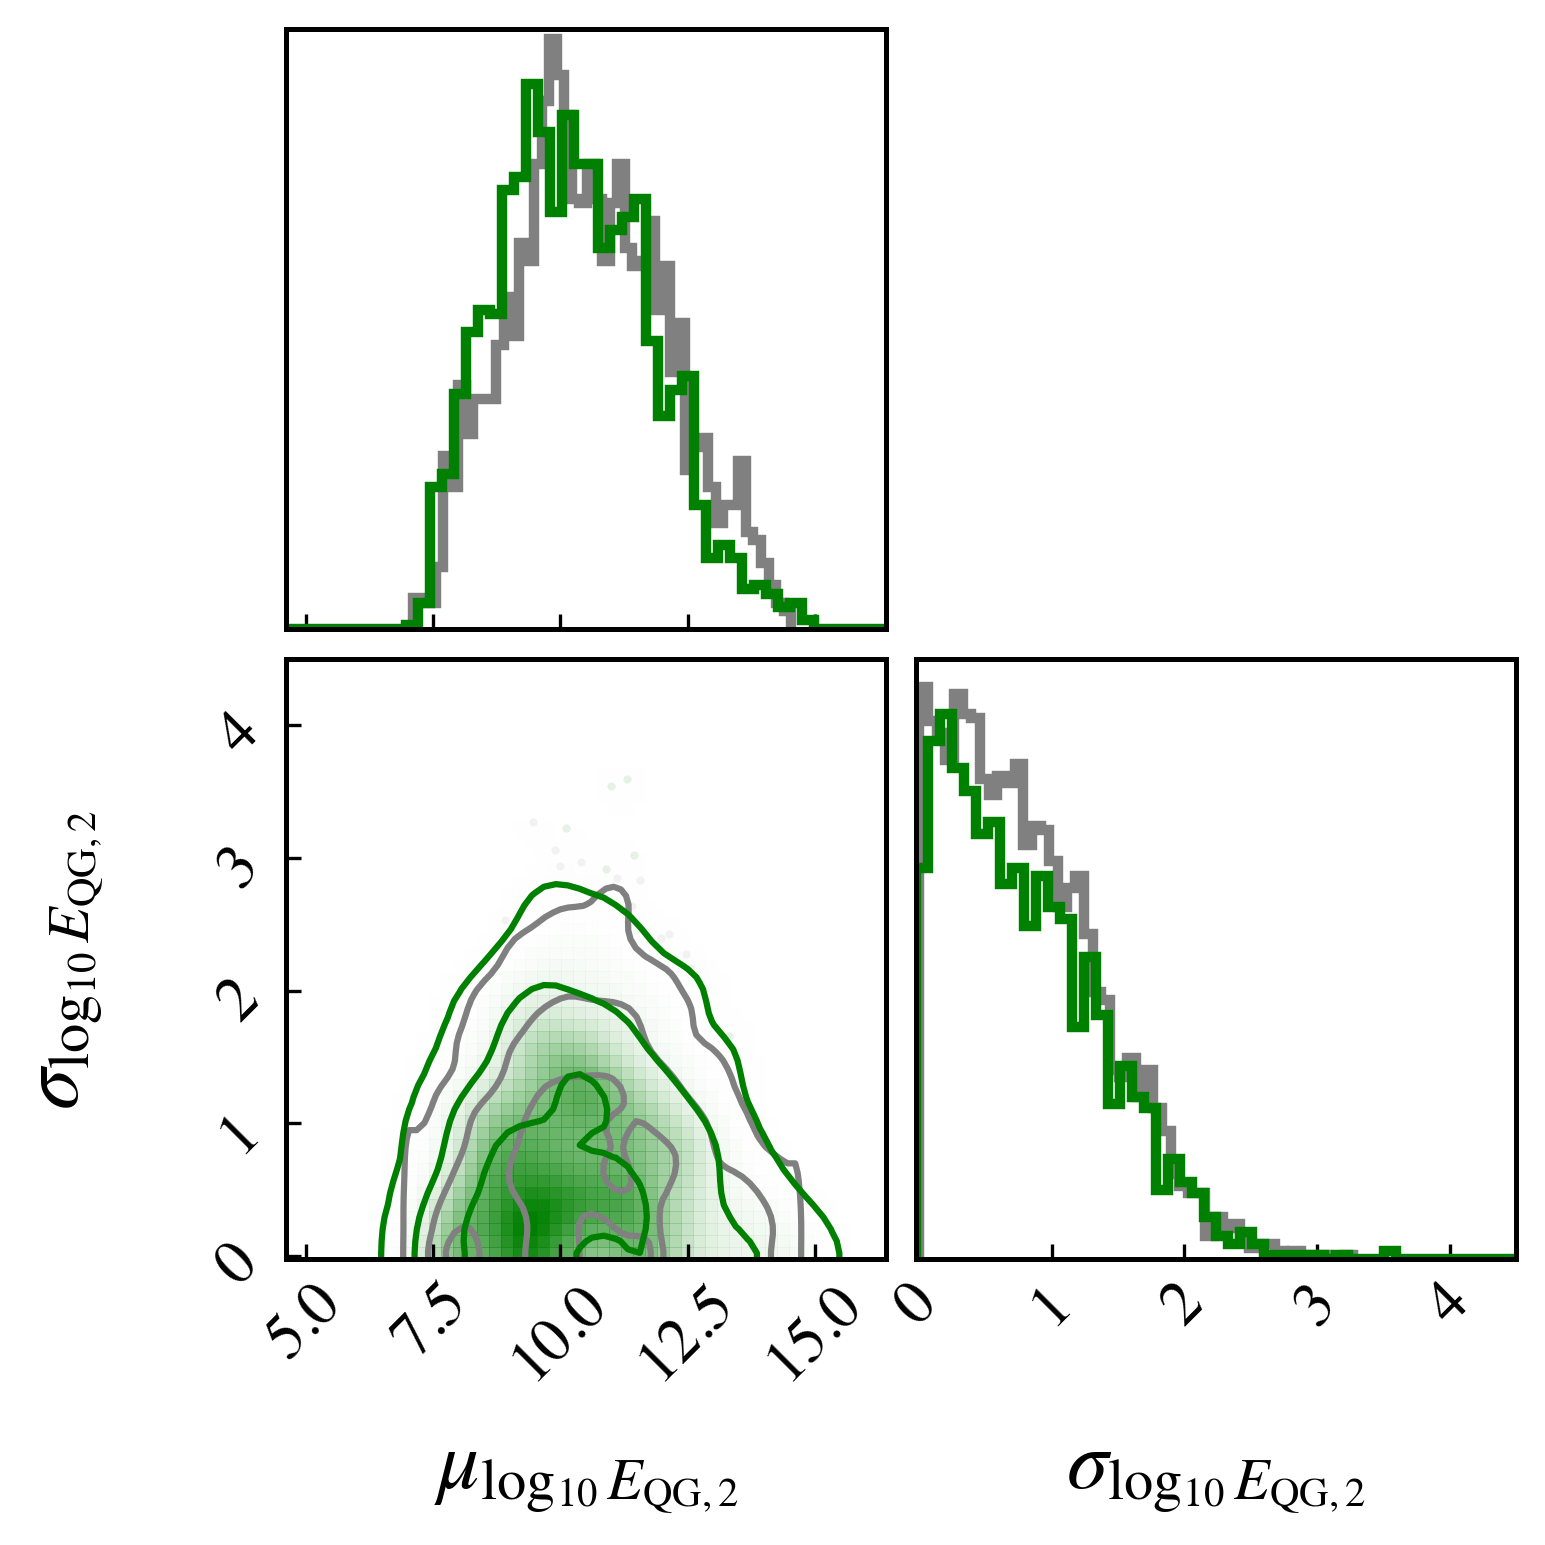

In [ ]:
gauss_dir = './results_main/outdir_{}_EQG2_Liu/hyperLIV_{}_result.json'.format(fn[0], fn[0])
log_dir = './results_main/outdir_{}_EQG2_Liu/hyperLIV_{}_result.json'.format(fn[1], fn[1])
gauss_dir_cubicspline_subLn2 = './results_main/outdir_{}_cubicspline_subLn2/{}_cubicspline_result.json'.format(fn[0], fn[0])
log_dir_cubicspline_subLn2 = './results_main/outdir_{}_cubicspline_subLn2/{}_cubicspline_result.json'.format(fn[1], fn[1])

filename = [gauss_dir, log_dir, gauss_dir_cubicspline_subLn2, log_dir_cubicspline_subLn2]

gauss_read = bilby.result.read_in_result(filename[0])
gauss_read_pos = gauss_read.posterior
gauss_postsamp = gauss_read_pos.iloc[:,0:2]

log_read = bilby.result.read_in_result(filename[1])
log_read_pos = log_read.posterior
log_postsamp = log_read_pos.iloc[:,0:2]

gauss_read_cubicspline_subLn2 = bilby.result.read_in_result(filename[2])
gauss_read_pos_cubicspline_subLn2 = gauss_read_cubicspline_subLn2.posterior
gauss_postsamp_cubicspline_subLn2 = gauss_read_pos_cubicspline_subLn2.iloc[:,0:2]

log_read_cubicspline_subLn2 = bilby.result.read_in_result(filename[3])
log_read_pos_cubicspline_subLn2 = log_read_cubicspline_subLn2.posterior
log_postsamp_cubicspline_subLn2 = log_read_pos_cubicspline_subLn2.iloc[:,0:2]

log_mu_samples = log_read_pos['mu'].values
log_sigma_samples = log_read_pos['sigma'].values

log_mu_samples_cubicspline_subLn2 = log_read_pos_cubicspline_subLn2['mu'].values
log_sigma_samples_cubicspline_subLn2 = log_read_pos_cubicspline_subLn2['sigma'].values

log_E_X, log_Std_X = transform_lognormal_params(log_mu_samples, log_sigma_samples)

log_E_X_cubicspline_subLn2, log_Std_X_cubicspline_subLn2 = transform_lognormal_params(log_mu_samples_cubicspline_subLn2, log_sigma_samples_cubicspline_subLn2)

log_postsamp_transformed = pd.DataFrame({
    'E_X': log_E_X,
    'Std_X': log_Std_X
})

log_postsamp_transformed_cubicspline_subLn2 = pd.DataFrame({
    'E_X': log_E_X_cubicspline_subLn2,
    'Std_X': log_Std_X_cubicspline_subLn2
})


labels =[r'$\mu_{\log_{10} E_{\rm QG,2}}$',r'$\sigma_{\log_{10} E_{\rm QG,2}}$']

fig_transformed = corner.corner(gauss_postsamp_cubicspline_subLn2, 
                       bins=50, smooth=2, color='gray',
                       labels=labels,
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=1, fill_contours=0,
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0)

fig_transformed = corner.corner(log_postsamp_transformed_cubicspline_subLn2, 
                       bins=50, smooth=2, color='g',
                       labels=labels,
                       range=[[4.6, 16.4],[-0.025,4.5]],
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=1, plot_datapoints=1, fill_contours=0, 
                       hist_kwargs=dict(density=0, histtype='step', linewidth=2.5),
                       label_kwargs=dict(fontsize=20),
                       show_titles=0, fig=fig_transformed)

line1 = mlines.Line2D([], [], color='gray', lw=4, label='Gaussian')
line2 = mlines.Line2D([], [], color='g', lw=4, label='Log-normal')
plt.show()

fig_transformed.savefig('./Figures/fig_corner_EQG2_cubicspline_transform_and_compare.png')


# Plot the posterior population distributions, and perform statistical analyses

In [12]:
# plot configuration
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.2,
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'axes.titlesize': 19,
    'axes.labelsize': 19,
    'xtick.labelsize': 19,
    'ytick.labelsize': 19,
    'legend.fontsize': 19,
    'figure.dpi': 300,
    'figure.figsize': (8, 5),
    'savefig.dpi': 300,
    'savefig.format': 'tiff',
    'savefig.bbox': 'tight'
})

rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

In [ ]:
hbar = const.hbar
c = const.c
G = const.G
E_PLANCK = ((hbar * c**5 / G)**0.5).to(u.joule)
E_PLANCK_GEV = E_PLANCK.to(u.gigaelectronvolt)

QUANTILE_1SIGMA = np.array([0.16, 0.84])
QUANTILE_2SIGMA = np.array([0.05, 0.95])

def gaussian_pdf(dataset, mu, sigma):
    """Gaussian probability density function"""
    return (np.exp(-((dataset - mu) ** 2) / (2 * sigma**2))
        / np.sqrt(2 * np.pi * sigma**2))

def lognormal_pdf(dataset, mu, sigma):
    """Log-normal probability density function"""
    return (np.exp(-(np.log(dataset/mu))**2 / (2 * sigma**2))
        / np.sqrt(2 * np.pi * sigma**2)
        / dataset)

def posterior_predictive_gaussian(x, posterior_samples):
    """Posterior predictive distribution for Gaussian model"""
    predictive_samples = []
    n_samples = posterior_samples.shape[0]
    
    for i in range(n_samples):
        sample_pdf = gaussian_pdf(np.array(x), 
                                posterior_samples[i, 0], 
                                posterior_samples[i, 1])
        predictive_samples.append(sample_pdf)
    
    return np.sum(np.array(predictive_samples), axis=0) / n_samples

def posterior_predictive_lognormal(x, posterior_samples):
    """Posterior predictive distribution for log-normal model"""
    predictive_samples = []
    n_samples = posterior_samples.shape[0]
    
    for i in range(n_samples):
        sample_pdf = lognormal_pdf(np.array(x), 
                                 posterior_samples[i, 0], 
                                 posterior_samples[i, 1])
        predictive_samples.append(sample_pdf)
    
    return np.sum(np.array(predictive_samples), axis=0) / n_samples

def predictive_uncertainty(x, posterior_samples, quantile, model_type='gaussian'):
    """Calculate predictive uncertainty bands"""
    predictive_samples = []
    n_samples = posterior_samples.shape[0]
    
    for i in range(n_samples):
        if model_type == 'gaussian':
            sample_pdf = gaussian_pdf(np.array(x), 
                                    posterior_samples[i, 0], 
                                    posterior_samples[i, 1])
        else:  
            sample_pdf = lognormal_pdf(np.array(x), 
                                     posterior_samples[i, 0], 
                                     posterior_samples[i, 1])
        predictive_samples.append(sample_pdf)
    return np.quantile(np.array(predictive_samples), quantile, axis=0)

def find_Probabilitys(x, y, lower_Probability=0.1685, upper_Probability=0.8515):
    """
    Calculate x values corresponding to specified quantiles 
    
    Parameters:
    x (np.array): x values array
    y (np.array): y values array
    lower_Probability (float): Lower quantile (default 16.85%)
    upper_Probability (float): Upper quantile (default 85.15%)
    
    Returns:
    tuple: (x_lower, x_upper, peak_value_x) x values corresponding to quantiles and peak x value
    """
    if len(x) != len(y):
        raise ValueError("x and y must have the same length")
    total_area = np.trapz(y, x)
    cum_integral = cumulative_trapezoid(y, x, initial=0)
    cdf = cum_integral / total_area
    cdf_interp = interp1d(cdf, x, bounds_error=False, fill_value=(x[0], x[-1]))
    peak_index = np.argmax(y)
    peak_value_x = x[peak_index]
    x_lower = cdf_interp(lower_Probability)
    x_upper = cdf_interp(upper_Probability)
    
    return (x_lower, x_upper, peak_value_x, cdf, total_area)

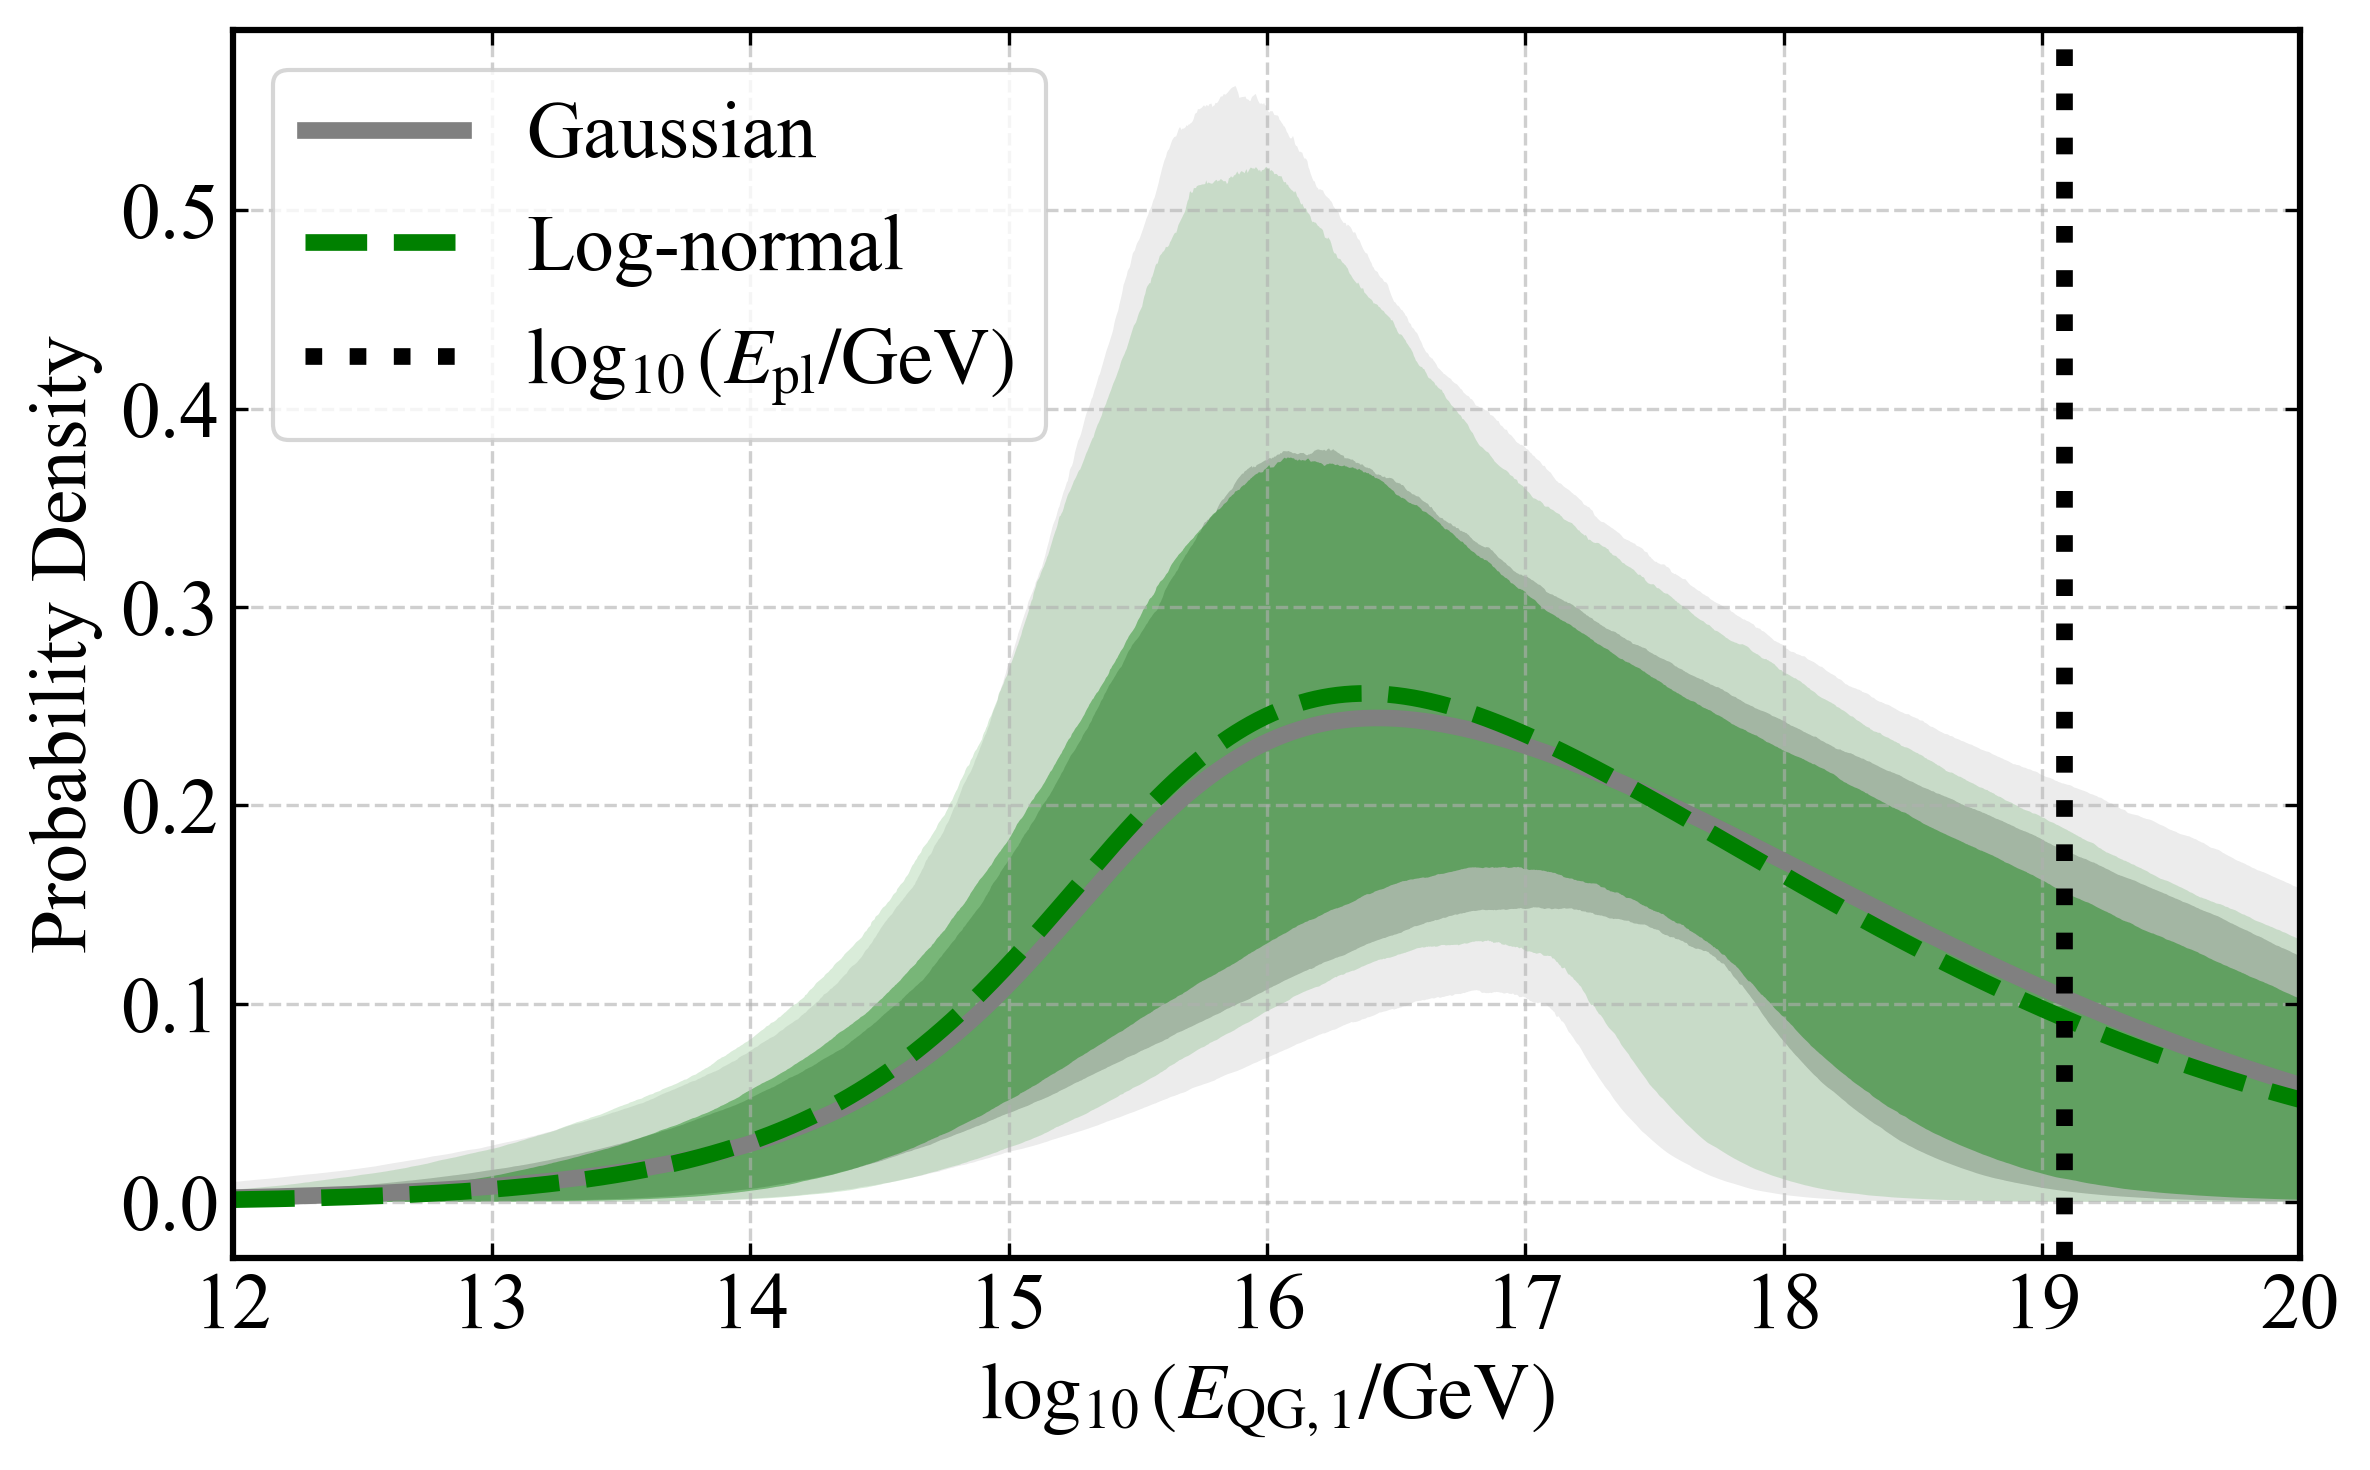

In [ ]:
model_types = ['gauss', 'log']
gauss_dir = f'./results_main/outdir_{model_types[0]}_EQG1_Liu/hyperLIV_{model_types[0]}_result.json'
log_dir = f'./results_main/outdir_{model_types[1]}_EQG1_Liu/hyperLIV_{model_types[1]}_result.json'
filenames = [gauss_dir, log_dir]

x = np.linspace(0.01, 20.0, 5000)
result_gauss = bilby.result.read_in_result(filename=filenames[0])
posterior_gauss = result_gauss.posterior[['mu', 'sigma']].values

result_log = bilby.result.read_in_result(filename=filenames[1])
posterior_log = result_log.posterior[['mu', 'sigma']].values

fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.12, right=0.97, top=0.97, bottom=0.12)

ppd_gauss = posterior_predictive_gaussian(x, posterior_gauss)
ppd_log = posterior_predictive_lognormal(x, posterior_log)

ppd_gauss_1sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_1SIGMA, 'gaussian')
ppd_gauss_2sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_2SIGMA, 'gaussian')
ppd_log_1sigma = predictive_uncertainty(x, posterior_log, QUANTILE_1SIGMA, 'log-normal')
ppd_log_2sigma = predictive_uncertainty(x, posterior_log, QUANTILE_2SIGMA, 'log-normal')


colors = ['gray', 'green']

ax.plot(x, ppd_gauss, ls='-', color=colors[0], lw=4, label='Gaussian')
ax.fill_between(x, ppd_gauss_1sigma[0, :], ppd_gauss_1sigma[1, :],
                alpha=0.4, facecolor=colors[0])
ax.fill_between(x, ppd_gauss_2sigma[0, :], ppd_gauss_2sigma[1, :],
                alpha=0.15, facecolor=colors[0])

ax.plot(x, ppd_log, ls='--', color=colors[1], lw=4, label='Log-normal')
ax.fill_between(x, ppd_log_1sigma[0, :], ppd_log_1sigma[1, :],
                alpha=0.4, facecolor=colors[1])
ax.fill_between(x, ppd_log_2sigma[0, :], ppd_log_2sigma[1, :],
                alpha=0.15, facecolor=colors[1])

ax.axvline(x=np.log10(E_PLANCK_GEV.value), linewidth=4, color='k', 
            ls=':', label=r'$\log_{10}(E_{\rm pl}/{\rm GeV})$')

ax.set_xlim([12, 20])
ax.set_xlabel(r"$\log_{10}(E_{\rm QG,1}/{\rm GeV})$")
ax.set_ylabel("Probability Density")
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()

os.makedirs("./Figures", exist_ok=True)
fig.savefig("./Figures/fig_ppd_EQG1_Liu.png", dpi=300)
plt.show()


x = 19.09 area below accounts for 92.14% of total area


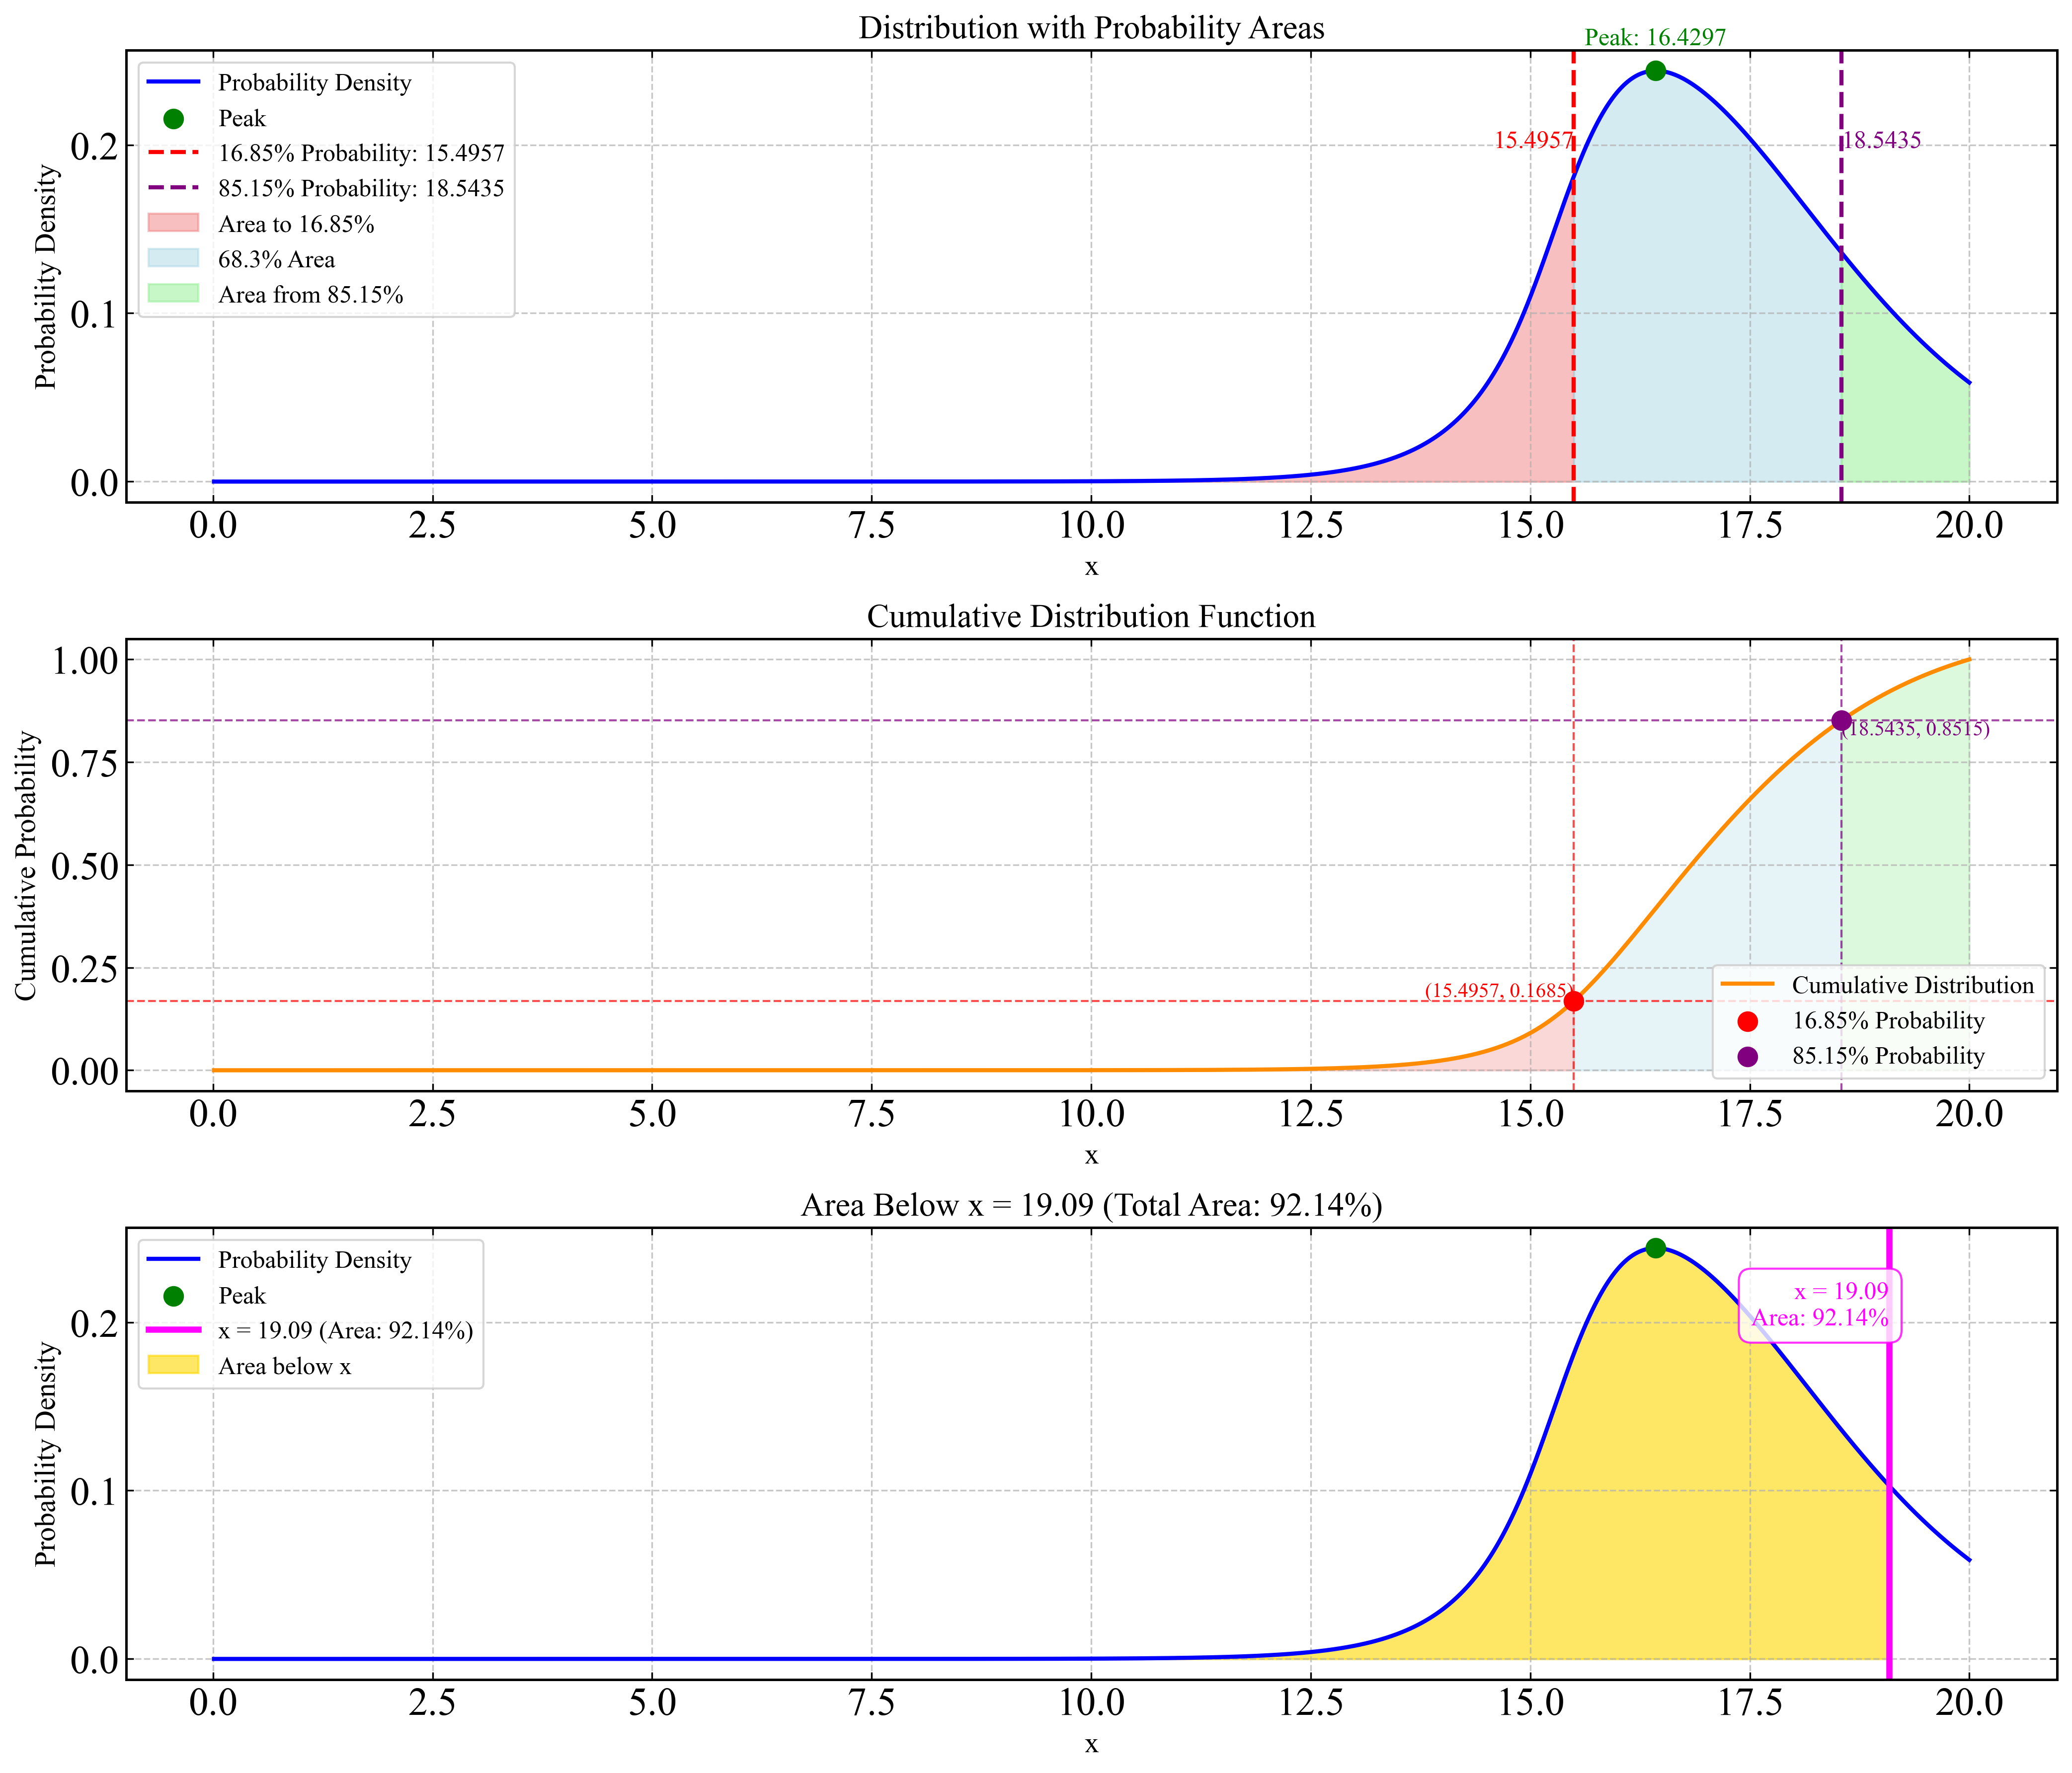

16.85% Probability (lower): 15.4957
85.15% Probability (upper): 18.5435
Peak position: 16.4297
Interval width: 3.0477
Area to 16.85%: 0.1685
Area to 85.15%: 0.8515
Area below Planck scale = 19.09: 0.9214 (92.14%)


In [16]:
x = np.linspace(0.01, 20.0, 50000)
y = posterior_predictive_gaussian(x, posterior_gauss)  

x_lower, x_upper, peak_value_x, cdf, total_area = find_Probabilitys(x, y, lower_Probability=0.1685, upper_Probability=0.8515)

x_value = np.log10(E_PLANCK_GEV.value) 

cdf_interp = interp1d(x, cdf, bounds_error=False, fill_value=(0.0, 1.0))
area_prob = cdf_interp(x_value)

mask = x <= x_value
area_below = np.trapz(y[mask], x[mask])
area_prob = area_below / total_area

print(f"x = {x_value:.2f} area below accounts for {area_prob*100:.2f}% of total area")

fig = plt.figure(figsize=(14, 12))


ax1 = plt.subplot(3, 1, 1)  
ax2 = plt.subplot(3, 1, 2)  
ax3 = plt.subplot(3, 1, 3)  

ax1.plot(x, y, label='Probability Density', color='blue', linewidth=2)
peak_index = np.argmax(y)
ax1.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')

ax1.axvline(x=x_lower, color='red', linestyle='--', linewidth=2, label=f'16.85% Probability: {x_lower:.4f}')
ax1.axvline(x=x_upper, color='purple', linestyle='--', linewidth=2, label=f'85.15% Probability: {x_upper:.4f}')
ax1.fill_between(x, y, where=(x <= x_lower), 
                color='lightcoral', alpha=0.5, label='Area to 16.85%')
ax1.fill_between(x, y, where=(x >= x_lower) & (x <= x_upper), 
                color='lightblue', alpha=0.5, label='68.3% Area')
ax1.fill_between(x, y, where=(x >= x_upper), 
                color='lightgreen', alpha=0.5, label='Area from 85.15%')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('Probability Density', fontsize=14)
ax1.set_title('Distribution with Probability Areas', fontsize=16)
ax1.legend(fontsize=12, loc='best')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.text(x_lower, 0.8 * max(y), f'{x_lower:.4f}', 
         ha='right', va='bottom', fontsize=12, color='red')
ax1.text(x_upper, 0.8 * max(y), f'{x_upper:.4f}', 
         ha='left', va='bottom', fontsize=12, color='purple')
ax1.text(peak_value_x, 1.05 * max(y), f'Peak: {peak_value_x:.4f}', 
         ha='center', va='bottom', fontsize=12, color='green')

ax2.plot(x, cdf, label='Cumulative Distribution', color='darkorange', linewidth=2)
ax2.axhline(y=0.1685, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=0.8515, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_lower, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_upper, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.scatter(x_lower, 0.1685, color='red', s=80, zorder=5, label='16.85% Probability')
ax2.scatter(x_upper, 0.8515, color='purple', s=80, zorder=5, label='85.15% Probability')
ax2.fill_between(x, cdf, where=(x <= x_lower), color='lightcoral', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_lower) & (x <= x_upper), color='lightblue', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_upper), color='lightgreen', alpha=0.3)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('Cumulative Probability', fontsize=14)
ax2.set_title('Cumulative Distribution Function', fontsize=16)
ax2.legend(fontsize=12, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)

ax2.text(x_lower, 0.1685, f'({x_lower:.4f}, 0.1685)', 
         ha='right', va='bottom', fontsize=10, color='red')
ax2.text(x_upper, 0.8515, f'({x_upper:.4f}, 0.8515)', 
         ha='left', va='top', fontsize=10, color='purple')

ax3.plot(x, y, label='Probability Density', color='blue', linewidth=2)
ax3.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')
ax3.axvline(x=x_value, color='magenta', linestyle='-', linewidth=3, 
            label=f'x = {x_value:.2f} (Area: {area_prob*100:.2f}%)')
ax3.fill_between(x, y, where=(x <= x_value), 
                color='gold', alpha=0.6, label='Area below x')
ax3.text(x_value, 0.8 * max(y), f'x = {x_value:.2f}\nArea: {area_prob*100:.2f}%', 
         ha='right', va='bottom', fontsize=12, color='magenta', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='magenta', boxstyle='round,pad=0.5'))
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('Probability Density', fontsize=14)
ax3.set_title(f'Area Below x = {x_value:.2f} (Total Area: {area_prob*100:.2f}%)', fontsize=16)
ax3.legend(fontsize=12, loc='best')
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"16.85% Probability (lower): {x_lower:.4f}")
print(f"85.15% Probability (upper): {x_upper:.4f}")
print(f"Peak position: {peak_value_x:.4f}")
print(f"Interval width: {x_upper - x_lower:.4f}")
print(f"Area to 16.85%: {cdf[np.searchsorted(x, x_lower)]:.4f}")
print(f"Area to 85.15%: {cdf[np.searchsorted(x, x_upper)]:.4f}")
print(f"Area below Planck scale = {x_value:.2f}: {area_prob:.4f} ({area_prob*100:.2f}%)")

# fig.savefig("./Figures/fig_ppd_analysis_EQG1_log_Liu.png", dpi=300, bbox_inches='tight')

x = 19.09 area below accounts for 93.08% of total area


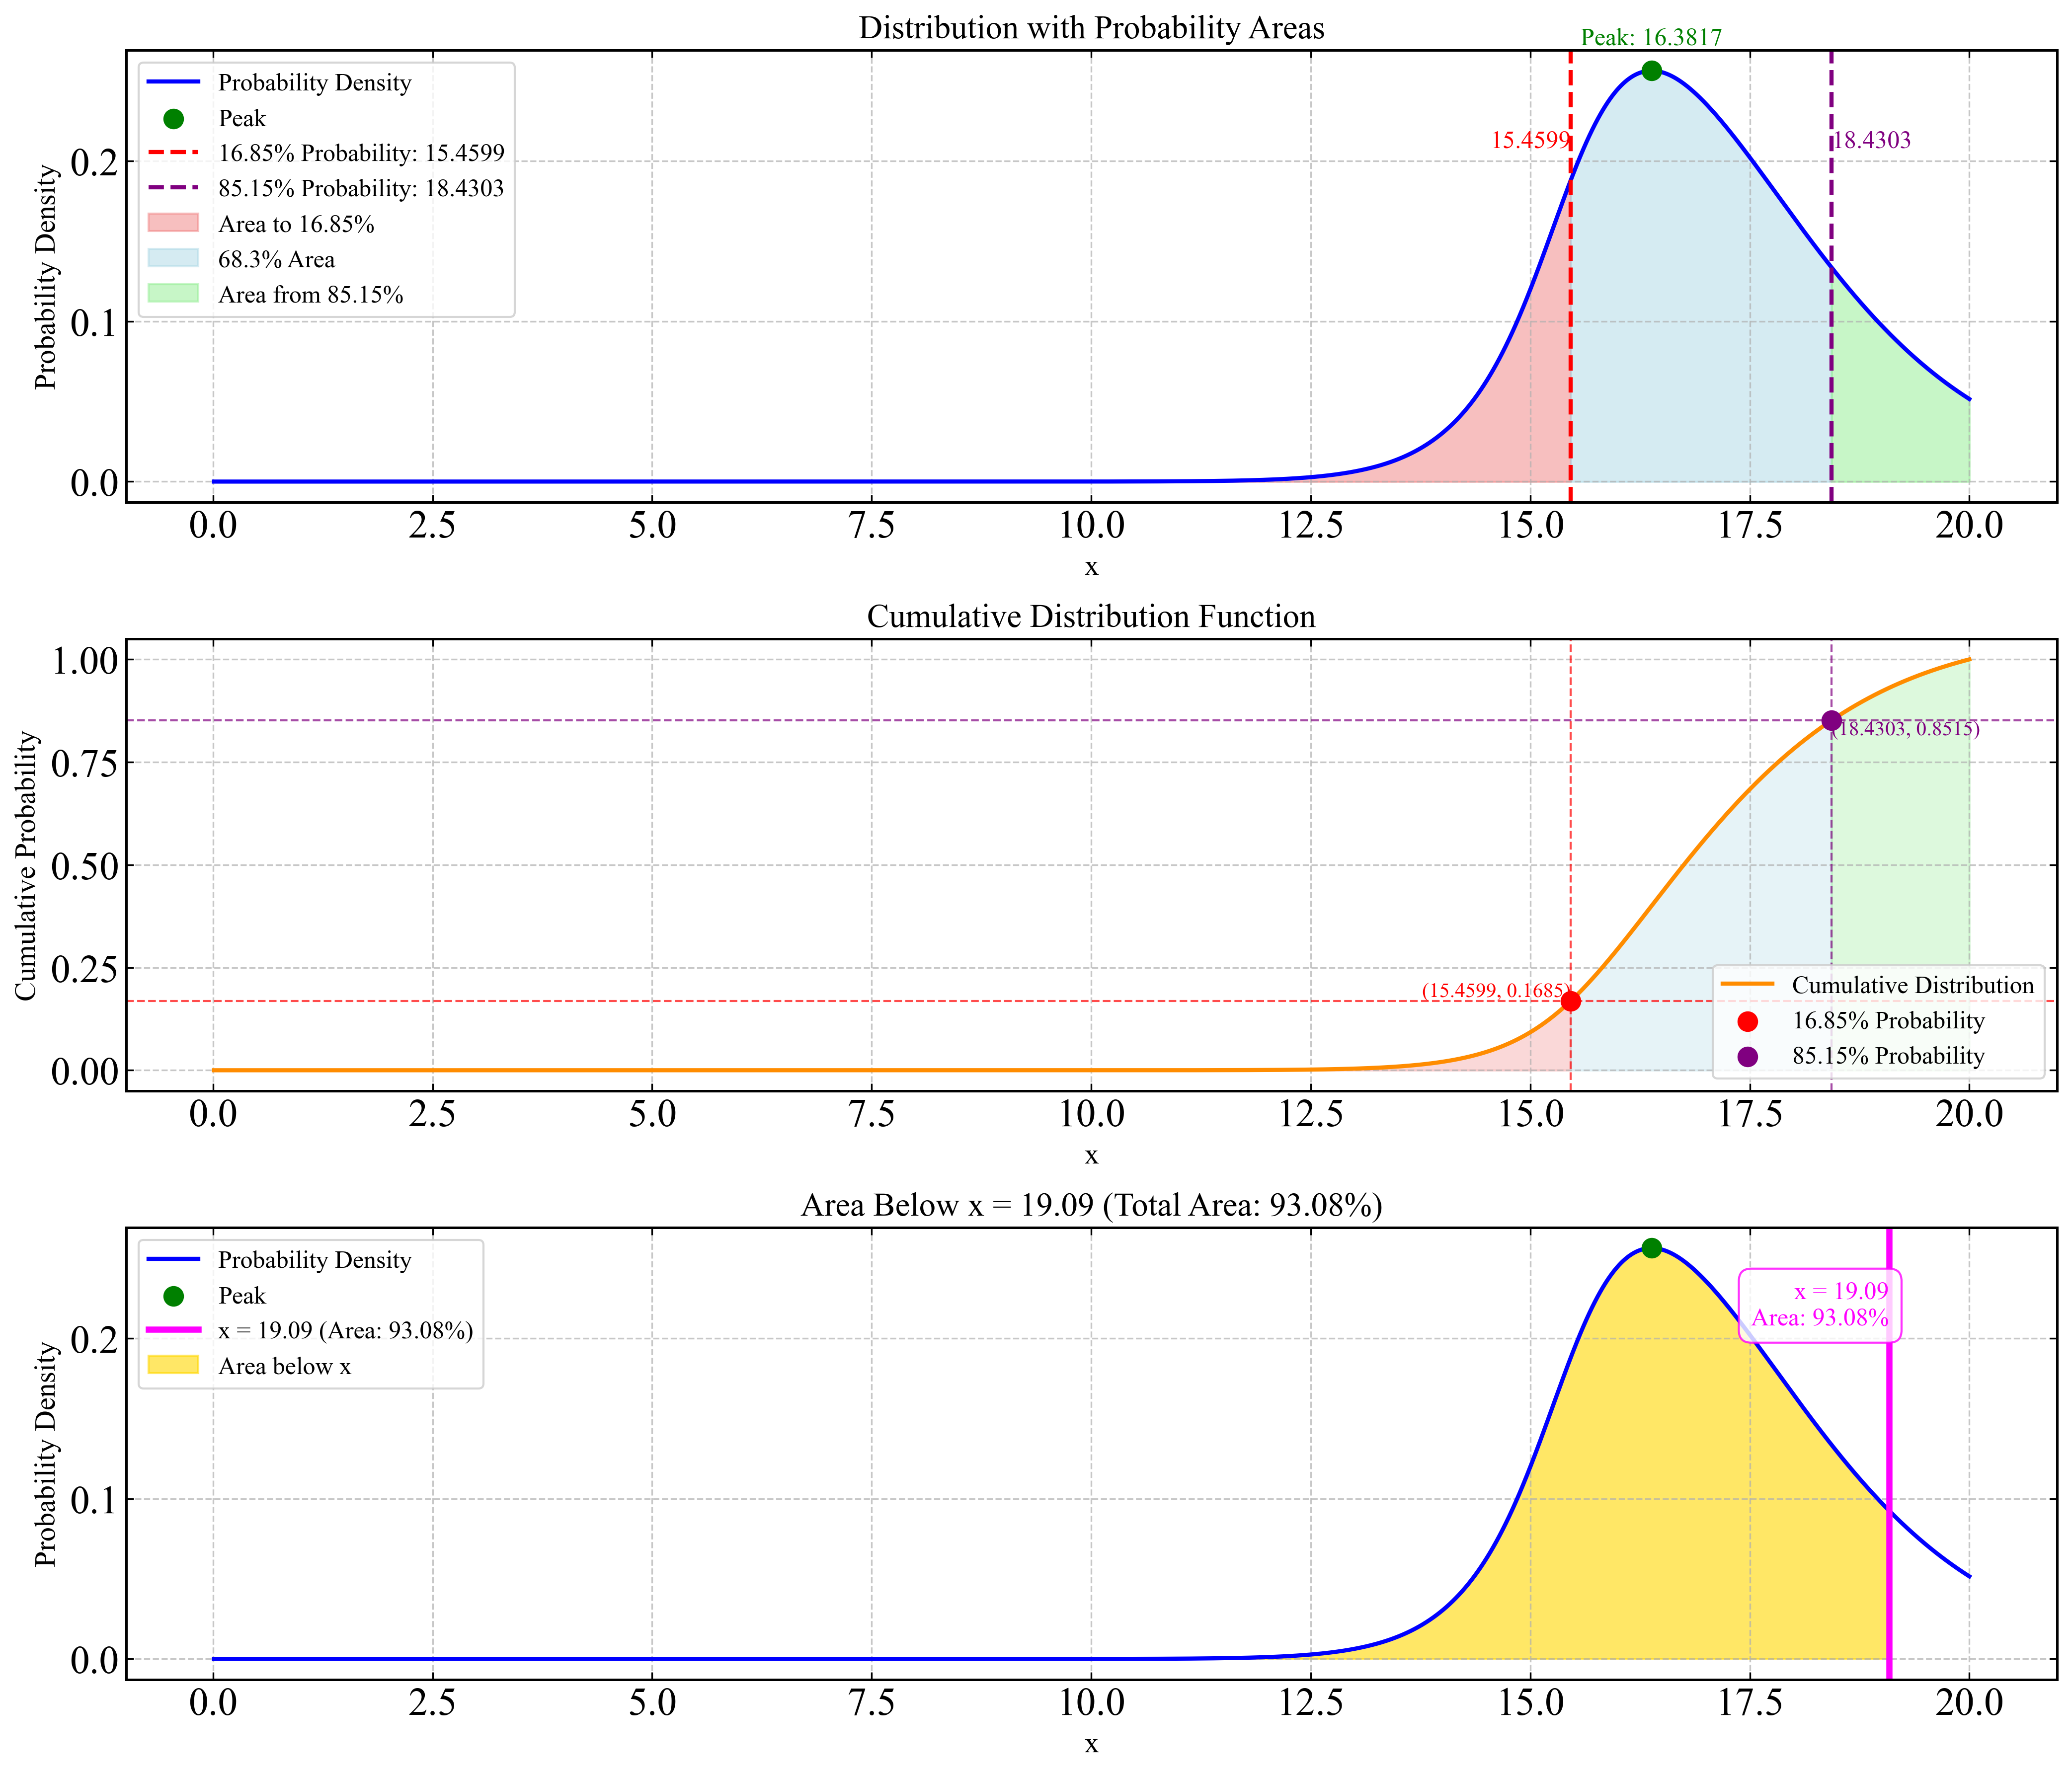

16.85% Probability (lower): 15.4599
85.15% Probability (upper): 18.4303
Peak position: 16.3817
Interval width: 2.9704
Area to 16.85%: 0.1686
Area to 85.15%: 0.8515
Area below Planck scale = 19.09: 0.9308 (93.08%)


In [17]:
x = np.linspace(0.01, 20.0, 50000)
y = posterior_predictive_lognormal(x, posterior_log)

x_lower, x_upper, peak_value_x, cdf, total_area = find_Probabilitys(x, y, lower_Probability=0.1685, upper_Probability=0.8515)

x_value = np.log10(E_PLANCK_GEV.value)

cdf_interp = interp1d(x, cdf, bounds_error=False, fill_value=(0.0, 1.0))
area_prob = cdf_interp(x_value)

mask = x <= x_value
area_below = np.trapz(y[mask], x[mask])
area_prob = area_below / total_area

print(f"x = {x_value:.2f} area below accounts for {area_prob*100:.2f}% of total area")

fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

ax1.plot(x, y, label='Probability Density', color='blue', linewidth=2)

peak_index = np.argmax(y)
ax1.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')

ax1.axvline(x=x_lower, color='red', linestyle='--', linewidth=2, label=f'16.85% Probability: {x_lower:.4f}')
ax1.axvline(x=x_upper, color='purple', linestyle='--', linewidth=2, label=f'85.15% Probability: {x_upper:.4f}')

ax1.fill_between(x, y, where=(x <= x_lower), color='lightcoral', alpha=0.5, label='Area to 16.85%')

ax1.fill_between(x, y, where=(x >= x_lower) & (x <= x_upper), color='lightblue', alpha=0.5, label='68.3% Area')

ax1.fill_between(x, y, where=(x >= x_upper), color='lightgreen', alpha=0.5, label='Area from 85.15%')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('Probability Density', fontsize=14)
ax1.set_title('Distribution with Probability Areas', fontsize=16)
ax1.legend(fontsize=12, loc='best')
ax1.grid(True, linestyle='--', alpha=0.7)

ax1.text(x_lower, 0.8 * max(y), f'{x_lower:.4f}', ha='right', va='bottom', fontsize=12, color='red')
ax1.text(x_upper, 0.8 * max(y), f'{x_upper:.4f}', ha='left', va='bottom', fontsize=12, color='purple')
ax1.text(peak_value_x, 1.05 * max(y), f'Peak: {peak_value_x:.4f}', ha='center', va='bottom', fontsize=12, color='green')

ax2.plot(x, cdf, label='Cumulative Distribution', color='darkorange', linewidth=2)

ax2.axhline(y=0.1685, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=0.8515, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_lower, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_upper, color='purple', linestyle='--', linewidth=1, alpha=0.7)

ax2.scatter(x_lower, 0.1685, color='red', s=80, zorder=5, label='16.85% Probability')
ax2.scatter(x_upper, 0.8515, color='purple', s=80, zorder=5, label='85.15% Probability')

ax2.fill_between(x, cdf, where=(x <= x_lower), color='lightcoral', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_lower) & (x <= x_upper), color='lightblue', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_upper), color='lightgreen', alpha=0.3)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('Cumulative Probability', fontsize=14)
ax2.set_title('Cumulative Distribution Function', fontsize=16)
ax2.legend(fontsize=12, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)

ax2.text(x_lower, 0.1685, f'({x_lower:.4f}, 0.1685)', ha='right', va='bottom', fontsize=10, color='red')
ax2.text(x_upper, 0.8515, f'({x_upper:.4f}, 0.8515)', ha='left', va='top', fontsize=10, color='purple')

ax3.plot(x, y, label='Probability Density', color='blue', linewidth=2)

ax3.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')

ax3.axvline(x=x_value, color='magenta', linestyle='-', linewidth=3, label=f'x = {x_value:.2f} (Area: {area_prob*100:.2f}%)')

ax3.fill_between(x, y, where=(x <= x_value), color='gold', alpha=0.6, label='Area below x')

ax3.text(x_value, 0.8 * max(y), f'x = {x_value:.2f}\nArea: {area_prob*100:.2f}%', ha='right', va='bottom', fontsize=12, color='magenta', bbox=dict(facecolor='white', alpha=0.8, edgecolor='magenta', boxstyle='round,pad=0.5'))

ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('Probability Density', fontsize=14)
ax3.set_title(f'Area Below x = {x_value:.2f} (Total Area: {area_prob*100:.2f}%)', fontsize=16)
ax3.legend(fontsize=12, loc='best')
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"16.85% Probability (lower): {x_lower:.4f}")
print(f"85.15% Probability (upper): {x_upper:.4f}")
print(f"Peak position: {peak_value_x:.4f}")
print(f"Interval width: {x_upper - x_lower:.4f}")
print(f"Area to 16.85%: {cdf[np.searchsorted(x, x_lower)]:.4f}")
print(f"Area to 85.15%: {cdf[np.searchsorted(x, x_upper)]:.4f}")
print(f"Area below Planck scale = {x_value:.2f}: {area_prob:.4f} ({area_prob*100:.2f}%)")


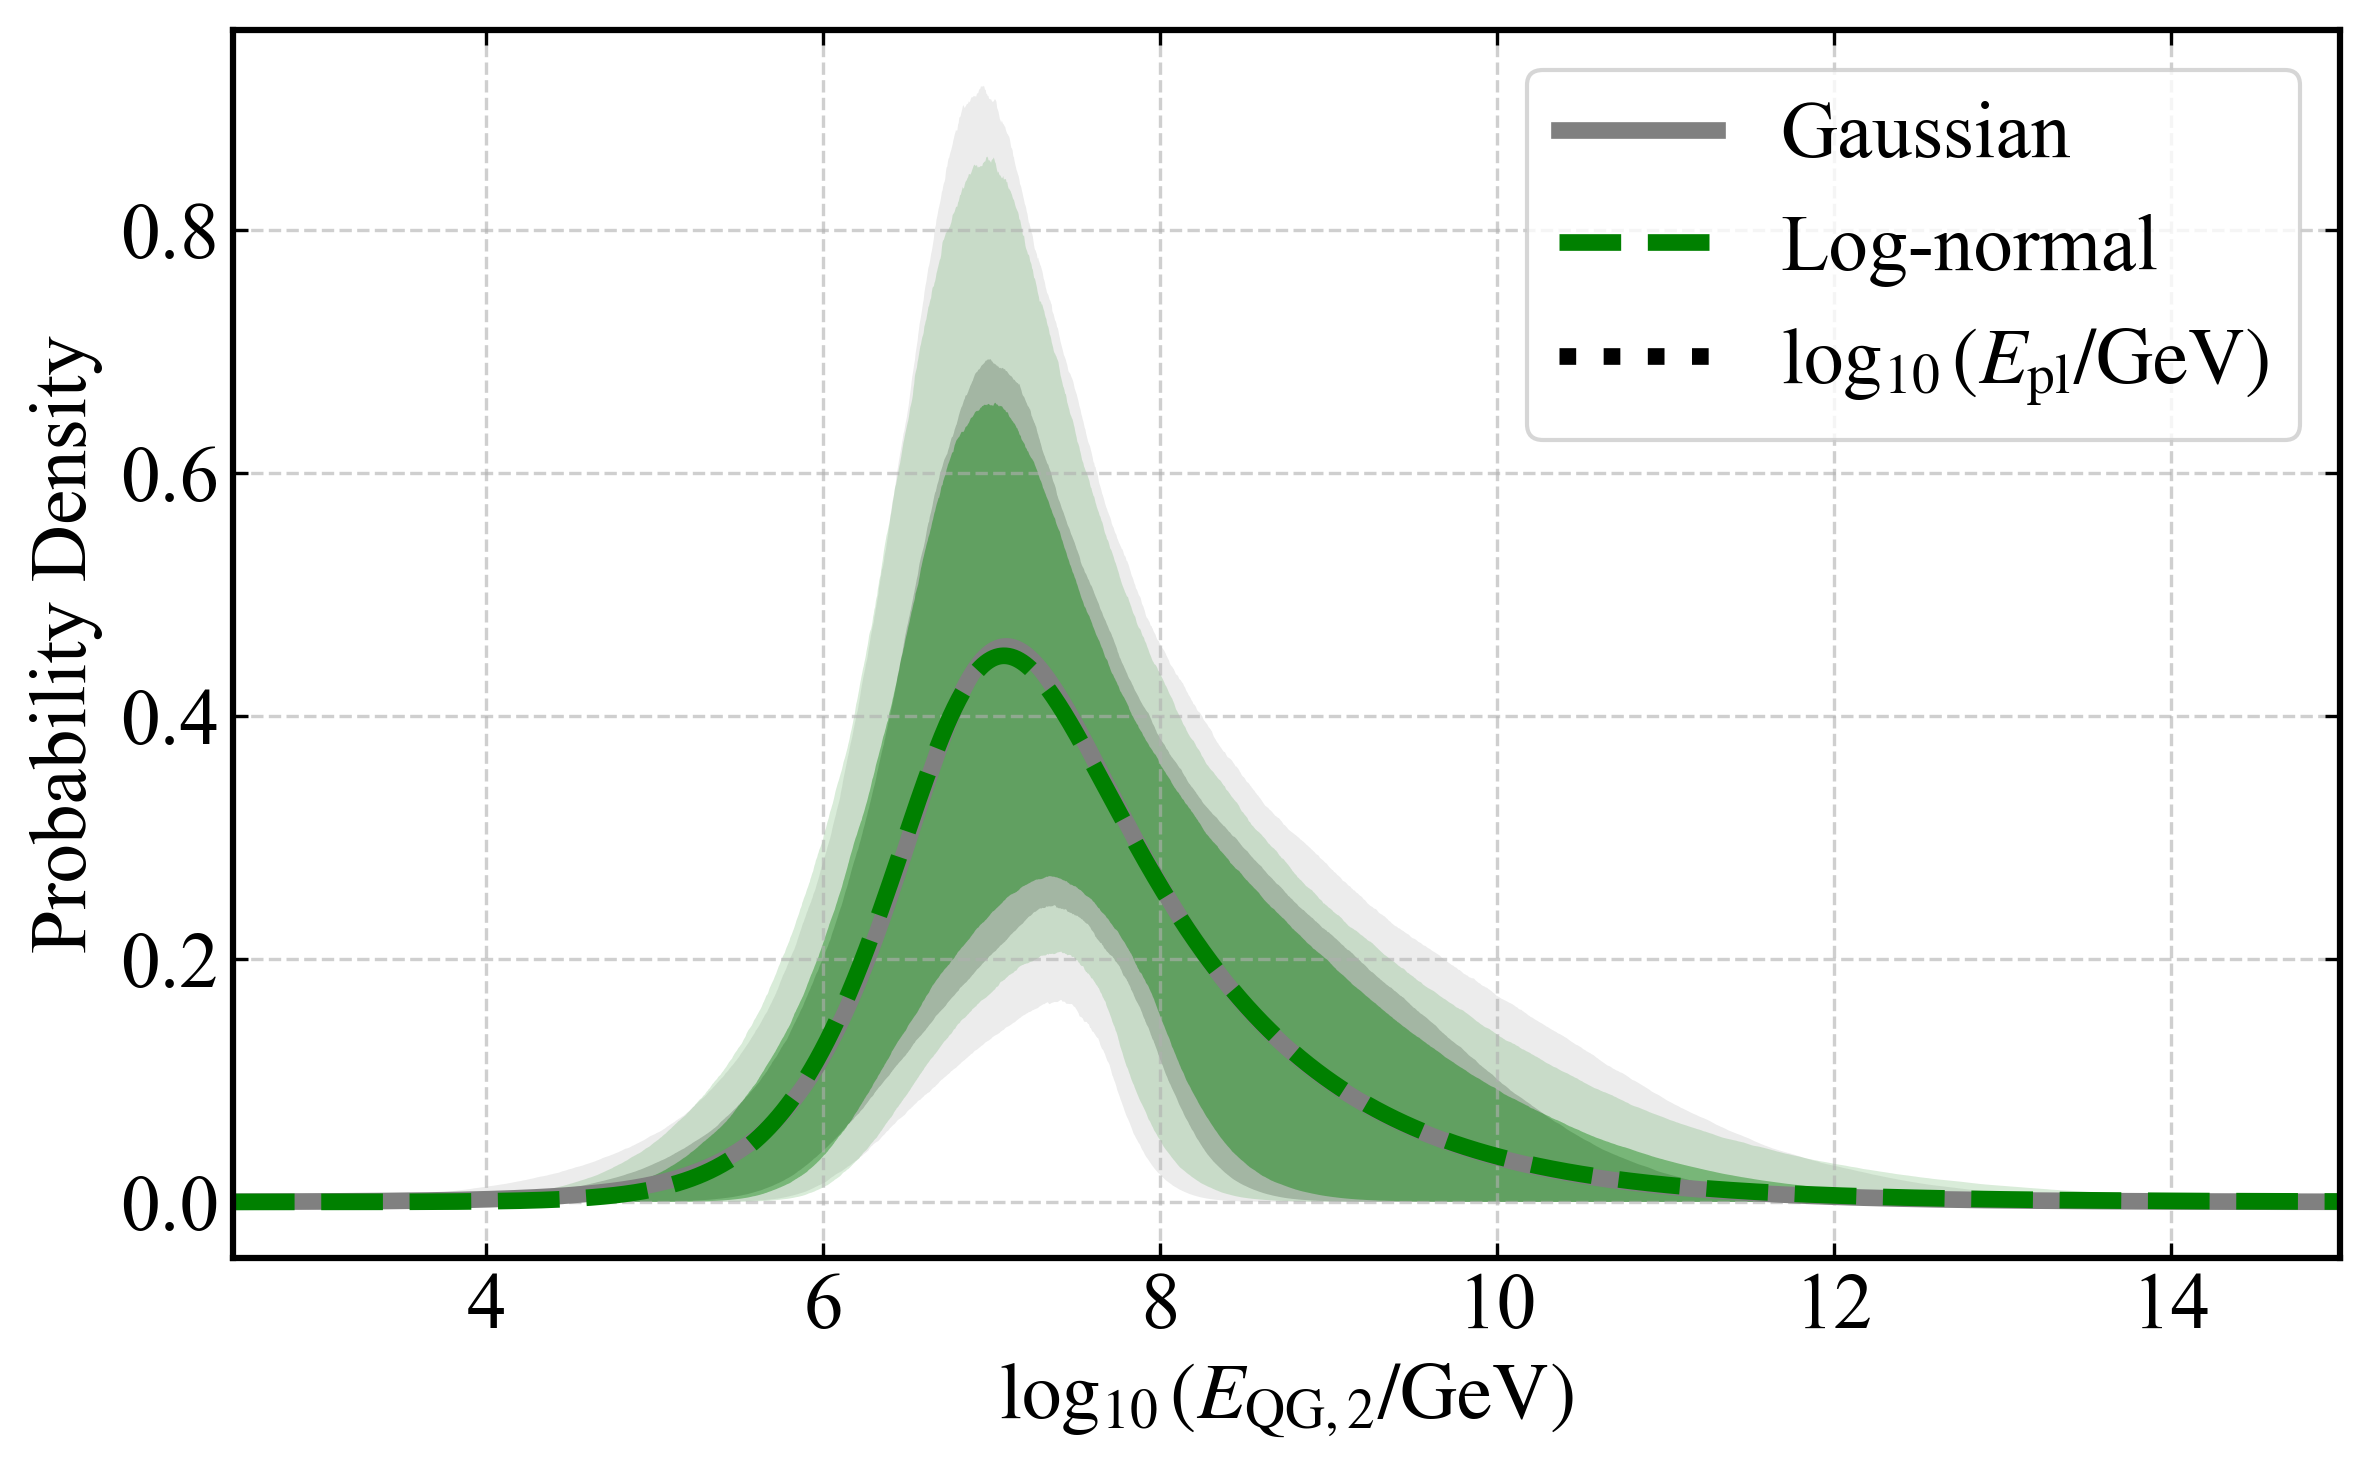

In [ ]:
model_types = ['gauss', 'log']
gauss_dir = f'./results_main/outdir_{model_types[0]}_EQG2_Liu/hyperLIV_{model_types[0]}_result.json'
log_dir = f'./results_main/outdir_{model_types[1]}_EQG2_Liu/hyperLIV_{model_types[1]}_result.json'
filenames = [gauss_dir, log_dir]

result_gauss = bilby.result.read_in_result(filename=filenames[0])
posterior_gauss = result_gauss.posterior[['mu', 'sigma']].values
result_log = bilby.result.read_in_result(filename=filenames[1])
posterior_log = result_log.posterior[['mu', 'sigma']].values
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.12, right=0.97, top=0.97, bottom=0.12)
ppd_gauss = posterior_predictive_gaussian(x, posterior_gauss)
ppd_log = posterior_predictive_lognormal(x, posterior_log)
ppd_gauss_1sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_1SIGMA, 'gaussian')
ppd_gauss_2sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_2SIGMA, 'gaussian')
ppd_log_1sigma = predictive_uncertainty(x, posterior_log, QUANTILE_1SIGMA, 'log-normal')
ppd_log_2sigma = predictive_uncertainty(x, posterior_log, QUANTILE_2SIGMA, 'log-normal')

colors = ['gray', 'green']
ax.plot(x, ppd_gauss, ls='-', color=colors[0], lw=4, label='Gaussian')
ax.fill_between(x, ppd_gauss_1sigma[0, :], ppd_gauss_1sigma[1, :],
                alpha=0.4, facecolor=colors[0])
ax.fill_between(x, ppd_gauss_2sigma[0, :], ppd_gauss_2sigma[1, :],
                alpha=0.15, facecolor=colors[0])

ax.plot(x, ppd_log, ls='--', color=colors[1], lw=4, label='Log-normal')
ax.fill_between(x, ppd_log_1sigma[0, :], ppd_log_1sigma[1, :],
                alpha=0.4, facecolor=colors[1])
ax.fill_between(x, ppd_log_2sigma[0, :], ppd_log_2sigma[1, :],
                alpha=0.15, facecolor=colors[1])
ax.axvline(x=np.log10(E_PLANCK_GEV.value), linewidth=4, color='k', 
            ls=':', label=r'$\log_{10}(E_{\rm pl}/{\rm GeV})$')
ax.set_xlim([2.5,15])
ax.set_xlabel(r"$\log_{10}(E_{\rm QG,2}/{\rm GeV})$")
ax.set_ylabel("Probability Density")
ax.legend()

ax.grid(True, linestyle='--', alpha=0.6)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
fig.savefig("./Figures/fig_ppd_EQG2_Liu.png", dpi=300)
plt.show()

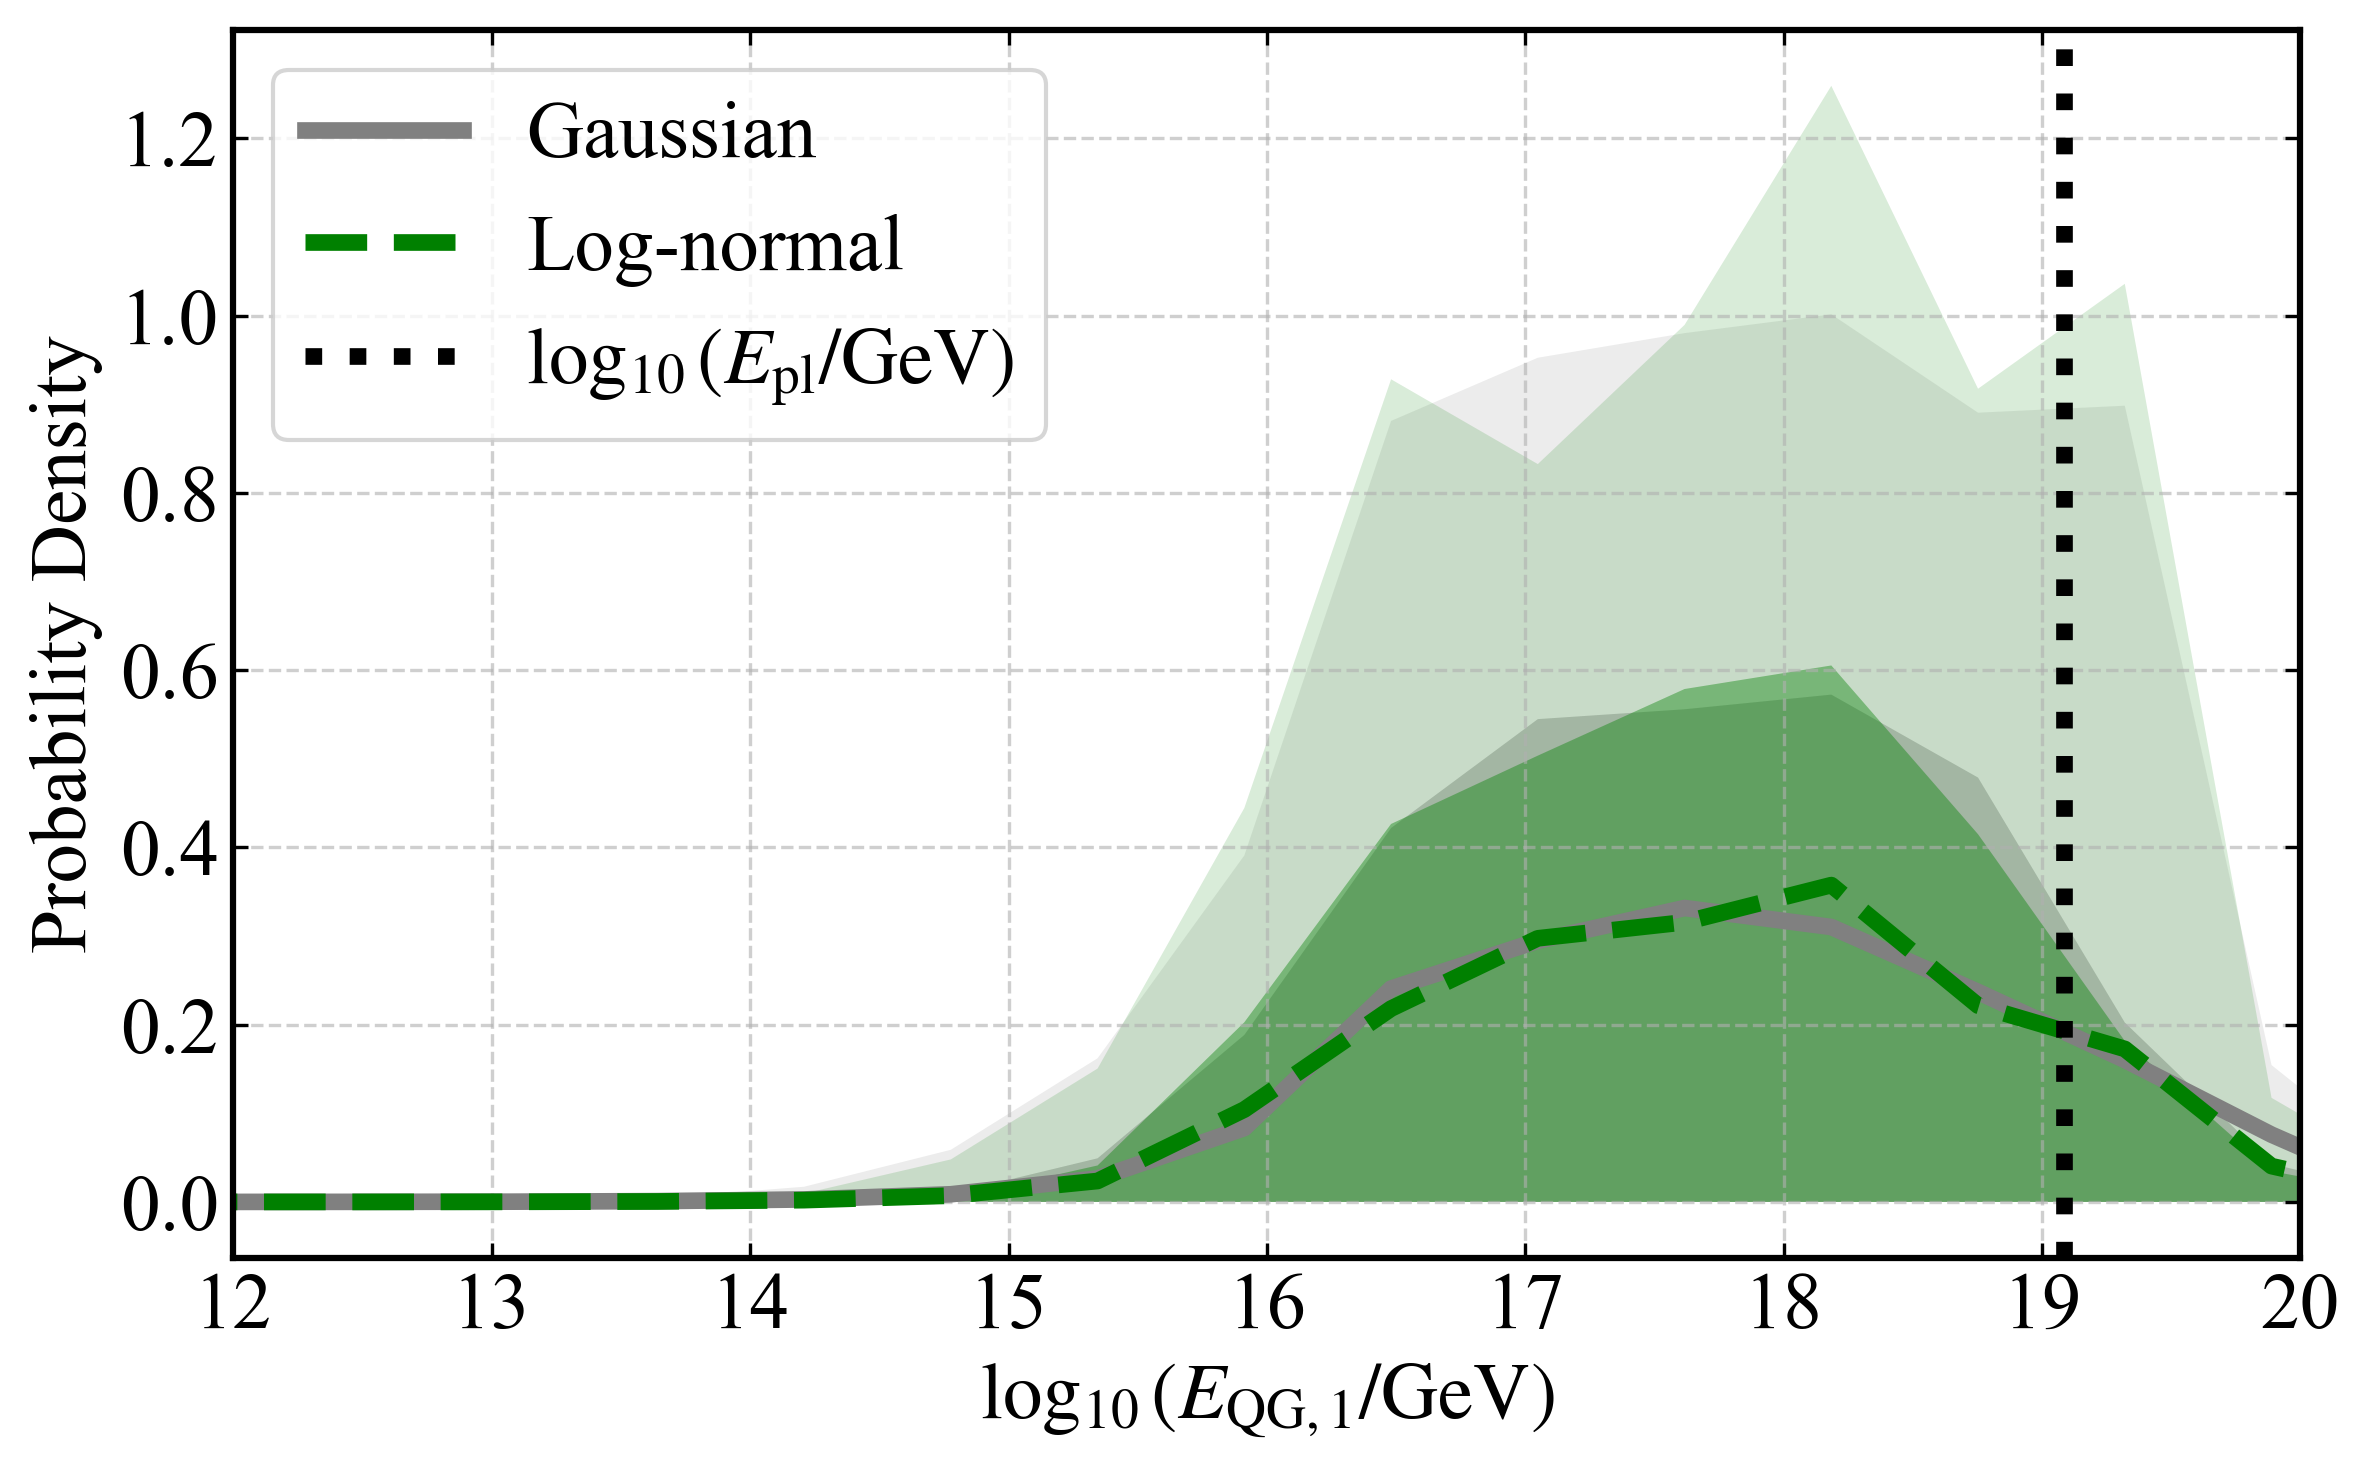

In [21]:
model_types = ['gauss', 'log']
gauss_dir = f'./results_main/outdir_{model_types[0]}_cubicspline_subLn1/{model_types[0]}_cubicspline_result.json'
log_dir = f'./results_main/outdir_{model_types[1]}_cubicspline_subLn1/{model_types[1]}_cubicspline_result.json'
filenames = [gauss_dir, log_dir]
x=np.array(np.linspace(0.01,25.0,45))
result_gauss = bilby.result.read_in_result(filename=filenames[0])
posterior_gauss = result_gauss.posterior[['mu', 'sigma']].values

result_log = bilby.result.read_in_result(filename=filenames[1])
posterior_log = result_log.posterior[['mu', 'sigma']].values
fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.12, right=0.97, top=0.97, bottom=0.12)

ppd_gauss = posterior_predictive_gaussian(x, posterior_gauss)
ppd_log = posterior_predictive_lognormal(x, posterior_log)

ppd_gauss_1sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_1SIGMA, 'gaussian')
ppd_gauss_2sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_2SIGMA, 'gaussian')
ppd_log_1sigma = predictive_uncertainty(x, posterior_log, QUANTILE_1SIGMA, 'log-normal')
ppd_log_2sigma = predictive_uncertainty(x, posterior_log, QUANTILE_2SIGMA, 'log-normal')

colors = ['gray', 'green']

ax.plot(x, ppd_gauss, ls='-', color=colors[0], lw=4, label='Gaussian')
ax.fill_between(x, ppd_gauss_1sigma[0, :], ppd_gauss_1sigma[1, :],
                alpha=0.4, facecolor=colors[0])
ax.fill_between(x, ppd_gauss_2sigma[0, :], ppd_gauss_2sigma[1, :],
                alpha=0.15, facecolor=colors[0])

ax.plot(x, ppd_log, ls='--', color=colors[1], lw=4, label='Log-normal')
ax.fill_between(x, ppd_log_1sigma[0, :], ppd_log_1sigma[1, :],
                alpha=0.4, facecolor=colors[1])
ax.fill_between(x, ppd_log_2sigma[0, :], ppd_log_2sigma[1, :],
                alpha=0.15, facecolor=colors[1])
ax.axvline(x=np.log10(E_PLANCK_GEV.value), linewidth=4, color='k', 
            ls=':', label=r'$\log_{10}(E_{\rm pl}/{\rm GeV})$')
ax.set_xlim([12, 20])
ax.set_xlabel(r"$\log_{10}(E_{\rm QG,1}/{\rm GeV})$")
ax.set_ylabel("Probability Density")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
fig.savefig("./Figures/fig_ppd_EQG1_cubicspline.png", dpi=300)
plt.show()

x = 19.09 area below accounts for 87.67% of total area


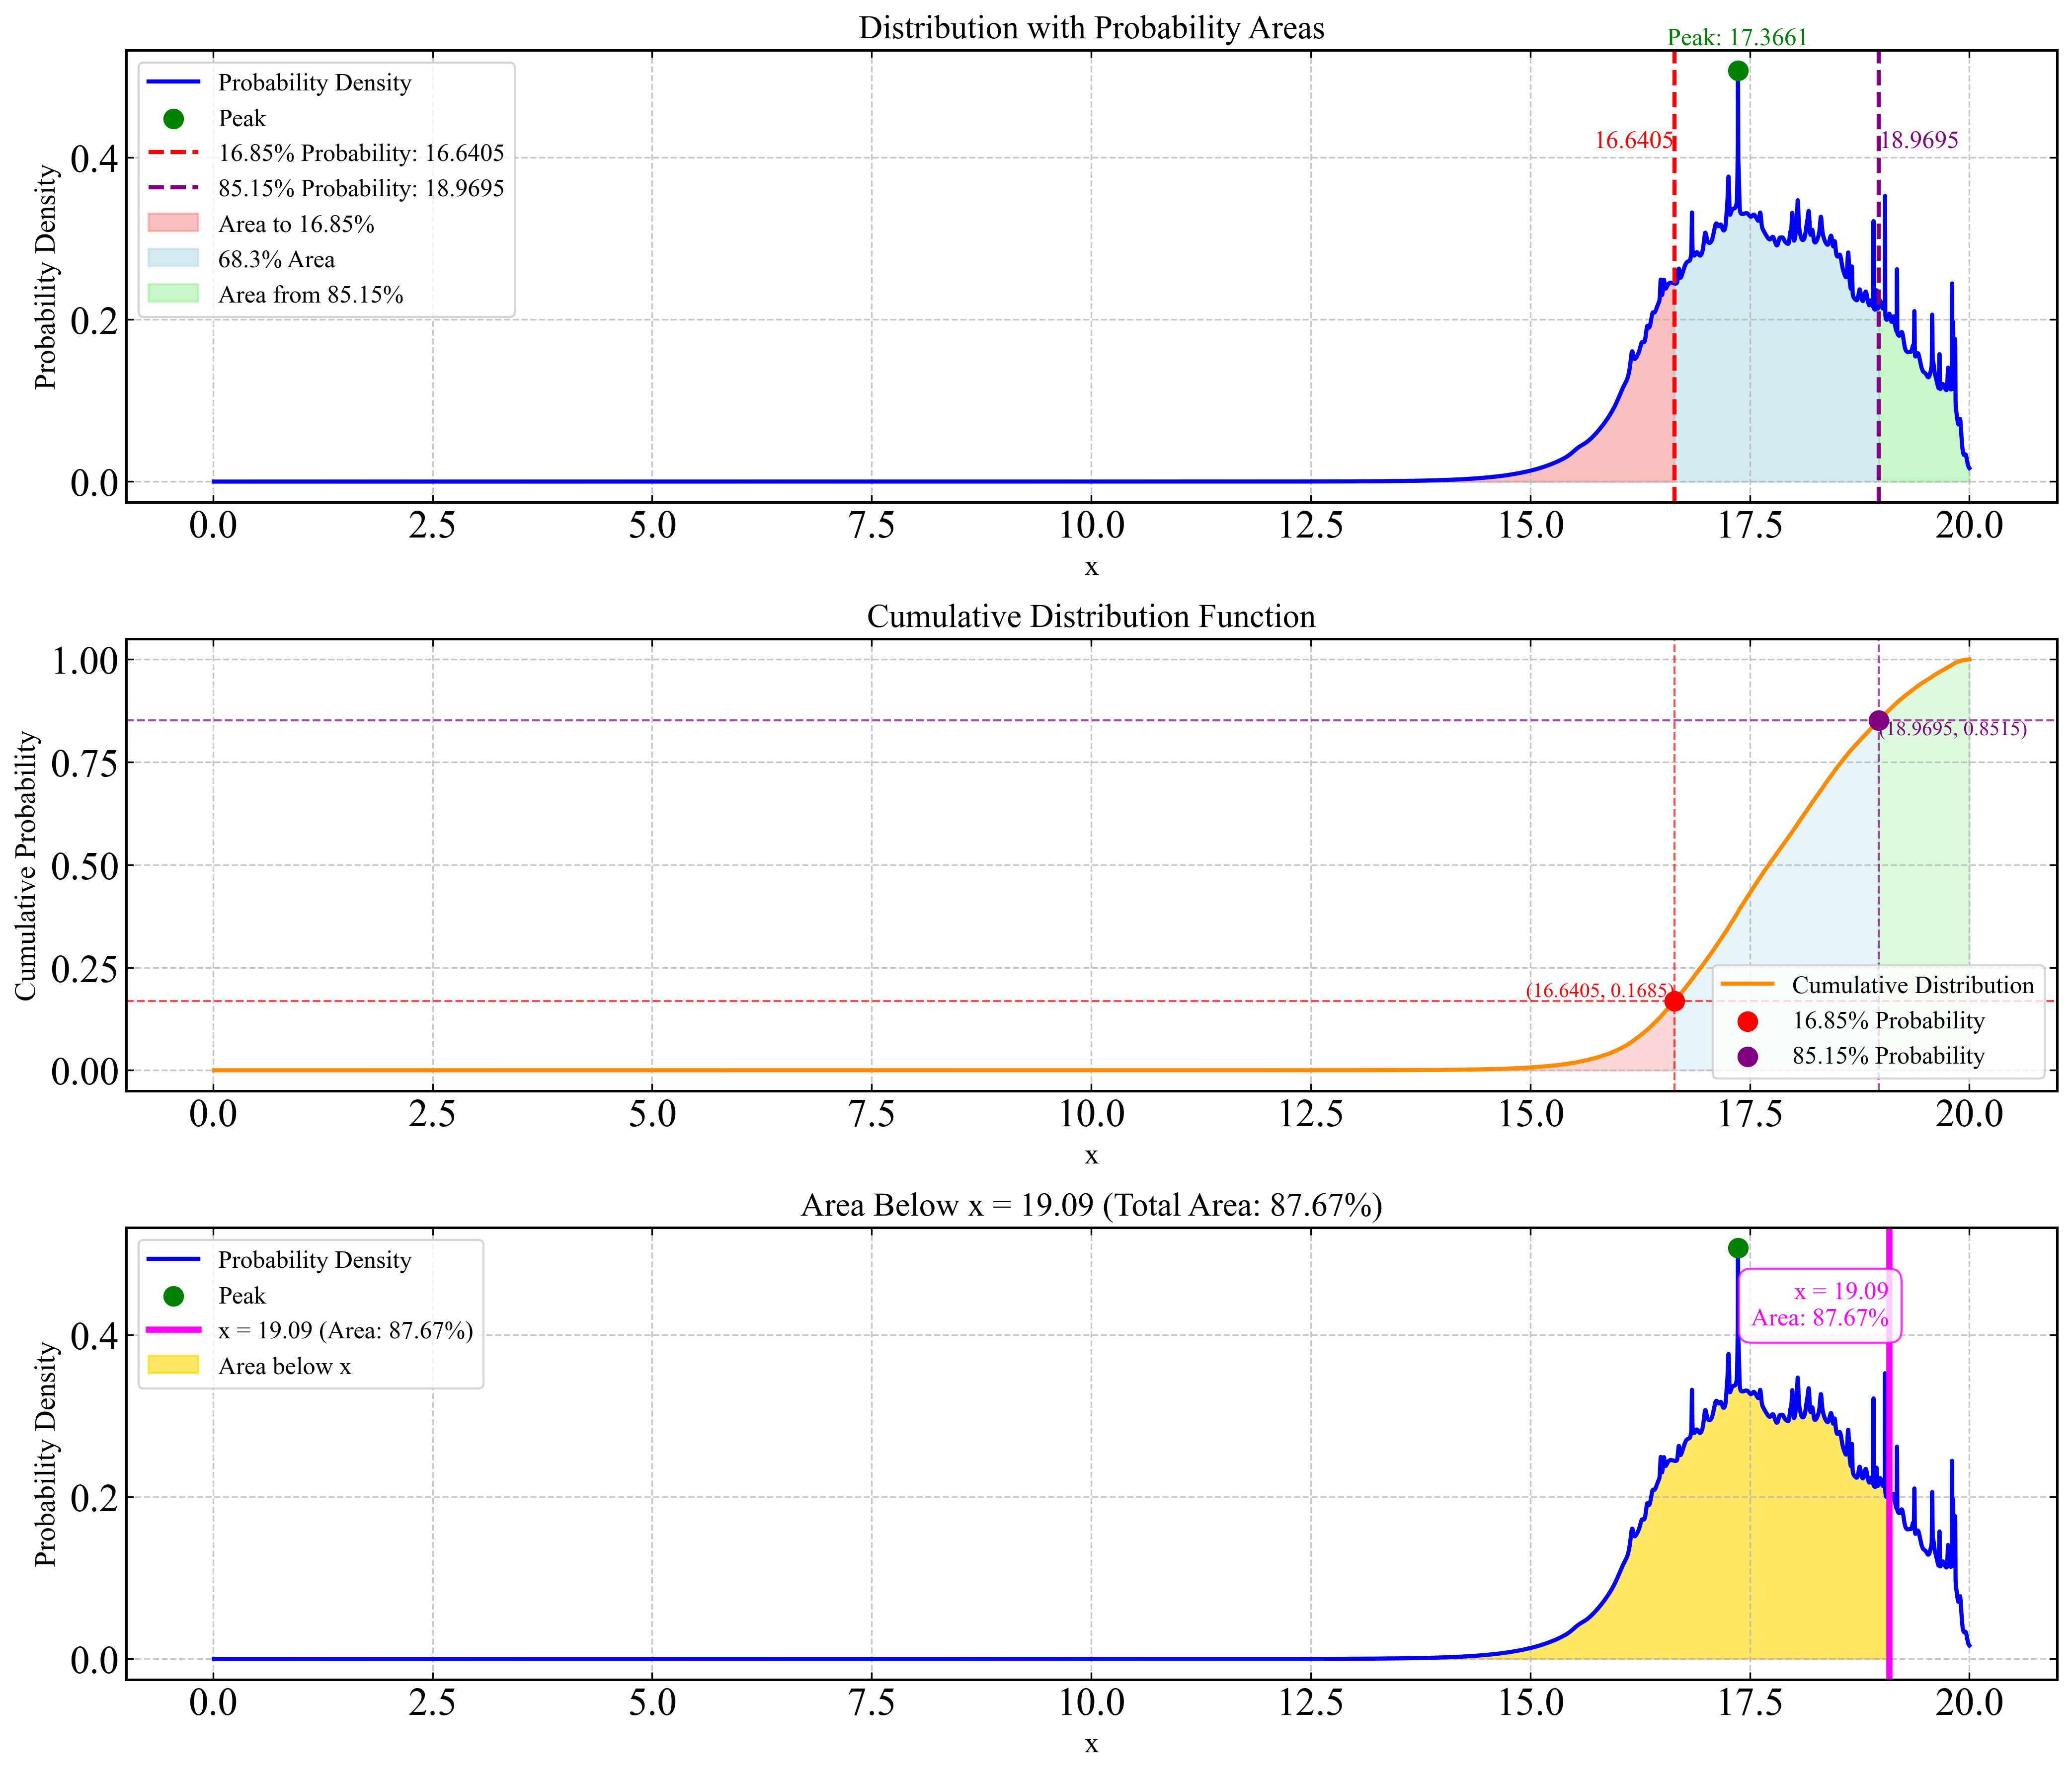

16.85% Probability (lower): 16.6405
85.15% Probability (upper): 18.9695
Peak position: 17.3661
Interval width: 2.3290
Area to 16.85%: 0.1686
Area to 85.15%: 0.8515
Area below Planck scale = 19.09: 0.8767 (87.67%)


In [22]:
x = np.linspace(0.01, 20.0, 50000)
y = posterior_predictive_gaussian(x, posterior_gauss)  
x_lower, x_upper, peak_value_x, cdf, total_area = find_Probabilitys(x, y, lower_Probability=0.1685, upper_Probability=0.8515)
x_value = np.log10(E_PLANCK_GEV.value)  
cdf_interp = interp1d(x, cdf, bounds_error=False, fill_value=(0.0, 1.0))
area_prob = cdf_interp(x_value)

mask = x <= x_value
area_below = np.trapz(y[mask], x[mask])
area_prob = area_below / total_area

print(f"x = {x_value:.2f} area below accounts for {area_prob*100:.2f}% of total area")

fig = plt.figure(figsize=(14, 12))
ax1 = plt.subplot(3, 1, 1)  
ax2 = plt.subplot(3, 1, 2)  
ax3 = plt.subplot(3, 1, 3) 

ax1.plot(x, y, label='Probability Density', color='blue', linewidth=2)

peak_index = np.argmax(y)
ax1.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')

ax1.axvline(x=x_lower, color='red', linestyle='--', linewidth=2, label=f'16.85% Probability: {x_lower:.4f}')
ax1.axvline(x=x_upper, color='purple', linestyle='--', linewidth=2, label=f'85.15% Probability: {x_upper:.4f}')

ax1.fill_between(x, y, where=(x <= x_lower), 
                color='lightcoral', alpha=0.5, label='Area to 16.85%')

ax1.fill_between(x, y, where=(x >= x_lower) & (x <= x_upper), 
                color='lightblue', alpha=0.5, label='68.3% Area')

ax1.fill_between(x, y, where=(x >= x_upper), 
                color='lightgreen', alpha=0.5, label='Area from 85.15%')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('Probability Density', fontsize=14)
ax1.set_title('Distribution with Probability Areas', fontsize=16)
ax1.legend(fontsize=12, loc='best')
ax1.grid(True, linestyle='--', alpha=0.7)

ax1.text(x_lower, 0.8 * max(y), f'{x_lower:.4f}', 
         ha='right', va='bottom', fontsize=12, color='red')
ax1.text(x_upper, 0.8 * max(y), f'{x_upper:.4f}', 
         ha='left', va='bottom', fontsize=12, color='purple')
ax1.text(peak_value_x, 1.05 * max(y), f'Peak: {peak_value_x:.4f}', 
         ha='center', va='bottom', fontsize=12, color='green')

ax2.plot(x, cdf, label='Cumulative Distribution', color='darkorange', linewidth=2)
ax2.axhline(y=0.1685, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=0.8515, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_lower, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_upper, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.scatter(x_lower, 0.1685, color='red', s=80, zorder=5, label='16.85% Probability')
ax2.scatter(x_upper, 0.8515, color='purple', s=80, zorder=5, label='85.15% Probability')
ax2.fill_between(x, cdf, where=(x <= x_lower), color='lightcoral', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_lower) & (x <= x_upper), color='lightblue', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_upper), color='lightgreen', alpha=0.3)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('Cumulative Probability', fontsize=14)
ax2.set_title('Cumulative Distribution Function', fontsize=16)
ax2.legend(fontsize=12, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.text(x_lower, 0.1685, f'({x_lower:.4f}, 0.1685)', 
         ha='right', va='bottom', fontsize=10, color='red')
ax2.text(x_upper, 0.8515, f'({x_upper:.4f}, 0.8515)', 
         ha='left', va='top', fontsize=10, color='purple')
ax3.plot(x, y, label='Probability Density', color='blue', linewidth=2)
ax3.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')
ax3.axvline(x=x_value, color='magenta', linestyle='-', linewidth=3, 
            label=f'x = {x_value:.2f} (Area: {area_prob*100:.2f}%)')
ax3.fill_between(x, y, where=(x <= x_value), 
                color='gold', alpha=0.6, label='Area below x')

ax3.text(x_value, 0.8 * max(y), f'x = {x_value:.2f}\nArea: {area_prob*100:.2f}%', 
         ha='right', va='bottom', fontsize=12, color='magenta', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='magenta', boxstyle='round,pad=0.5'))

ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('Probability Density', fontsize=14)
ax3.set_title(f'Area Below x = {x_value:.2f} (Total Area: {area_prob*100:.2f}%)', fontsize=16)
ax3.legend(fontsize=12, loc='best')
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"16.85% Probability (lower): {x_lower:.4f}")
print(f"85.15% Probability (upper): {x_upper:.4f}")
print(f"Peak position: {peak_value_x:.4f}")
print(f"Interval width: {x_upper - x_lower:.4f}")
print(f"Area to 16.85%: {cdf[np.searchsorted(x, x_lower)]:.4f}")
print(f"Area to 85.15%: {cdf[np.searchsorted(x, x_upper)]:.4f}")
print(f"Area below Planck scale = {x_value:.2f}: {area_prob:.4f} ({area_prob*100:.2f}%)")

# fig.savefig("./Figures/fig_ppd_analysis_EQG1_log_Liu.png", dpi=300, bbox_inches='tight')

x = 19.09 area below accounts for 87.82% of total area


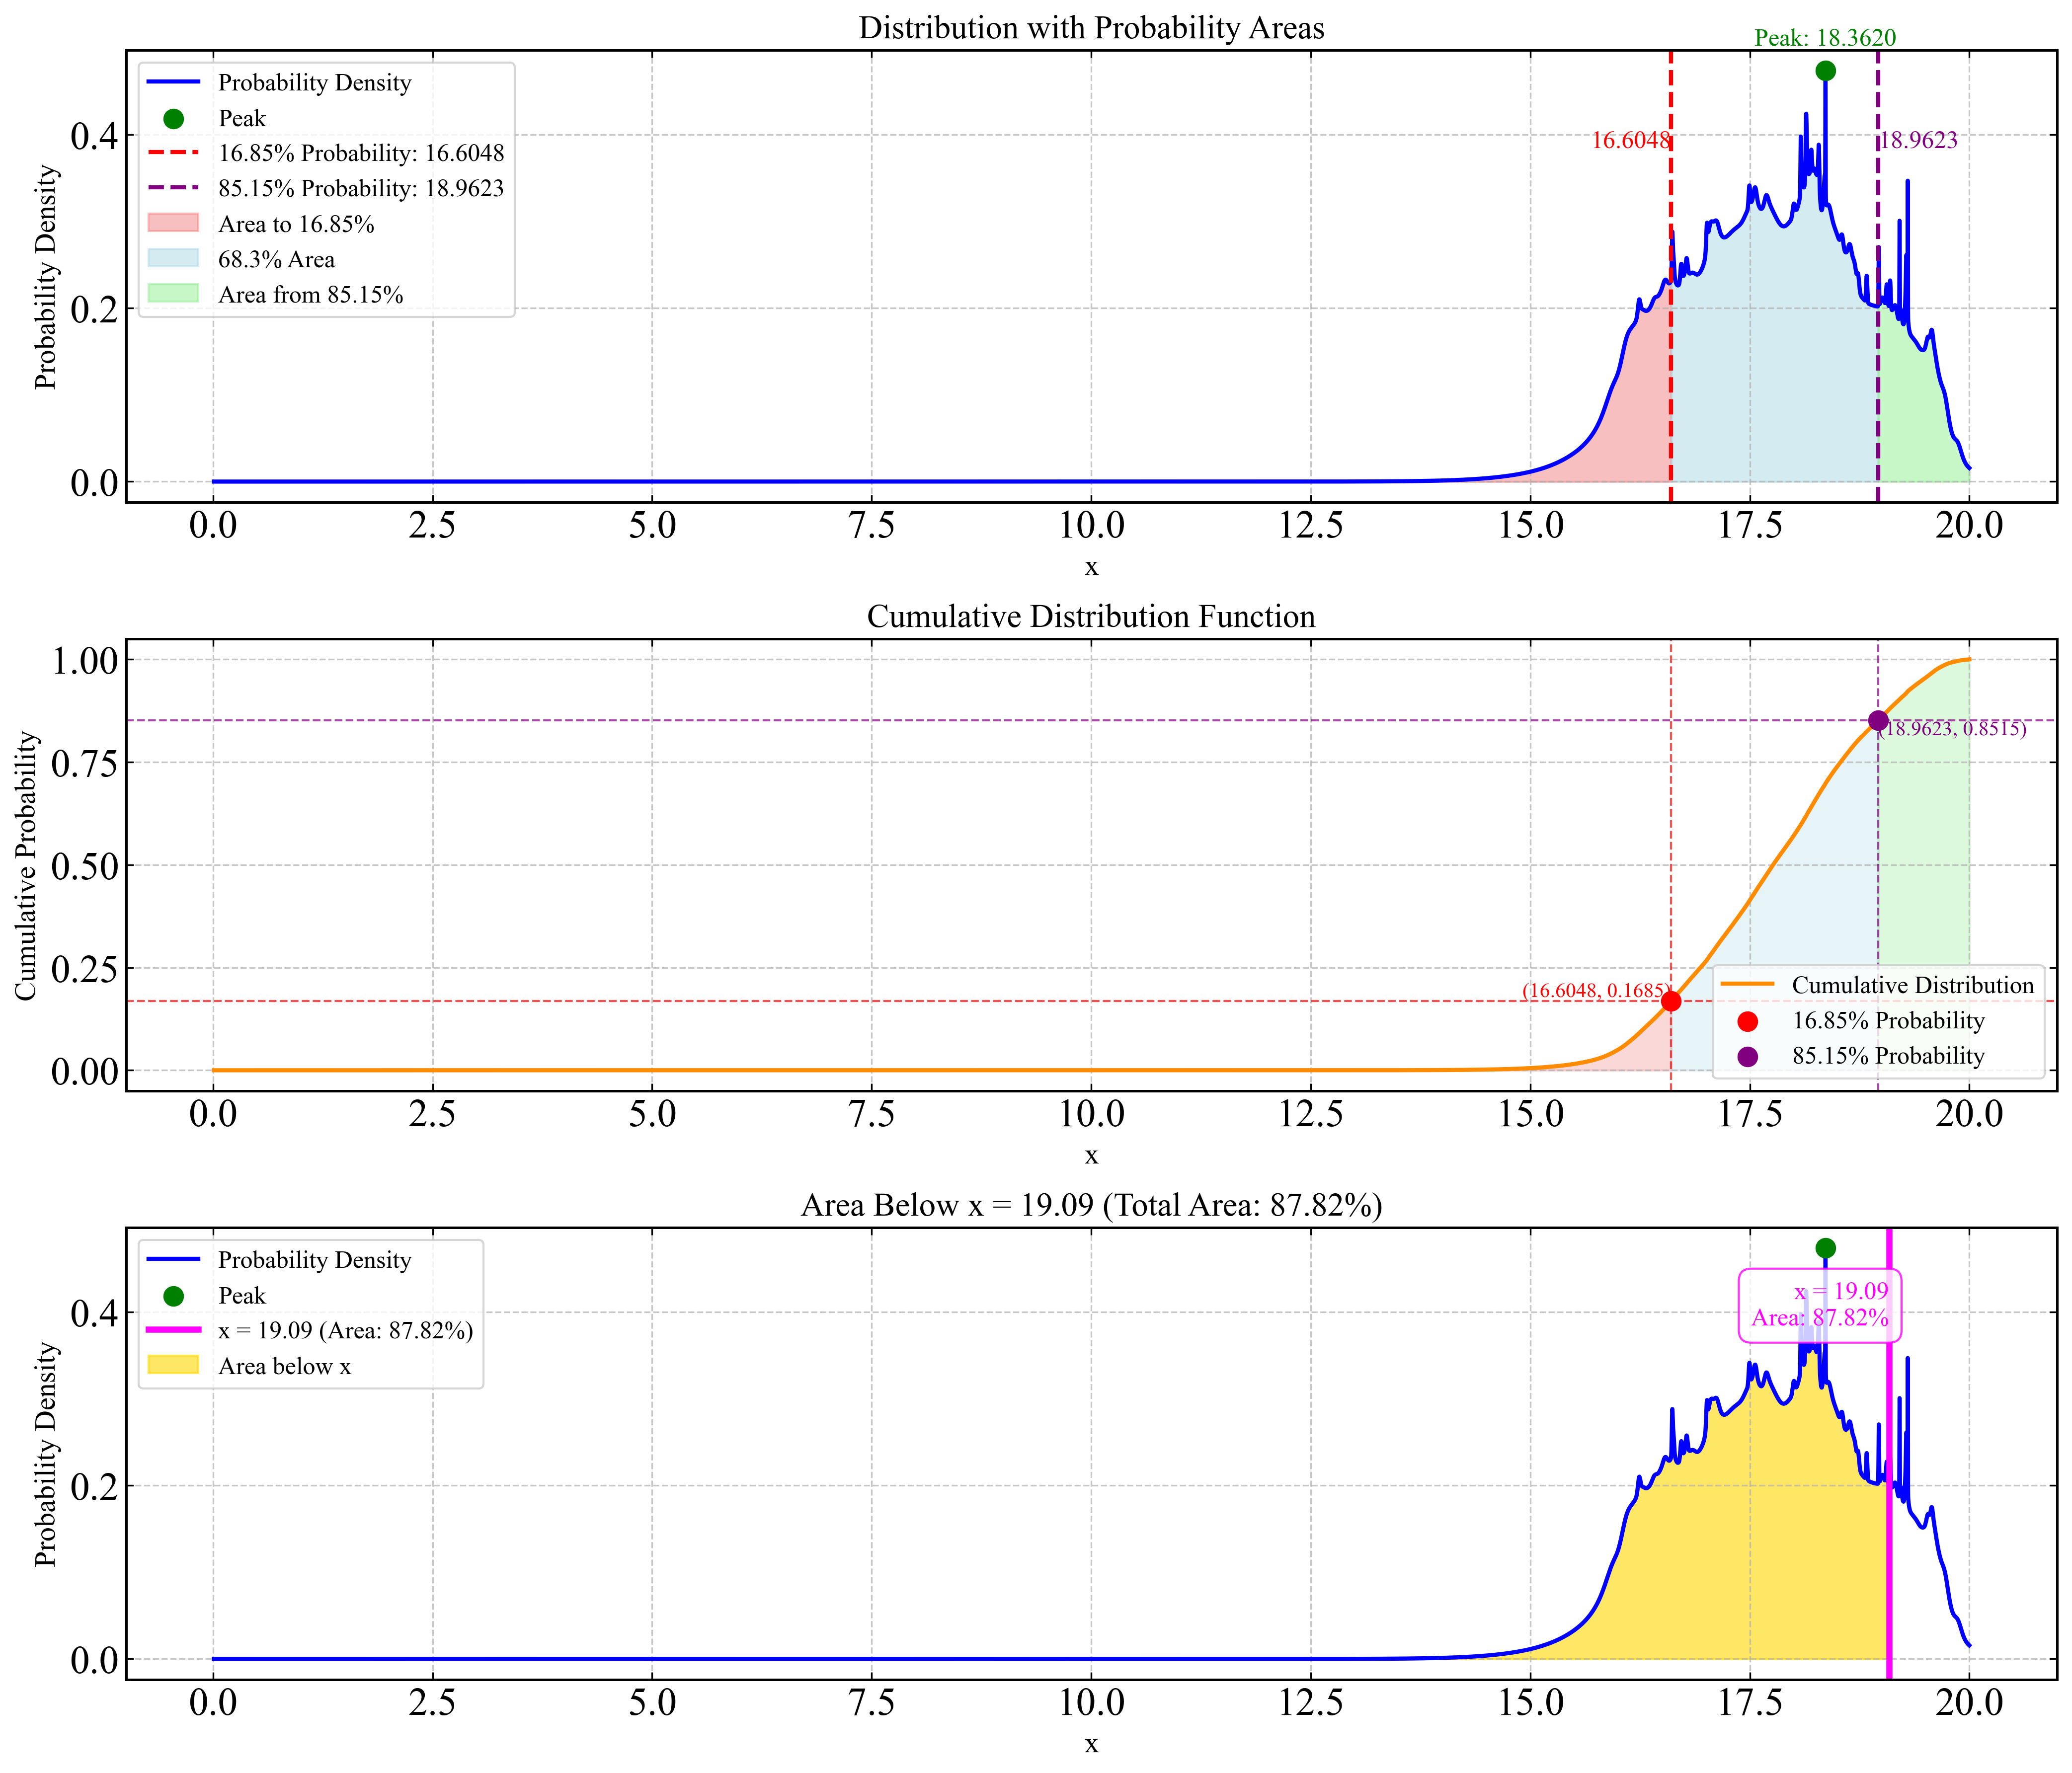

16.85% Probability (lower): 16.6048
85.15% Probability (upper): 18.9623
Peak position: 18.3620
Interval width: 2.3575
Area to 16.85%: 0.1685
Area to 85.15%: 0.8515
Area below Planck scale = 19.09: 0.8782 (87.82%)


In [52]:
x = np.linspace(0.01, 20.0, 50000)
y = posterior_predictive_lognormal(x, posterior_log)

x_lower, x_upper, peak_value_x, cdf, total_area = find_Probabilitys(x, y, lower_Probability=0.1685, upper_Probability=0.8515)

x_value = np.log10(E_PLANCK_GEV.value)

cdf_interp = interp1d(x, cdf, bounds_error=False, fill_value=(0.0, 1.0))
area_prob = cdf_interp(x_value)

mask = x <= x_value
area_below = np.trapz(y[mask], x[mask])
area_prob = area_below / total_area

print(f"x = {x_value:.2f} area below accounts for {area_prob*100:.2f}% of total area")

fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot(3, 1, 1)
ax2 = plt.subplot(3, 1, 2)
ax3 = plt.subplot(3, 1, 3)

ax1.plot(x, y, label='Probability Density', color='blue', linewidth=2)

peak_index = np.argmax(y)
ax1.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')
ax1.axvline(x=x_lower, color='red', linestyle='--', linewidth=2, label=f'16.85% Probability: {x_lower:.4f}')
ax1.axvline(x=x_upper, color='purple', linestyle='--', linewidth=2, label=f'85.15% Probability: {x_upper:.4f}')
ax1.fill_between(x, y, where=(x <= x_lower), color='lightcoral', alpha=0.5, label='Area to 16.85%')
ax1.fill_between(x, y, where=(x >= x_lower) & (x <= x_upper), color='lightblue', alpha=0.5, label='68.3% Area')
ax1.fill_between(x, y, where=(x >= x_upper), color='lightgreen', alpha=0.5, label='Area from 85.15%')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('Probability Density', fontsize=14)
ax1.set_title('Distribution with Probability Areas', fontsize=16)
ax1.legend(fontsize=12, loc='best')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.text(x_lower, 0.8 * max(y), f'{x_lower:.4f}', ha='right', va='bottom', fontsize=12, color='red')
ax1.text(x_upper, 0.8 * max(y), f'{x_upper:.4f}', ha='left', va='bottom', fontsize=12, color='purple')
ax1.text(peak_value_x, 1.05 * max(y), f'Peak: {peak_value_x:.4f}', ha='center', va='bottom', fontsize=12, color='green')

ax2.plot(x, cdf, label='Cumulative Distribution', color='darkorange', linewidth=2)
ax2.axhline(y=0.1685, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=0.8515, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_lower, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=x_upper, color='purple', linestyle='--', linewidth=1, alpha=0.7)
ax2.scatter(x_lower, 0.1685, color='red', s=80, zorder=5, label='16.85% Probability')
ax2.scatter(x_upper, 0.8515, color='purple', s=80, zorder=5, label='85.15% Probability')
ax2.fill_between(x, cdf, where=(x <= x_lower), color='lightcoral', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_lower) & (x <= x_upper), color='lightblue', alpha=0.3)
ax2.fill_between(x, cdf, where=(x >= x_upper), color='lightgreen', alpha=0.3)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('Cumulative Probability', fontsize=14)
ax2.set_title('Cumulative Distribution Function', fontsize=16)
ax2.legend(fontsize=12, loc='lower right')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.text(x_lower, 0.1685, f'({x_lower:.4f}, 0.1685)', ha='right', va='bottom', fontsize=10, color='red')
ax2.text(x_upper, 0.8515, f'({x_upper:.4f}, 0.8515)', ha='left', va='top', fontsize=10, color='purple')

ax3.plot(x, y, label='Probability Density', color='blue', linewidth=2)
ax3.scatter(x[peak_index], y[peak_index], color='green', zorder=5, s=80, label='Peak')
ax3.axvline(x=x_value, color='magenta', linestyle='-', linewidth=3, label=f'x = {x_value:.2f} (Area: {area_prob*100:.2f}%)')
ax3.fill_between(x, y, where=(x <= x_value), color='gold', alpha=0.6, label='Area below x')
ax3.text(x_value, 0.8 * max(y), f'x = {x_value:.2f}\nArea: {area_prob*100:.2f}%', ha='right', va='bottom', fontsize=12, color='magenta', bbox=dict(facecolor='white', alpha=0.8, edgecolor='magenta', boxstyle='round,pad=0.5'))
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('Probability Density', fontsize=14)
ax3.set_title(f'Area Below x = {x_value:.2f} (Total Area: {area_prob*100:.2f}%)', fontsize=16)
ax3.legend(fontsize=12, loc='best')
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"16.85% Probability (lower): {x_lower:.4f}")
print(f"85.15% Probability (upper): {x_upper:.4f}")
print(f"Peak position: {peak_value_x:.4f}")
print(f"Interval width: {x_upper - x_lower:.4f}")
print(f"Area to 16.85%: {cdf[np.searchsorted(x, x_lower)]:.4f}")
print(f"Area to 85.15%: {cdf[np.searchsorted(x, x_upper)]:.4f}")
print(f"Area below Planck scale = {x_value:.2f}: {area_prob:.4f} ({area_prob*100:.2f}%)")

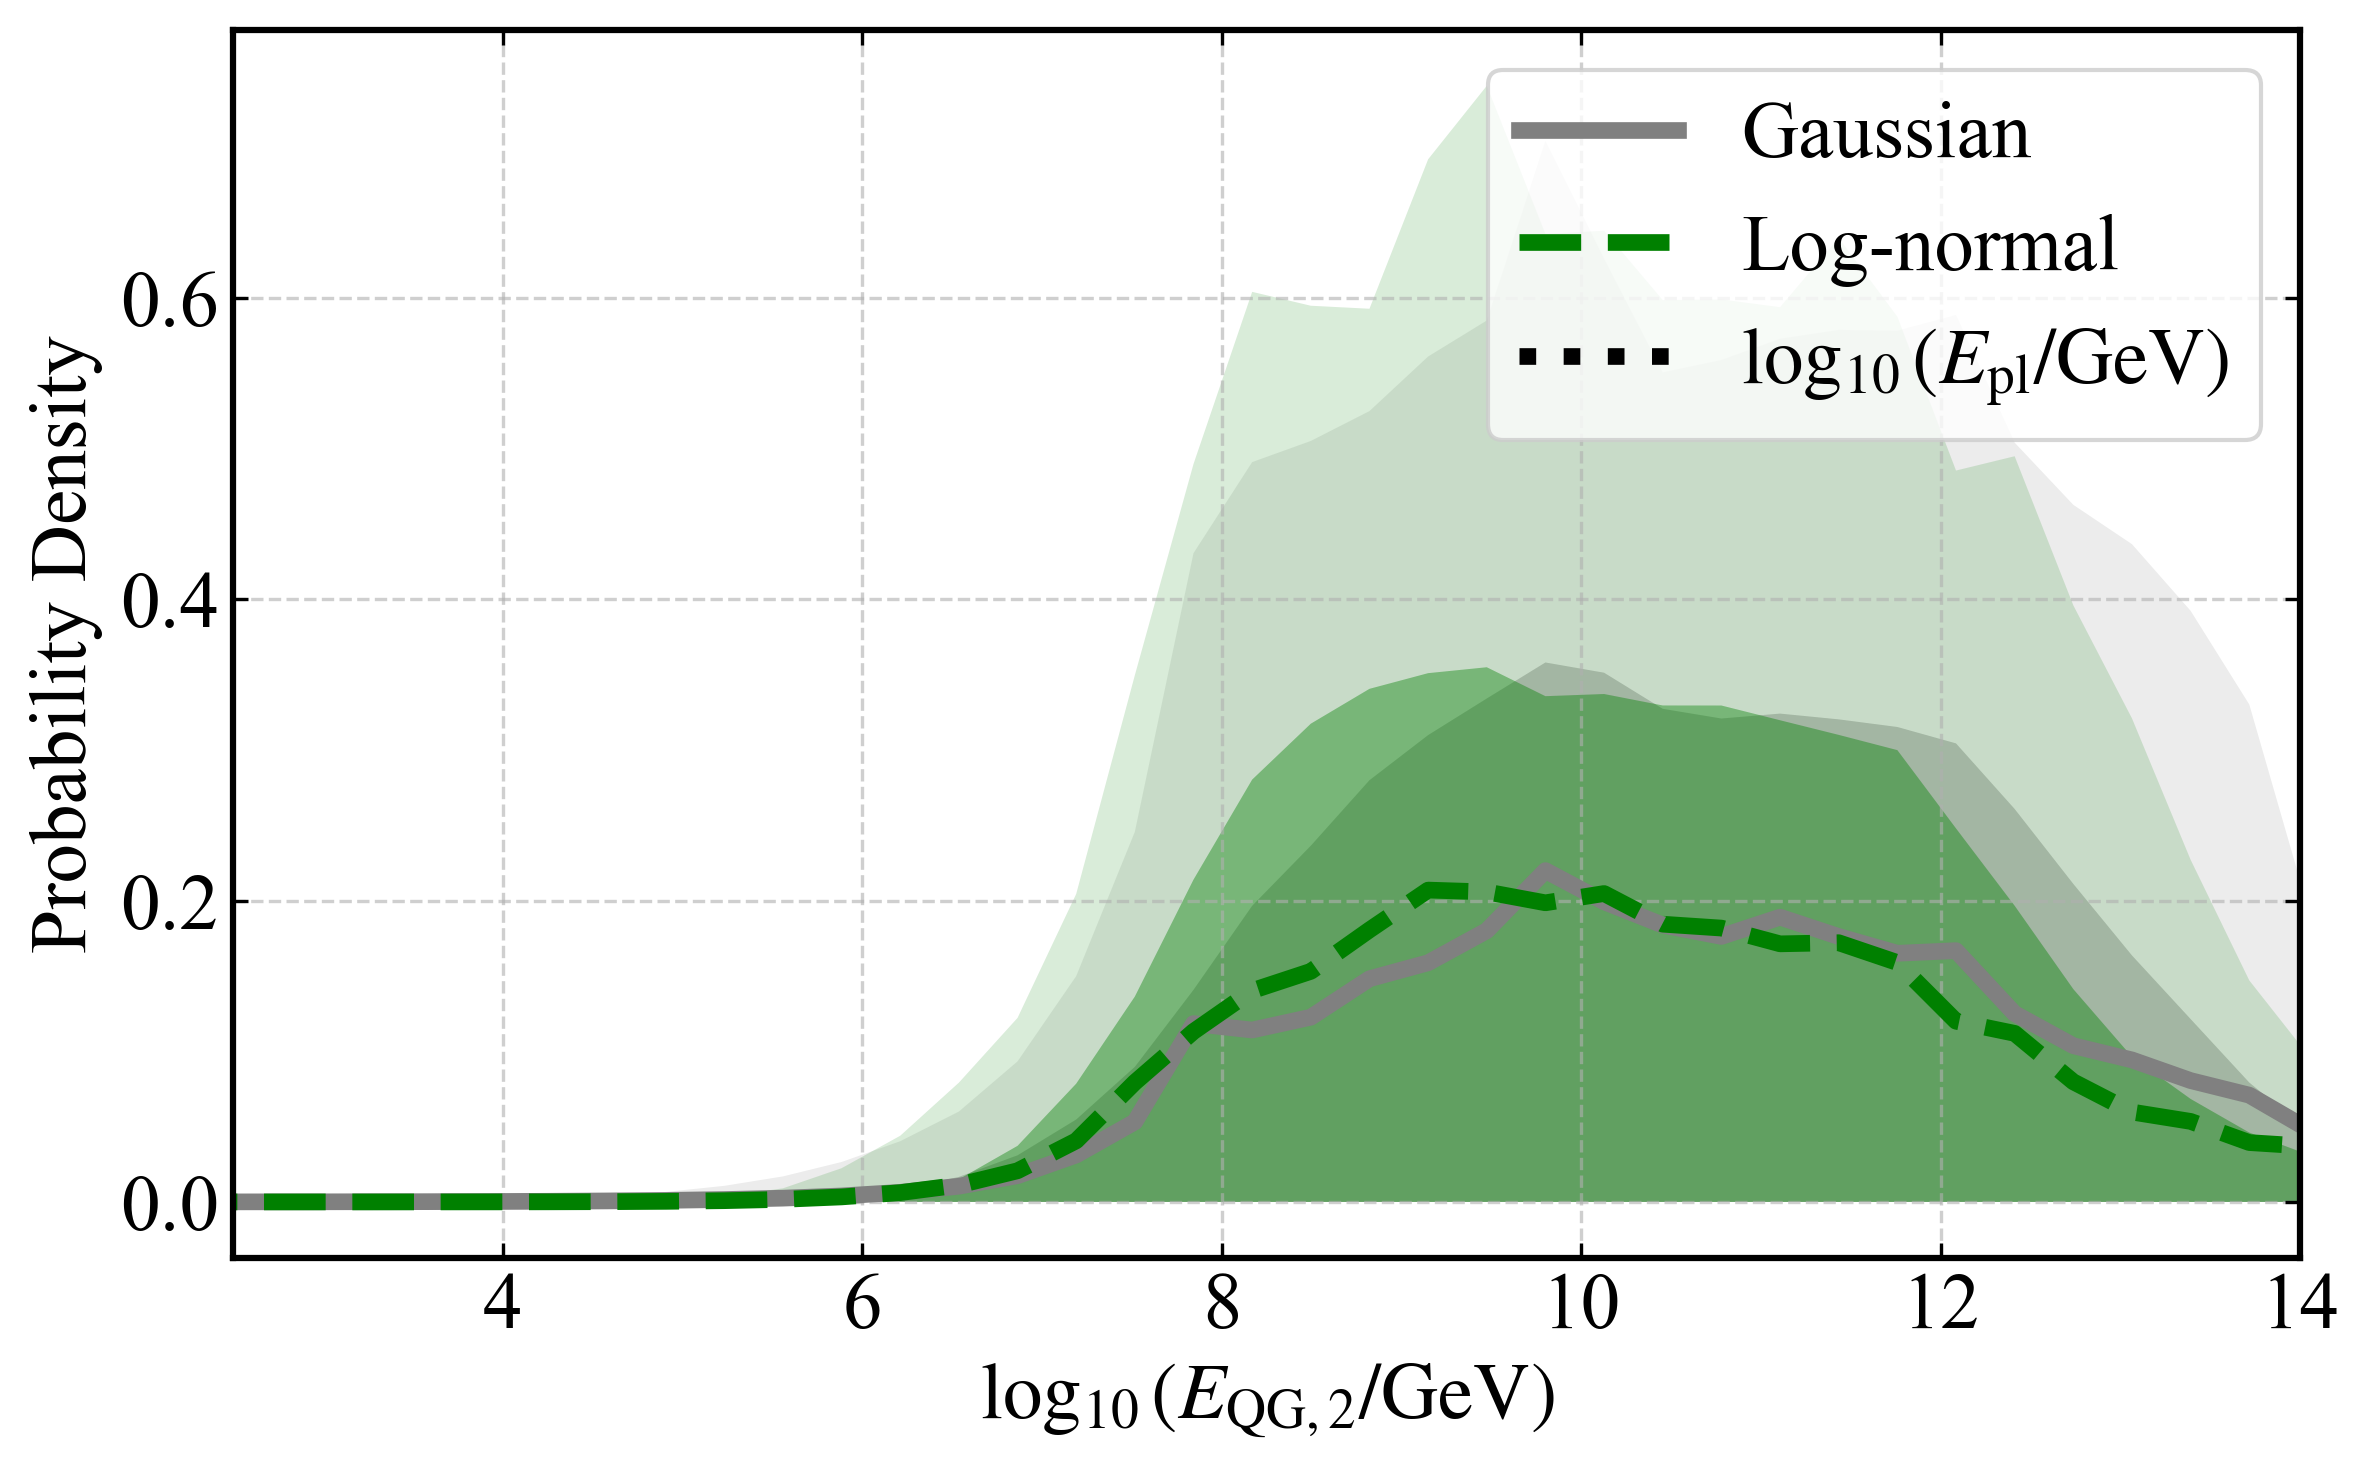

In [ ]:
model_types = ['gauss', 'log']
gauss_dir = f'./results_main/outdir_{model_types[0]}_cubicspline_subLn2/{model_types[0]}_cubicspline_result.json'
log_dir = f'./results_main/outdir_{model_types[1]}_cubicspline_subLn2/{model_types[1]}_cubicspline_result.json'
filenames = [gauss_dir, log_dir]
x=np.array(np.linspace(0.01,16.0,50))
result_gauss = bilby.result.read_in_result(filename=filenames[0])
posterior_gauss = result_gauss.posterior[['mu', 'sigma']].values
result_log = bilby.result.read_in_result(filename=filenames[1])
posterior_log = result_log.posterior[['mu', 'sigma']].values

fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.12, right=0.97, top=0.97, bottom=0.12)
ppd_gauss = posterior_predictive_gaussian(x, posterior_gauss)
ppd_log = posterior_predictive_lognormal(x, posterior_log)

ppd_gauss_1sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_1SIGMA, 'gaussian')
ppd_gauss_2sigma = predictive_uncertainty(x, posterior_gauss, QUANTILE_2SIGMA, 'gaussian')
ppd_log_1sigma = predictive_uncertainty(x, posterior_log, QUANTILE_1SIGMA, 'log-normal')
ppd_log_2sigma = predictive_uncertainty(x, posterior_log, QUANTILE_2SIGMA, 'log-normal')

colors = ['gray', 'green']

ax.plot(x, ppd_gauss, ls='-', color=colors[0], lw=4, label='Gaussian')
ax.fill_between(x, ppd_gauss_1sigma[0, :], ppd_gauss_1sigma[1, :],
                alpha=0.4, facecolor=colors[0])
ax.fill_between(x, ppd_gauss_2sigma[0, :], ppd_gauss_2sigma[1, :],
                alpha=0.15, facecolor=colors[0])
ax.plot(x, ppd_log, ls='--', color=colors[1], lw=4, label='Log-normal')
ax.fill_between(x, ppd_log_1sigma[0, :], ppd_log_1sigma[1, :],
                alpha=0.4, facecolor=colors[1])
ax.fill_between(x, ppd_log_2sigma[0, :], ppd_log_2sigma[1, :],
                alpha=0.15, facecolor=colors[1])
ax.axvline(x=np.log10(E_PLANCK_GEV.value), linewidth=4, color='k', 
            ls=':', label=r'$\log_{10}(E_{\rm pl}/{\rm GeV})$')
ax.set_xlim([2.5, 14])
ax.set_xlabel(r"$\log_{10}(E_{\rm QG,2}/{\rm GeV})$")
ax.set_ylabel("Probability Density")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
fig.savefig("./Figures/fig_ppd_EQG2_cubicspline.png", dpi=300)
plt.show()

# calculate Bayes factors 

* Calculate the Bayes factor between the Gaussian and Log-normal models for the EQG2 parameter using the results from Sample II.
The interested readers can change the directory and the model name to analyze different results from Sample I/II.

In [18]:
from bilby.gw.result import CBCResult
import numpy as np
modelname = ["gauss", "log"]

result_gauss = CBCResult.from_json(f'./results_main/outdir_{modelname[0]}_cubicspline_subLn2/{modelname[0]}_cubicspline_result.json')
result_gauss.log_10_evidence
# result_gauss.log_likelihood_evaluations

result_logGauss = CBCResult.from_json(f'./results_main/outdir_{modelname[1]}_cubicspline_subLn2/{modelname[1]}_cubicspline_result.json')
result_logGauss.log_10_evidence

print("The ln BF between the Gaussian and log-normal models is:", np.log(10**(  result_gauss.log_10_evidence - result_logGauss.log_10_evidence)))


15:38 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
15:38 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


The ln BF between the Gaussian and log-normal models is: 2.4805143964074623


# plot Figures 4 and 5

* The code making the plots in Appendix A in our paper

Processed file GRB080916C_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [18.346647]
Processed file GRB081221_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [19.503661]
Processed file GRB090328_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [16.269267]
Processed file GRB090618_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [19.281315]
Processed file GRB090926A_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [15.119392]
Processed file GRB091003A_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [17.914]
Processed file GRB100728A_posterior_samples.txt: read 15000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First

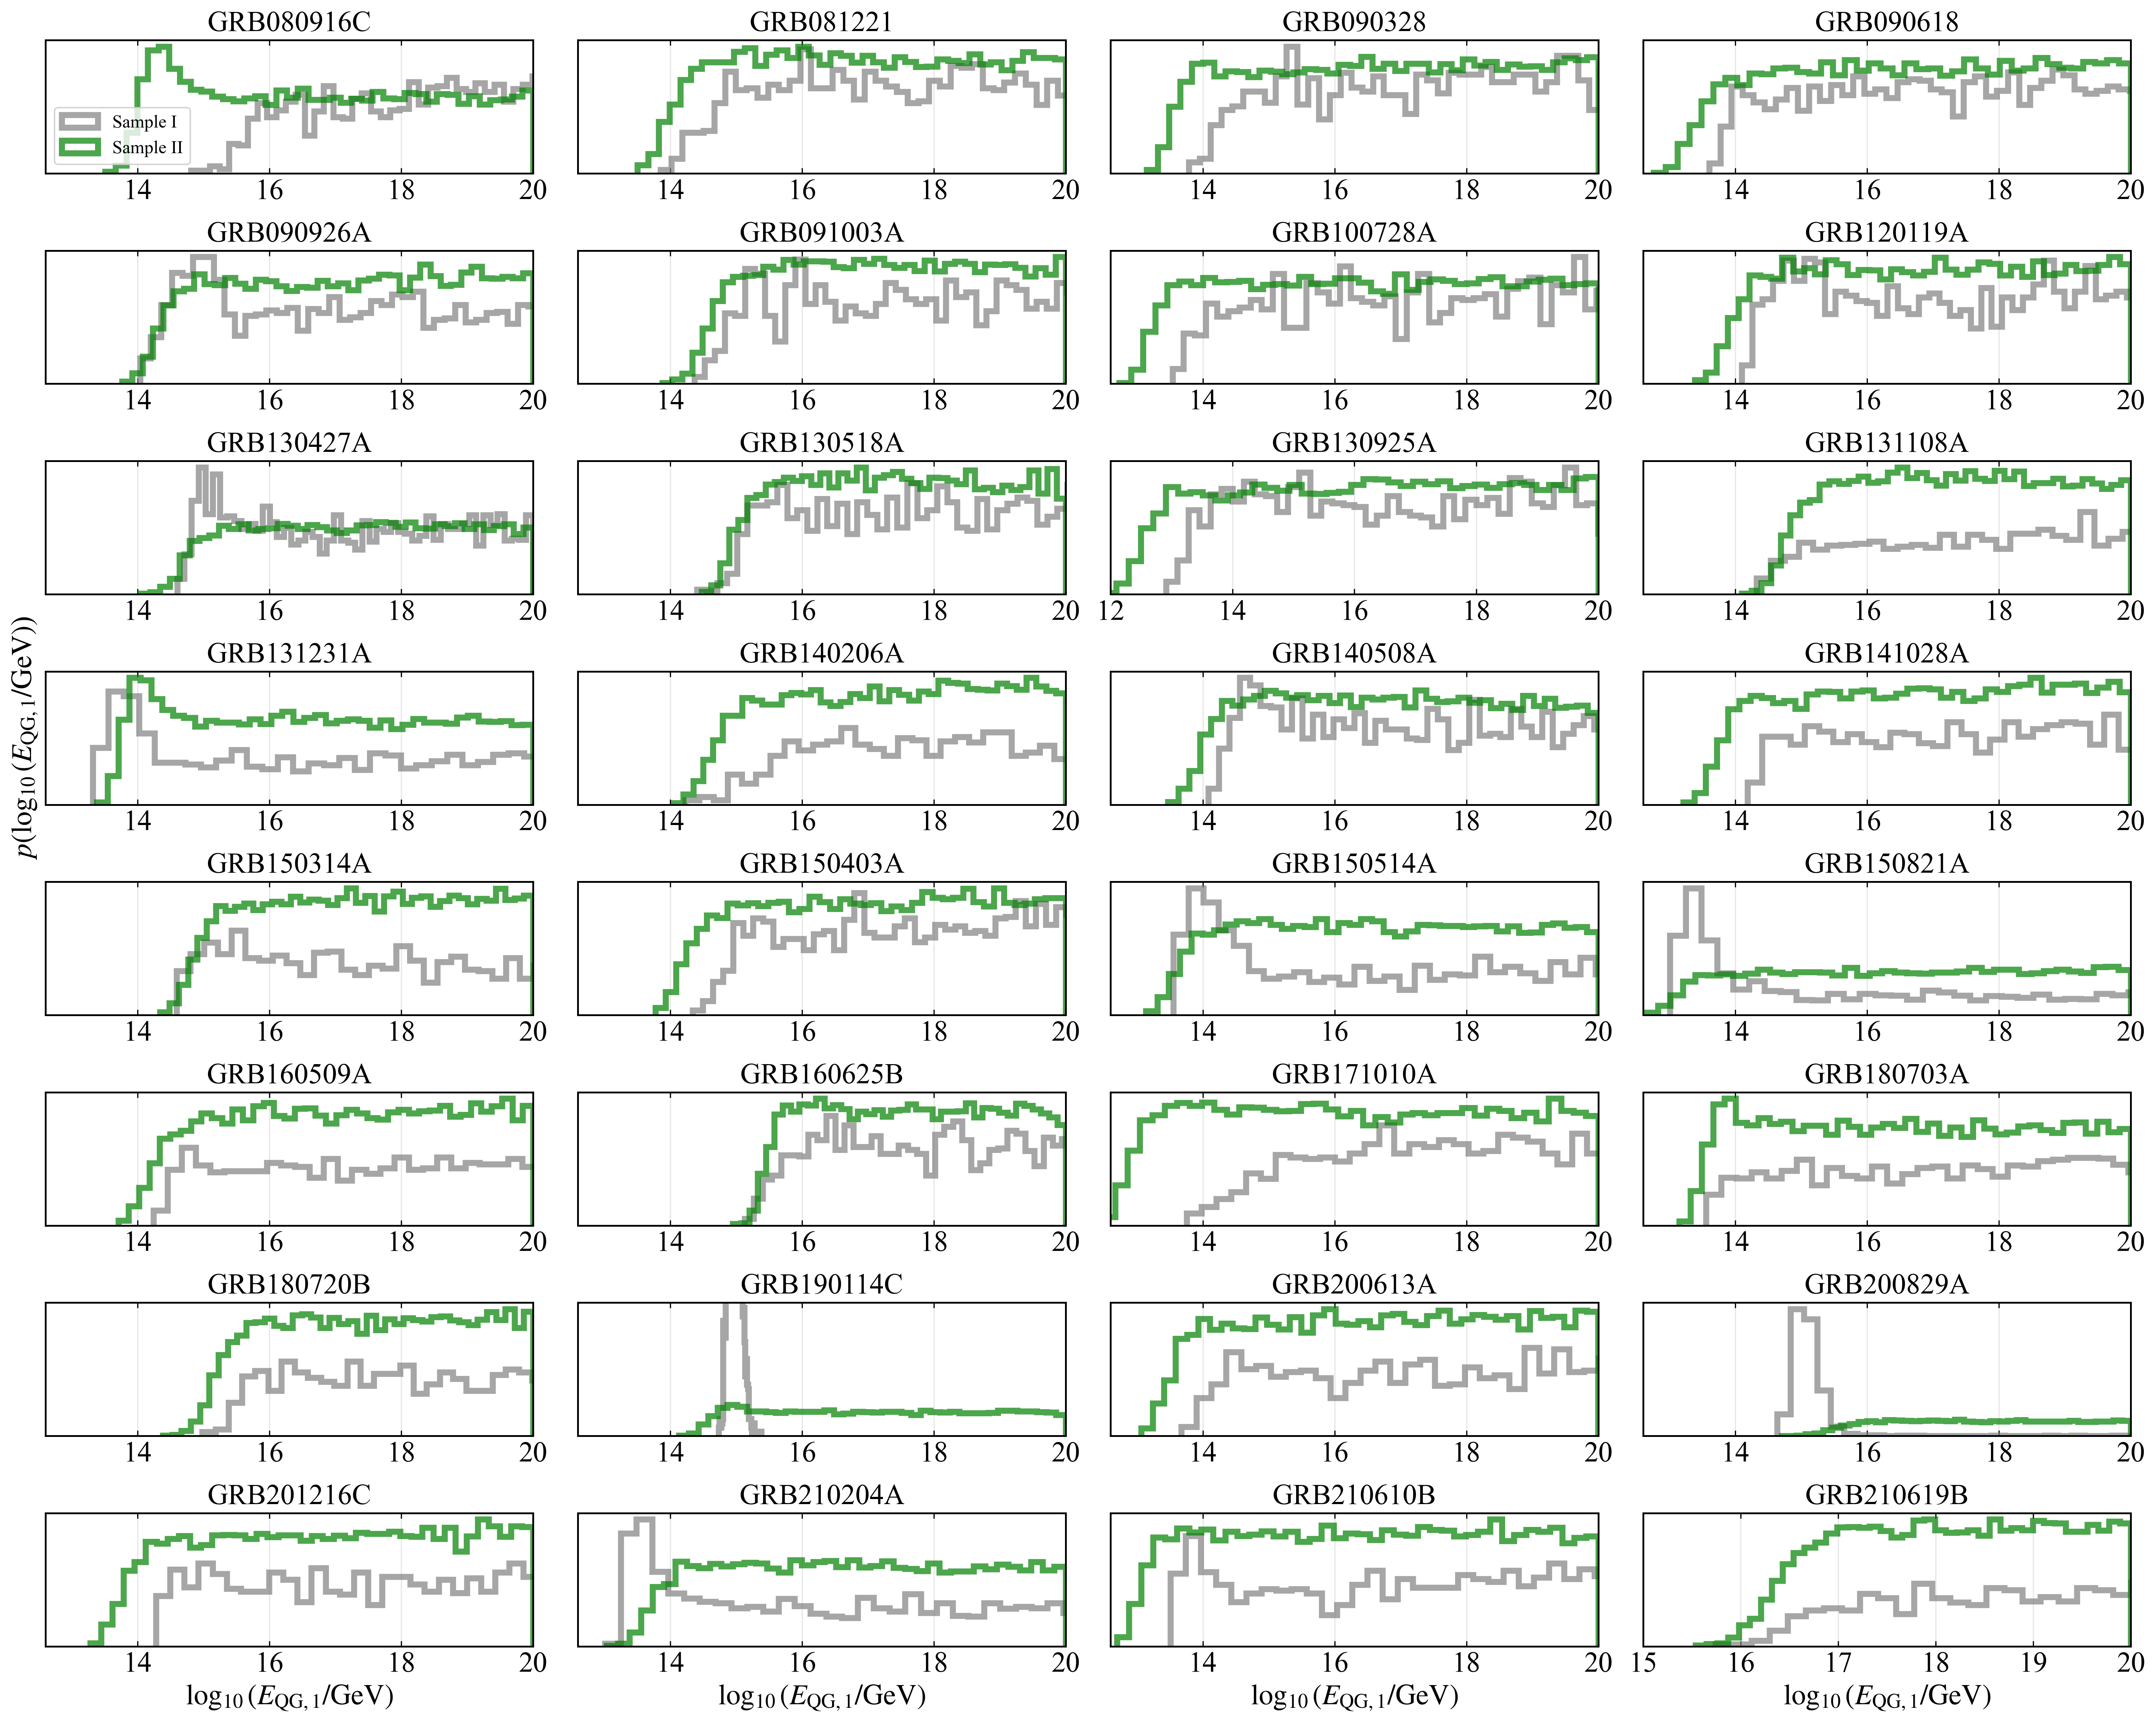

In [ ]:
current_dir = '../Data/posteriors_SBPL_L22/'

items = [item for item in os.listdir(current_dir) if not item.startswith('.')]
folders = [item for item in items if os.path.isdir(os.path.join(current_dir, item))]

def extract_number(folder_name):
    numbers = re.findall(r'\d+', folder_name)
    return int(numbers[0]) if numbers else float('inf')  

folders_sorted = sorted(folders, key=extract_number)
result_file_list = [os.path.join(current_dir, name, '1th-post_equal_weights.dat') for name in folders_sorted]
sample_dir = [s for s in result_file_list if os.path.exists(s)]

result_liu = []
for dat_file in sample_dir:
    try:
        df = pd.read_csv(dat_file, sep='\s+', header=None)
        column_names = ['logEQG', 'zeta', 'E_b', 'alpha_1', 'mu', 'alpha_2', 'weights'] 
        df.columns = column_names
        result_liu.append(df)
    except Exception as e:
        print(f"Error processing file {dat_file}: {str(e)}")
        import traceback
        traceback.print_exc()

samples_1 = [result for result in result_liu]
################################################

results = []
target_dir = '../Data/posteriors_cubicspline_DU25/result_subL_n1_cubicspline/'
column_names = ['log10(E_QG,1)']

if not os.path.exists(target_dir):
    print(f"Error: Directory '{target_dir}' does not exist")
    exit(1)

target_files = [f for f in os.listdir(target_dir) if f.endswith('_samples.txt') and not f.startswith('.')]
target_files_sorted = sorted(target_files, key=extract_number)

for filename in target_files_sorted:
    file_path = os.path.join(target_dir, filename)
    
    try:
        df = pd.read_csv(file_path, sep=',', header=None,skiprows=1, names=column_names)
        if not df.empty:
            results.append(df)
            print(f"Processed file {filename}: read {len(df)} rows, {len(df.columns)} columns of data")
            print(f"  Data types: {df.dtypes.values}")
            print(f"  First row data: {df.iloc[0].values}")
        else:
            print(f"Warning: File {filename} is empty, skipping processing")
            
    except Exception as e:
        print(f"Error processing file {filename}: {str(e)}")
        import traceback
        traceback.print_exc()
        
samples_2 = [result for result in results]

################################################
num_samples = min(len(samples_1), len(samples_2), 32)
print(f"Processing {num_samples} sets of data")

rows = 8
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten() 

bins_options = [20, 30, 40, 50]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i in range(num_samples):
    ax = axes[i]
    data_1 = samples_1[i]['logEQG']
    data_2 = samples_2[i]['log10(E_QG,1)']
    
    bins_1 = 50
    bins_2 = 40  
    
    color_1 = 'gray'
    color_2 =  'g' 
    
    ax.hist(data_1, bins=bins_1, alpha=0.7, color=color_1, label='Sample I', density=True, histtype='step', linewidth=4)
    ax.hist(data_2, bins=bins_2, alpha=0.7, color=color_2, label='Sample II', density=True, histtype='step', linewidth=4)
    
    ax.set_xlim([12.6,20])
    if i < len(folders_sorted):
        ax.set_title(folders_sorted[i])
    if i==31 or i==30 or i==29 or i==28:    
        ax.set_xlabel(r'$\log_{10}(E_{\mathrm{QG,1}}/\mathrm{GeV})$')
    if i ==12:# or i==4 or i==8 or i==12 or i==16 or i==20 or i==24 or i==28:
        # ax.set_ylabel('Density')
        ax.set_ylabel(r'$p(\log_{10}(E_{\mathrm{QG,1}}/\mathrm{GeV})$)')
    if i == 0:
        ax.legend(loc='lower left', fontsize=12)
    if i == 25:
        ax.set_ylim([0,1])
    if i ==10:
        ax.set_xlim([12,20])
    if i ==31:
        ax.set_xlim([15,20])
    ax.grid(True, alpha=0.3)
    ax.set_yticks([])
    # ax.set_ylabel('')

for i in range(num_samples, rows * cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig('./Figures/fig_posterior_logEQG1.png', dpi=300, bbox_inches='tight')

Processed file GRB080916C_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [9.530635]
Processed file GRB081221_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [8.811518]
Processed file GRB090328_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [9.588922]
Processed file GRB090618_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [8.593681]
Processed file GRB090926A_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [10.895476]
Processed file GRB091003A_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First row data: [10.186937]
Processed file GRB100728A_posterior_samples.txt: read 25000 rows, 1 columns of data
  Data types: [dtype('float64')]
  First 

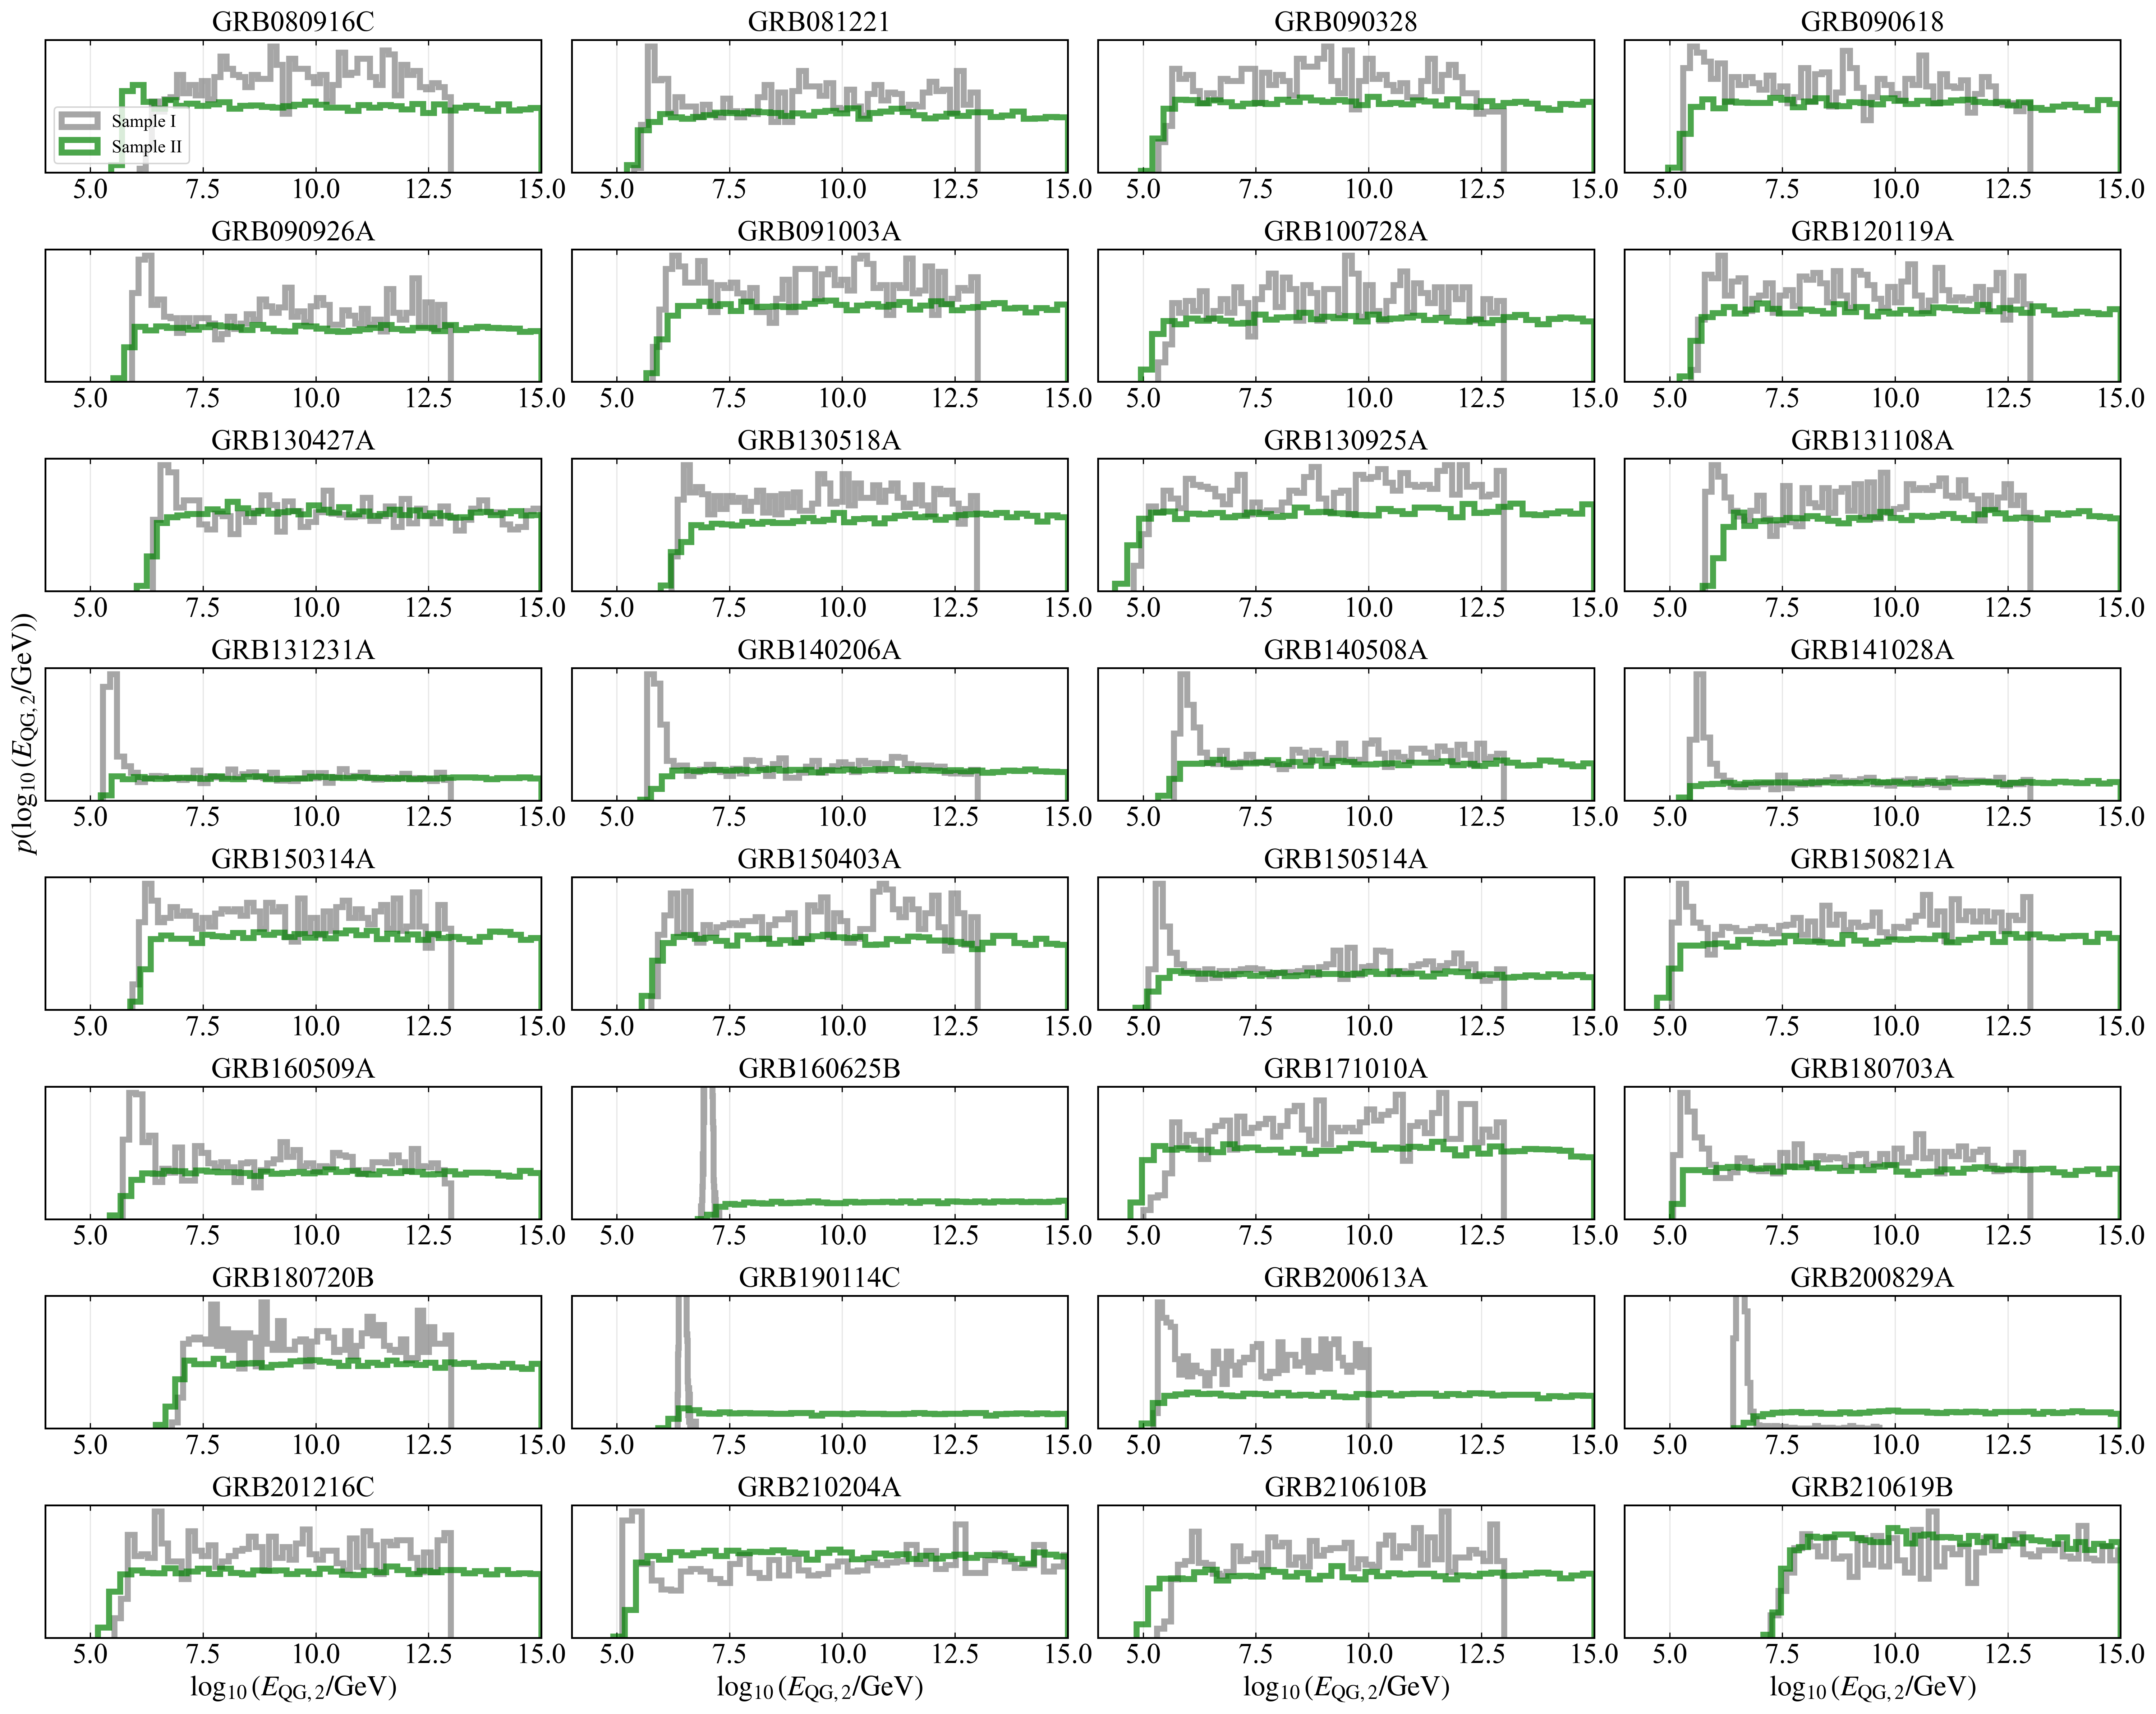

In [51]:
result_file_list = [os.path.join(current_dir, name, '2th-post_equal_weights.dat') for name in folders_sorted]
sample_dir = [s for s in result_file_list if os.path.exists(s) ]

result_liu = []
for dat_file in sample_dir:
    try:
        df = pd.read_csv(dat_file, sep='\s+', header=None)
        column_names = ['logEQG', 'zeta', 'E_b', 'alpha_1', 'mu', 'alpha_2', 'weights'] 
        df.columns = column_names
        result_liu.append(df)
    except Exception as e:
        print(f"Error processing file {dat_file}: {str(e)}")
        import traceback
        traceback.print_exc()

samples_1 = [result for result in result_liu]
################################################

results = []
target_dir = '../Data/posteriors_cubicspline_DU25/result_subL_n2_cubicspline/'
column_names = ['log10(E_QG,2)']

if not os.path.exists(target_dir):
    print(f"Error: Directory '{target_dir}' does not exist")
    exit(1)

target_files = [f for f in os.listdir(target_dir) if f.endswith('_samples.txt') and not f.startswith('.')]
target_files_sorted = sorted(target_files, key=extract_number)

for filename in target_files_sorted:
    file_path = os.path.join(target_dir, filename)
    
    try:
        df = pd.read_csv(file_path, sep=',', header=None,skiprows=1, names=column_names)
        if not df.empty:
            results.append(df)
            print(f"Processed file {filename}: read {len(df)} rows, {len(df.columns)} columns of data")
            print(f"  Data types: {df.dtypes.values}")
            print(f"  First row data: {df.iloc[0].values}")
        else:
            print(f"Warning: File {filename} is empty, skipping processing")
            
    except Exception as e:
        print(f"Error processing file {filename}: {str(e)}")
        import traceback
        traceback.print_exc()
        
samples_2 = [result for result in results]

################################################
# Create 8x4 subplots
################################################

num_samples = min(len(samples_1), len(samples_2), 32)
print(f"Processing {num_samples} sets of data")
rows = 8
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()  

bins_options = [20, 30, 40, 50]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i in range(num_samples):
    ax = axes[i]
    data_1 = samples_1[i]['logEQG']
    data_2 = samples_2[i]['log10(E_QG,2)']
    
    bins_1 = 50
    bins_2 = 40  
    
    color_1 = 'gray'
    color_2 =  'g' 
    
    ax.hist(data_1, bins=bins_1, alpha=0.7, color=color_1, label='Sample I', density=True, histtype='step', linewidth=4)
    ax.hist(data_2, bins=bins_2, alpha=0.7, color=color_2, label='Sample II', density=True, histtype='step', linewidth=4)
    
    ax.set_xlim([4,15])
    
    if i < len(folders_sorted):
        ax.set_title(folders_sorted[i])
    if i==31 or i==30 or i==29 or i==28:    
        ax.set_xlabel(r'$\log_{10}(E_{\mathrm{QG,2}}/\mathrm{GeV})$')
    if i ==12 :#or i==4 or i==8 or i==12 or i==16 or i==20 or i==24 or i==28:
        ax.set_ylabel(r'$p(\log_{10}(E_{\mathrm{QG,2}}/\mathrm{GeV})$)')
    if i == 0:
        ax.legend(loc='lower left', fontsize=12)
    if i ==27:
        ax.set_ylim([0,1])
    if i ==25:
        ax.set_ylim([0,1])
    if i ==21:
        ax.set_ylim([0,1])
    # Add grid
    ax.grid(True, alpha=0.3)
    ax.set_yticks([])
    # ax.set_ylabel('')

for i in range(num_samples, rows * cols):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# fig.savefig('./Figures/fig_posterior_logEQG2.png', dpi=300, bbox_inches='tight')